In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
from sklearn.linear_model import LinearRegression

In [2]:
folder_path = '/content/drive/MyDrive/Neuromatch Dataset'

In [3]:
file_list = os.listdir(folder_path)
matching_files = [filename for filename in file_list if 'steinmetz_part' in filename]
matching_files.sort()

alldat = None

for filename in matching_files:
    data = np.load(os.path.join(folder_path, filename), allow_pickle=True)['dat']
    if alldat is None:
        alldat = data
    else:
        alldat = np.hstack((alldat, data))

In [4]:
dat = alldat[12]   # a dict
print('keys:', len(dat.keys()), dat.keys())

keys: 31 dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])


In [5]:
dat['stim_onset']

0.5

calculate the time window while the neuron is active

In [6]:
def find_time_window_of_spike_activity(spikes, time_bin_duration):
    num_neurons = spikes.shape[0]
    num_time_bins = spikes.shape[2]

    active_time_windows = []
    for neuron_idx in range(num_neurons):
        neuron_spikes = spikes[neuron_idx, :, :]
        active_time_bins = np.any(neuron_spikes > 0, axis=0)
        start_bin = np.argmax(active_time_bins)
        end_bin = num_time_bins - np.argmax(active_time_bins[::-1]) - 1
        start_time_ms = start_bin * time_bin_duration
        end_time_ms = end_bin * time_bin_duration + time_bin_duration
        active_time_windows.append((start_time_ms, end_time_ms))

    return active_time_windows

time_bin_duration = 0.01
active_time_windows = find_time_window_of_spike_activity(dat['spks'], time_bin_duration)

lowest_points = np.array([start_time for start_time, _ in active_time_windows])
highest_points = np.array([end_time for _, end_time in active_time_windows])

average_lowest_time = np.mean(lowest_points)
average_highest_time = np.mean(highest_points)

print(f"Average lowest point of time when neurons are active: {average_lowest_time:.2f}ms")
print(f"Average highest point of time when neurons are active: {average_highest_time:.2f}ms")


Average lowest point of time when neurons are active: 0.02ms
Average highest point of time when neurons are active: 2.48ms


taking the average of the highest and lowest in the active neuron time-point, calculating the firing rate per neuron

Time window 1: 0.02s to 0.5s after stimulus onset
Neuron 1: 5.35 Hz
Neuron 2: 5.88 Hz
Neuron 3: 5.57 Hz
Neuron 4: 6.00 Hz
Neuron 5: 5.88 Hz
Neuron 6: 5.83 Hz
Neuron 7: 5.67 Hz
Neuron 8: 6.09 Hz
Neuron 9: 5.40 Hz
Neuron 10: 5.53 Hz
Neuron 11: 5.61 Hz
Neuron 12: 5.14 Hz
Neuron 13: 5.49 Hz
Neuron 14: 5.68 Hz
Neuron 15: 5.60 Hz
Neuron 16: 5.55 Hz
Neuron 17: 5.98 Hz
Neuron 18: 5.70 Hz
Neuron 19: 6.41 Hz
Neuron 20: 6.71 Hz
Neuron 21: 5.47 Hz
Neuron 22: 5.50 Hz
Neuron 23: 5.41 Hz
Neuron 24: 5.76 Hz
Neuron 25: 5.90 Hz
Neuron 26: 6.51 Hz
Neuron 27: 6.01 Hz
Neuron 28: 5.91 Hz
Neuron 29: 6.07 Hz
Neuron 30: 5.44 Hz
Neuron 31: 6.30 Hz
Neuron 32: 5.89 Hz
Neuron 33: 5.35 Hz
Neuron 34: 5.76 Hz
Neuron 35: 5.81 Hz
Neuron 36: 6.14 Hz
Neuron 37: 5.35 Hz
Neuron 38: 5.50 Hz
Neuron 39: 6.05 Hz
Neuron 40: 5.43 Hz
Neuron 41: 5.40 Hz
Neuron 42: 5.70 Hz
Neuron 43: 6.12 Hz
Neuron 44: 5.85 Hz
Neuron 45: 5.66 Hz
Neuron 46: 5.65 Hz
Neuron 47: 5.43 Hz
Neuron 48: 5.86 Hz
Neuron 49: 5.42 Hz
Neuron 50: 5.43 Hz
Neuron 51

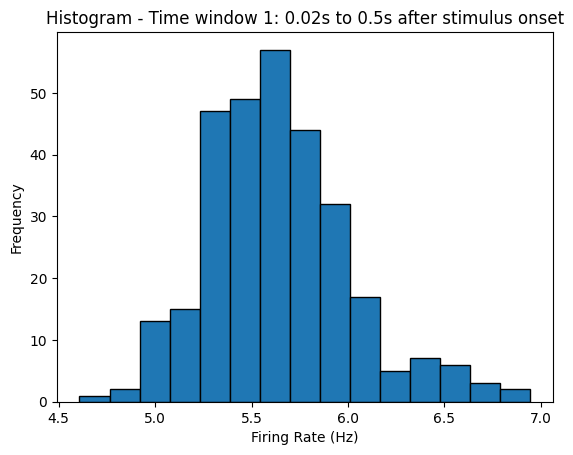

Time window 2: 0.5s to 2.48s after stimulus onset
Neuron 1: 6.10 Hz
Neuron 2: 5.88 Hz
Neuron 3: 7.39 Hz
Neuron 4: 5.92 Hz
Neuron 5: 6.06 Hz
Neuron 6: 6.76 Hz
Neuron 7: 6.95 Hz
Neuron 8: 6.52 Hz
Neuron 9: 6.53 Hz
Neuron 10: 6.86 Hz
Neuron 11: 6.96 Hz
Neuron 12: 6.55 Hz
Neuron 13: 7.23 Hz
Neuron 14: 6.91 Hz
Neuron 15: 6.50 Hz
Neuron 16: 7.00 Hz
Neuron 17: 7.08 Hz
Neuron 18: 6.78 Hz
Neuron 19: 6.86 Hz
Neuron 20: 6.10 Hz
Neuron 21: 5.72 Hz
Neuron 22: 6.25 Hz
Neuron 23: 5.88 Hz
Neuron 24: 6.07 Hz
Neuron 25: 7.38 Hz
Neuron 26: 6.50 Hz
Neuron 27: 6.41 Hz
Neuron 28: 6.05 Hz
Neuron 29: 6.23 Hz
Neuron 30: 6.94 Hz
Neuron 31: 6.03 Hz
Neuron 32: 6.62 Hz
Neuron 33: 7.30 Hz
Neuron 34: 6.74 Hz
Neuron 35: 6.43 Hz
Neuron 36: 6.91 Hz
Neuron 37: 6.27 Hz
Neuron 38: 5.71 Hz
Neuron 39: 6.22 Hz
Neuron 40: 5.77 Hz
Neuron 41: 6.41 Hz
Neuron 42: 6.83 Hz
Neuron 43: 6.29 Hz
Neuron 44: 5.94 Hz
Neuron 45: 6.30 Hz
Neuron 46: 5.57 Hz
Neuron 47: 6.38 Hz
Neuron 48: 6.08 Hz
Neuron 49: 6.58 Hz
Neuron 50: 5.88 Hz
Neuron 51

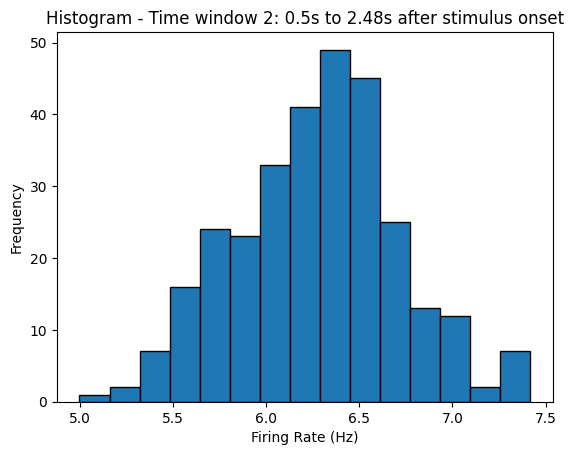

In [7]:
def calculate_firing_rate_per_neuron(spikes, time_bin_duration, dat):
    num_neurons = spikes.shape[1]
    num_time_bins = spikes.shape[2]

    time_windows = [(0.02, 0.5), (0.5, 2.48)]

    time_windows_bins = [(int(window[0] / time_bin_duration), int(window[1] / time_bin_duration)) for window in time_windows]

    firing_rate_per_neuron = np.zeros((len(time_windows), num_neurons))
    for window_idx, (start_bin, end_bin) in enumerate(time_windows_bins):
        total_spikes_per_neuron_trial = np.sum(spikes[:, :, start_bin:end_bin], axis=2)
        total_time_window = (end_bin - start_bin) * time_bin_duration
        firing_rate_per_neuron[window_idx, :] = np.mean(total_spikes_per_neuron_trial, axis=0) / total_time_window

    for window_idx, (start_time, end_time) in enumerate(time_windows):
        print(f"Time window {window_idx + 1}: {start_time}s to {end_time}s after stimulus onset")
        for neuron_idx in range(num_neurons):
            print(f"Neuron {neuron_idx + 1}: {firing_rate_per_neuron[window_idx, neuron_idx]:.2f} Hz")
        print()

        plt.figure()
        plt.hist(firing_rate_per_neuron[window_idx, :], bins=15, edgecolor='black')
        plt.xlabel('Firing Rate (Hz)')
        plt.ylabel('Frequency')
        plt.title(f'Histogram - Time window {window_idx + 1}: {start_time}s to {end_time}s after stimulus onset')
        plt.show()

    return firing_rate_per_neuron

stimulus_onset = dat['stim_onset']

firing_rate_per_neuron = calculate_firing_rate_per_neuron(dat['spks'], 0.01, dat)


dividing the active neuron and their firing rates based on the trial category, (correct, miss, no)


Time window 1: 0.02s to 0.5s after stimulus onset
Response Category -1:
Neuron 1: 2.02 Hz
Neuron 2: 4.50 Hz
Neuron 3: 3.47 Hz
Neuron 4: 3.52 Hz
Neuron 5: 3.87 Hz
Neuron 6: 2.65 Hz
Neuron 7: 2.75 Hz
Neuron 8: 3.45 Hz
Neuron 9: 2.80 Hz
Neuron 10: 2.92 Hz
Neuron 11: 2.82 Hz
Neuron 12: 2.65 Hz
Neuron 13: 3.04 Hz
Neuron 14: 3.13 Hz
Neuron 15: 3.00 Hz
Neuron 16: 2.36 Hz
Neuron 17: 3.31 Hz
Neuron 18: 2.90 Hz
Neuron 19: 3.70 Hz
Neuron 20: 4.36 Hz
Neuron 21: 3.50 Hz
Neuron 22: 3.10 Hz
Neuron 23: 2.92 Hz
Neuron 24: 2.92 Hz
Neuron 25: 3.08 Hz
Neuron 26: 5.35 Hz
Neuron 27: 3.25 Hz
Neuron 28: 3.91 Hz
Neuron 29: 4.30 Hz
Neuron 30: 2.84 Hz
Neuron 31: 3.89 Hz
Neuron 32: 3.82 Hz
Neuron 33: 3.19 Hz
Neuron 34: 3.87 Hz
Neuron 35: 4.48 Hz
Neuron 36: 4.73 Hz
Neuron 37: 2.71 Hz
Neuron 38: 4.11 Hz
Neuron 39: 5.12 Hz
Neuron 40: 3.86 Hz
Neuron 41: 3.49 Hz
Neuron 42: 4.50 Hz
Neuron 43: 4.54 Hz
Neuron 44: 3.43 Hz
Neuron 45: 3.29 Hz
Neuron 46: 3.47 Hz
Neuron 47: 3.47 Hz
Neuron 48: 3.56 Hz
Neuron 49: 3.23 Hz
Neuron

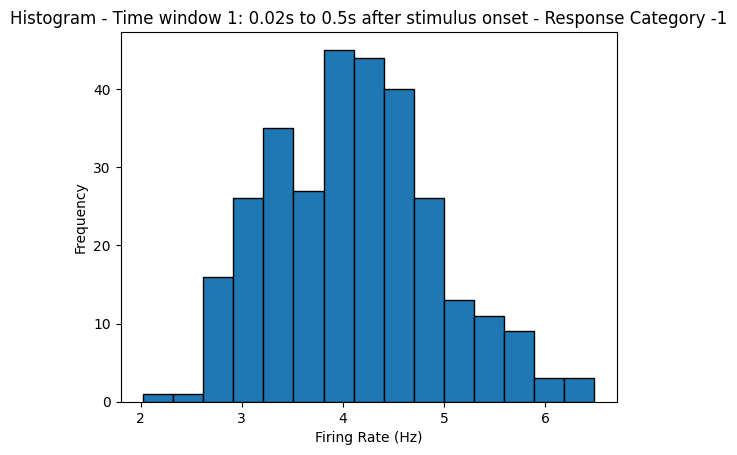

Response Category 0:
Neuron 1: 2.75 Hz
Neuron 2: 2.98 Hz
Neuron 3: 3.46 Hz
Neuron 4: 3.94 Hz
Neuron 5: 3.91 Hz
Neuron 6: 3.20 Hz
Neuron 7: 3.05 Hz
Neuron 8: 3.61 Hz
Neuron 9: 3.05 Hz
Neuron 10: 3.16 Hz
Neuron 11: 3.57 Hz
Neuron 12: 2.79 Hz
Neuron 13: 3.05 Hz
Neuron 14: 4.09 Hz
Neuron 15: 2.75 Hz
Neuron 16: 2.57 Hz
Neuron 17: 4.02 Hz
Neuron 18: 6.44 Hz
Neuron 19: 4.39 Hz
Neuron 20: 4.35 Hz
Neuron 21: 3.50 Hz
Neuron 22: 3.94 Hz
Neuron 23: 2.16 Hz
Neuron 24: 2.72 Hz
Neuron 25: 2.79 Hz
Neuron 26: 4.32 Hz
Neuron 27: 3.01 Hz
Neuron 28: 2.68 Hz
Neuron 29: 2.68 Hz
Neuron 30: 2.57 Hz
Neuron 31: 3.27 Hz
Neuron 32: 4.69 Hz
Neuron 33: 3.01 Hz
Neuron 34: 3.53 Hz
Neuron 35: 4.13 Hz
Neuron 36: 2.94 Hz
Neuron 37: 2.64 Hz
Neuron 38: 4.20 Hz
Neuron 39: 3.24 Hz
Neuron 40: 3.31 Hz
Neuron 41: 2.49 Hz
Neuron 42: 2.90 Hz
Neuron 43: 3.46 Hz
Neuron 44: 2.86 Hz
Neuron 45: 2.12 Hz
Neuron 46: 3.39 Hz
Neuron 47: 2.75 Hz
Neuron 48: 3.94 Hz
Neuron 49: 3.05 Hz
Neuron 50: 2.46 Hz
Neuron 51: 3.24 Hz
Neuron 52: 2.94 Hz


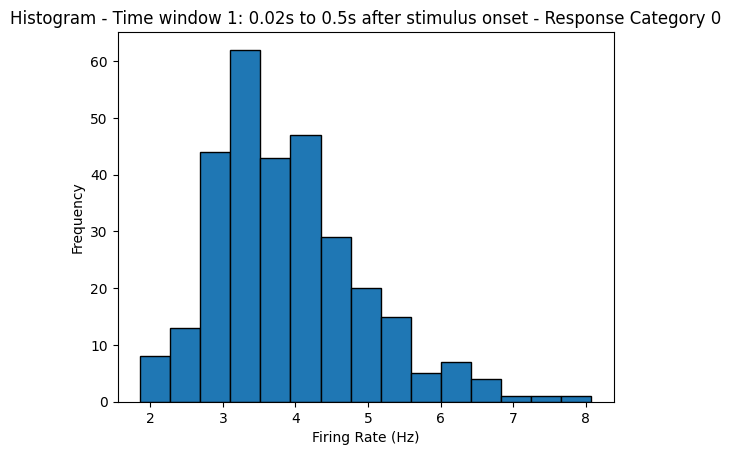

Response Category 1:
Neuron 1: 4.47 Hz
Neuron 2: 4.33 Hz
Neuron 3: 4.21 Hz
Neuron 4: 4.53 Hz
Neuron 5: 4.08 Hz
Neuron 6: 3.91 Hz
Neuron 7: 4.18 Hz
Neuron 8: 4.12 Hz
Neuron 9: 3.38 Hz
Neuron 10: 3.80 Hz
Neuron 11: 3.82 Hz
Neuron 12: 3.50 Hz
Neuron 13: 4.06 Hz
Neuron 14: 3.63 Hz
Neuron 15: 3.98 Hz
Neuron 16: 4.18 Hz
Neuron 17: 4.62 Hz
Neuron 18: 3.53 Hz
Neuron 19: 4.12 Hz
Neuron 20: 4.24 Hz
Neuron 21: 3.57 Hz
Neuron 22: 4.29 Hz
Neuron 23: 3.51 Hz
Neuron 24: 3.80 Hz
Neuron 25: 4.71 Hz
Neuron 26: 4.12 Hz
Neuron 27: 4.56 Hz
Neuron 28: 4.67 Hz
Neuron 29: 4.46 Hz
Neuron 30: 3.86 Hz
Neuron 31: 4.50 Hz
Neuron 32: 3.62 Hz
Neuron 33: 3.38 Hz
Neuron 34: 3.28 Hz
Neuron 35: 3.10 Hz
Neuron 36: 3.98 Hz
Neuron 37: 3.80 Hz
Neuron 38: 3.98 Hz
Neuron 39: 3.89 Hz
Neuron 40: 3.80 Hz
Neuron 41: 3.56 Hz
Neuron 42: 5.58 Hz
Neuron 43: 3.89 Hz
Neuron 44: 5.11 Hz
Neuron 45: 4.23 Hz
Neuron 46: 3.89 Hz
Neuron 47: 4.14 Hz
Neuron 48: 4.38 Hz
Neuron 49: 4.76 Hz
Neuron 50: 5.52 Hz
Neuron 51: 5.00 Hz
Neuron 52: 4.46 Hz


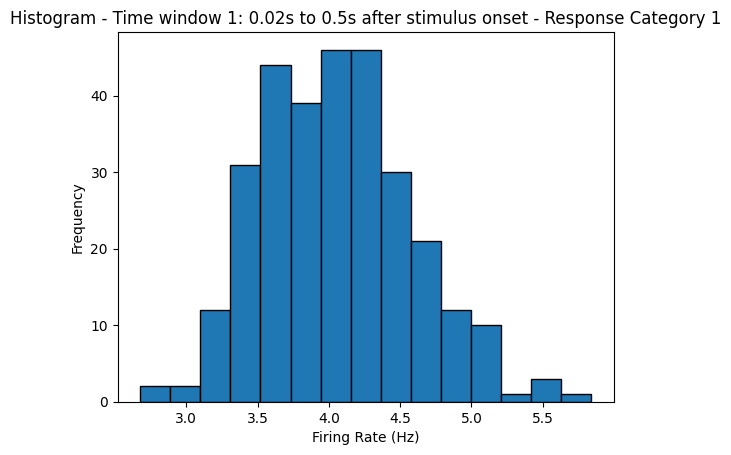

Time window 2: 0.5s to 2.48s after stimulus onset
Response Category -1:
Neuron 1: 3.62 Hz
Neuron 2: 3.92 Hz
Neuron 3: 4.59 Hz
Neuron 4: 3.45 Hz
Neuron 5: 3.86 Hz
Neuron 6: 4.25 Hz
Neuron 7: 3.72 Hz
Neuron 8: 3.79 Hz
Neuron 9: 3.49 Hz
Neuron 10: 4.17 Hz
Neuron 11: 4.17 Hz
Neuron 12: 4.00 Hz
Neuron 13: 4.60 Hz
Neuron 14: 4.04 Hz
Neuron 15: 4.24 Hz
Neuron 16: 4.43 Hz
Neuron 17: 4.62 Hz
Neuron 18: 3.90 Hz
Neuron 19: 4.49 Hz
Neuron 20: 4.22 Hz
Neuron 21: 3.88 Hz
Neuron 22: 3.88 Hz
Neuron 23: 3.46 Hz
Neuron 24: 3.91 Hz
Neuron 25: 4.88 Hz
Neuron 26: 4.70 Hz
Neuron 27: 4.24 Hz
Neuron 28: 3.76 Hz
Neuron 29: 4.20 Hz
Neuron 30: 5.26 Hz
Neuron 31: 4.14 Hz
Neuron 32: 4.91 Hz
Neuron 33: 4.66 Hz
Neuron 34: 4.95 Hz
Neuron 35: 4.70 Hz
Neuron 36: 5.04 Hz
Neuron 37: 3.96 Hz
Neuron 38: 4.21 Hz
Neuron 39: 4.44 Hz
Neuron 40: 4.13 Hz
Neuron 41: 4.41 Hz
Neuron 42: 5.20 Hz
Neuron 43: 4.52 Hz
Neuron 44: 4.12 Hz
Neuron 45: 4.34 Hz
Neuron 46: 3.33 Hz
Neuron 47: 4.56 Hz
Neuron 48: 4.14 Hz
Neuron 49: 4.81 Hz
Neuron

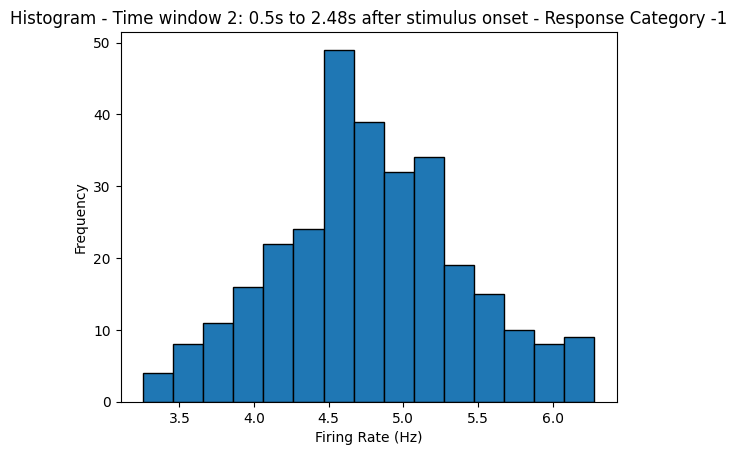

Response Category 0:
Neuron 1: 2.73 Hz
Neuron 2: 2.97 Hz
Neuron 3: 4.34 Hz
Neuron 4: 3.59 Hz
Neuron 5: 3.66 Hz
Neuron 6: 3.95 Hz
Neuron 7: 3.71 Hz
Neuron 8: 3.88 Hz
Neuron 9: 3.52 Hz
Neuron 10: 4.14 Hz
Neuron 11: 3.61 Hz
Neuron 12: 3.71 Hz
Neuron 13: 3.94 Hz
Neuron 14: 4.41 Hz
Neuron 15: 4.06 Hz
Neuron 16: 3.83 Hz
Neuron 17: 5.03 Hz
Neuron 18: 5.01 Hz
Neuron 19: 4.54 Hz
Neuron 20: 4.28 Hz
Neuron 21: 3.34 Hz
Neuron 22: 4.01 Hz
Neuron 23: 3.39 Hz
Neuron 24: 3.12 Hz
Neuron 25: 5.18 Hz
Neuron 26: 3.70 Hz
Neuron 27: 3.44 Hz
Neuron 28: 3.75 Hz
Neuron 29: 3.31 Hz
Neuron 30: 4.25 Hz
Neuron 31: 3.35 Hz
Neuron 32: 4.63 Hz
Neuron 33: 3.88 Hz
Neuron 34: 4.69 Hz
Neuron 35: 4.00 Hz
Neuron 36: 3.73 Hz
Neuron 37: 3.33 Hz
Neuron 38: 3.28 Hz
Neuron 39: 3.64 Hz
Neuron 40: 3.15 Hz
Neuron 41: 3.40 Hz
Neuron 42: 4.63 Hz
Neuron 43: 3.80 Hz
Neuron 44: 3.46 Hz
Neuron 45: 3.49 Hz
Neuron 46: 3.08 Hz
Neuron 47: 3.55 Hz
Neuron 48: 3.71 Hz
Neuron 49: 3.87 Hz
Neuron 50: 3.39 Hz
Neuron 51: 3.92 Hz
Neuron 52: 3.11 Hz


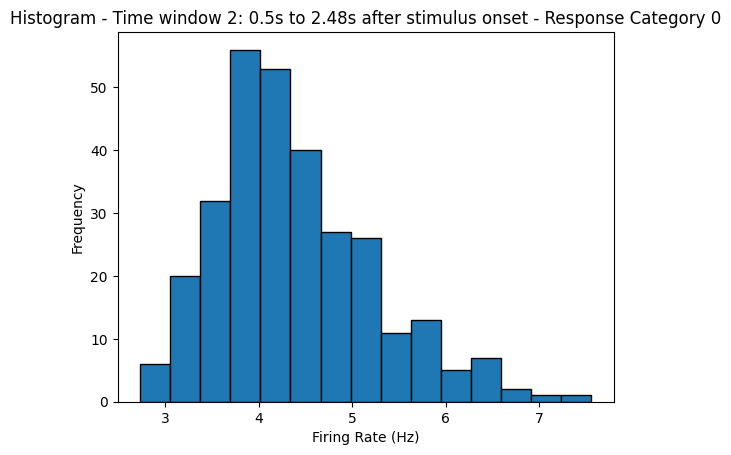

Response Category 1:
Neuron 1: 4.76 Hz
Neuron 2: 4.42 Hz
Neuron 3: 5.44 Hz
Neuron 4: 4.93 Hz
Neuron 5: 4.90 Hz
Neuron 6: 5.18 Hz
Neuron 7: 4.69 Hz
Neuron 8: 5.13 Hz
Neuron 9: 5.28 Hz
Neuron 10: 5.30 Hz
Neuron 11: 4.98 Hz
Neuron 12: 4.74 Hz
Neuron 13: 5.20 Hz
Neuron 14: 5.20 Hz
Neuron 15: 4.49 Hz
Neuron 16: 4.99 Hz
Neuron 17: 5.18 Hz
Neuron 18: 4.91 Hz
Neuron 19: 5.31 Hz
Neuron 20: 4.14 Hz
Neuron 21: 4.17 Hz
Neuron 22: 4.98 Hz
Neuron 23: 4.59 Hz
Neuron 24: 4.81 Hz
Neuron 25: 5.15 Hz
Neuron 26: 4.73 Hz
Neuron 27: 4.97 Hz
Neuron 28: 4.79 Hz
Neuron 29: 4.62 Hz
Neuron 30: 5.18 Hz
Neuron 31: 5.00 Hz
Neuron 32: 4.56 Hz
Neuron 33: 4.57 Hz
Neuron 34: 4.72 Hz
Neuron 35: 4.63 Hz
Neuron 36: 4.79 Hz
Neuron 37: 5.09 Hz
Neuron 38: 4.37 Hz
Neuron 39: 4.51 Hz
Neuron 40: 4.55 Hz
Neuron 41: 4.86 Hz
Neuron 42: 4.95 Hz
Neuron 43: 4.81 Hz
Neuron 44: 4.86 Hz
Neuron 45: 4.48 Hz
Neuron 46: 4.55 Hz
Neuron 47: 5.33 Hz
Neuron 48: 4.49 Hz
Neuron 49: 5.66 Hz
Neuron 50: 5.80 Hz
Neuron 51: 5.87 Hz
Neuron 52: 5.14 Hz


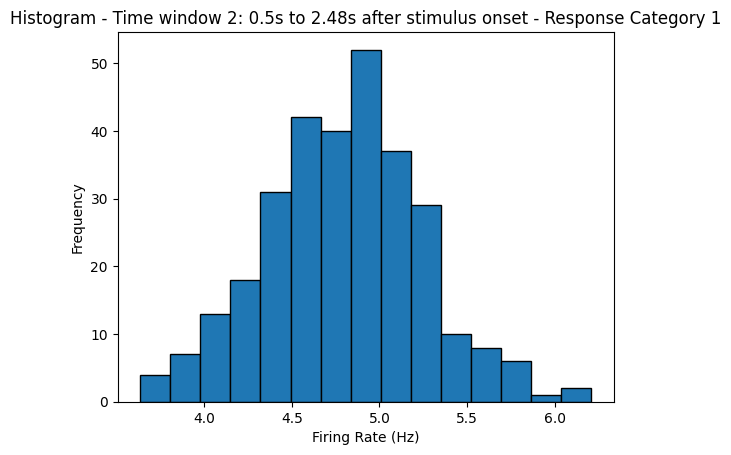

In [8]:
def divide_trials_by_response(dat, response_category):
    trials_indices = np.where(dat['response'] == response_category)[0]
    spikes_filtered = dat['spks'][trials_indices]
    return spikes_filtered

def calculate_firing_rate_per_neuron(spikes, time_bin_duration, dat):
    num_neurons = spikes.shape[1]
    num_time_bins = spikes.shape[2]

    time_windows = [(0.02, 0.5), (0.5, 2.48)]

    time_windows_bins = [(int(window[0] / time_bin_duration), int(window[1] / time_bin_duration)) for window in time_windows]

    firing_rate_per_neuron_by_response = {}

    for response_category in [-1, 0, 1]:  # Response categories: correct left, no-go, correct right
        spikes_filtered = divide_trials_by_response(dat, response_category)

        firing_rate_per_neuron = np.zeros((len(time_windows), num_neurons))
        for window_idx, (start_bin, end_bin) in enumerate(time_windows_bins):
            total_spikes_per_neuron_trial = np.sum(spikes_filtered[:, :, start_bin:end_bin], axis=2)
            total_time_window = (end_bin - start_bin) * time_bin_duration
            firing_rate_per_neuron[window_idx, :] = np.mean(total_spikes_per_neuron_trial, axis=0) / total_time_window

        firing_rate_per_neuron_by_response[response_category] = firing_rate_per_neuron

    for window_idx, (start_time, end_time) in enumerate(time_windows):
        print(f"Time window {window_idx + 1}: {start_time}s to {end_time}s after stimulus onset")
        for response_category in [-1, 0, 1]:
            print(f"Response Category {response_category}:")
            for neuron_idx in range(num_neurons):
                firing_rate = firing_rate_per_neuron_by_response[response_category][window_idx, neuron_idx]
                print(f"Neuron {neuron_idx + 1}: {firing_rate:.2f} Hz")
            print()

            plt.figure()
            plt.hist(firing_rate_per_neuron_by_response[response_category][window_idx, :], bins=15, edgecolor='black')
            plt.xlabel('Firing Rate (Hz)')
            plt.ylabel('Frequency')
            plt.title(f'Histogram - Time window {window_idx + 1}: {start_time}s to {end_time}s after stimulus onset - Response Category {response_category}')
            plt.show()

    return firing_rate_per_neuron_by_response

stimulus_onset = dat['stim_onset']

firing_rate_per_neuron_by_response = calculate_firing_rate_per_neuron(dat['spks'], 0.01, dat)


doing the same process as earlier just rather than finding the neuron firing rate for each category and grouping them, we're going to compare firing rates of the same neuron across trials.

Neuron 1 Firing Rate Comparison:
Response Category -1: 2.82 Hz
Response Category 0: 2.74 Hz
Response Category 1: 4.62 Hz



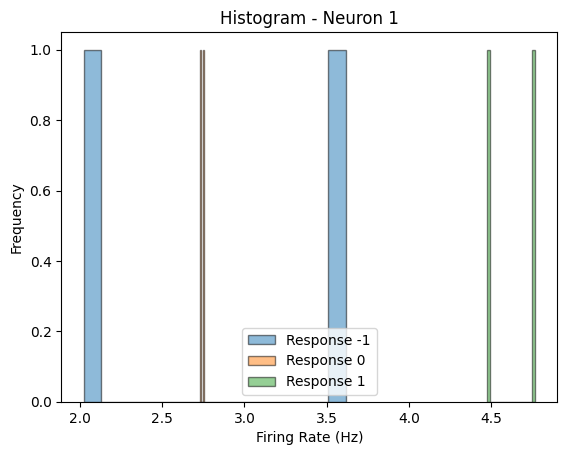

Neuron 2 Firing Rate Comparison:
Response Category -1: 4.21 Hz
Response Category 0: 2.97 Hz
Response Category 1: 4.38 Hz



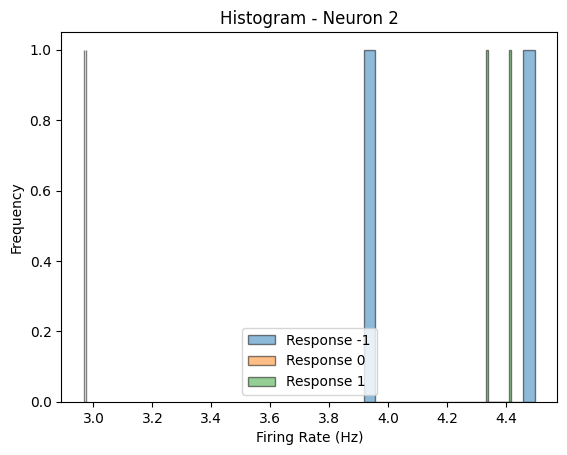

Neuron 3 Firing Rate Comparison:
Response Category -1: 4.03 Hz
Response Category 0: 3.90 Hz
Response Category 1: 4.83 Hz



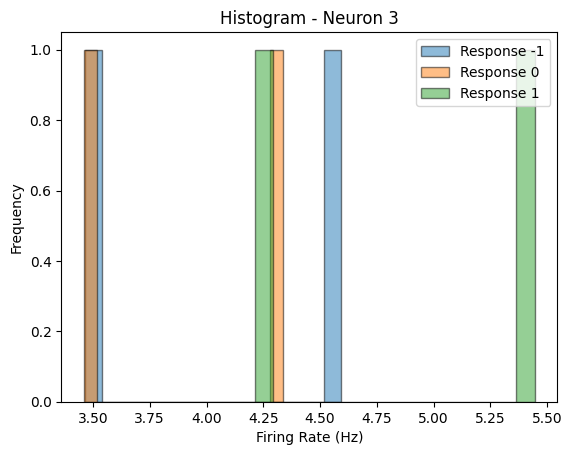

Neuron 4 Firing Rate Comparison:
Response Category -1: 3.48 Hz
Response Category 0: 3.77 Hz
Response Category 1: 4.73 Hz



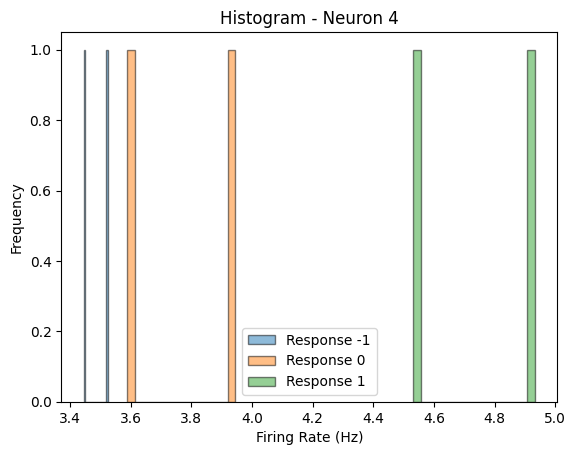

Neuron 5 Firing Rate Comparison:
Response Category -1: 3.87 Hz
Response Category 0: 3.78 Hz
Response Category 1: 4.49 Hz



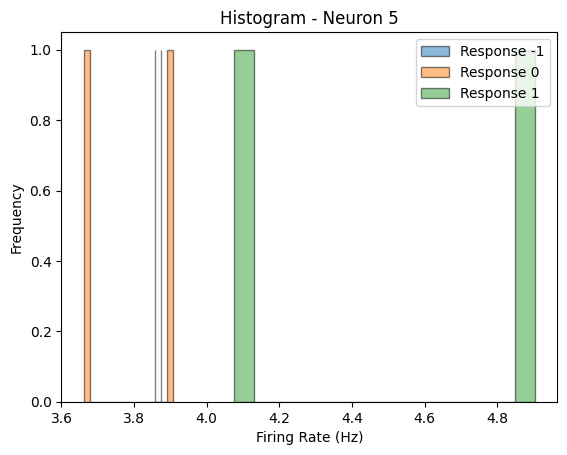

Neuron 6 Firing Rate Comparison:
Response Category -1: 3.45 Hz
Response Category 0: 3.57 Hz
Response Category 1: 4.55 Hz



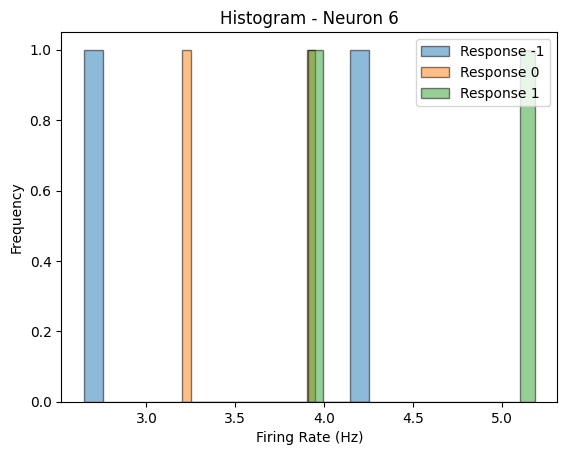

Neuron 7 Firing Rate Comparison:
Response Category -1: 3.23 Hz
Response Category 0: 3.38 Hz
Response Category 1: 4.44 Hz



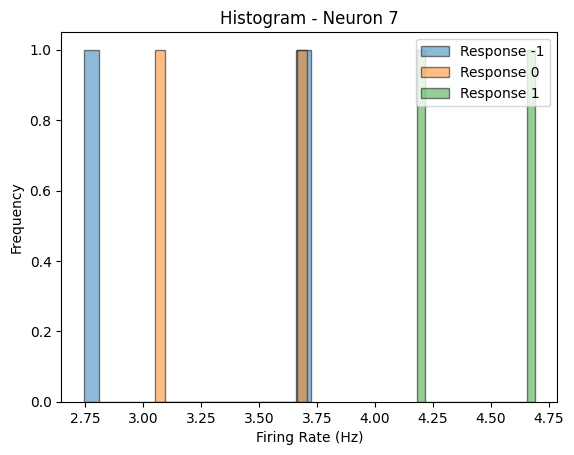

Neuron 8 Firing Rate Comparison:
Response Category -1: 3.62 Hz
Response Category 0: 3.74 Hz
Response Category 1: 4.62 Hz



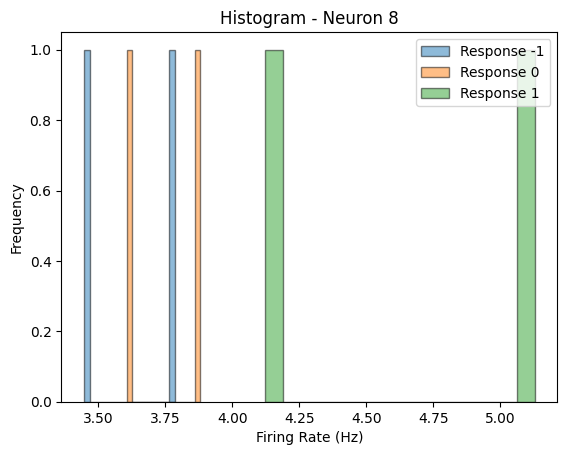

Neuron 9 Firing Rate Comparison:
Response Category -1: 3.15 Hz
Response Category 0: 3.28 Hz
Response Category 1: 4.33 Hz



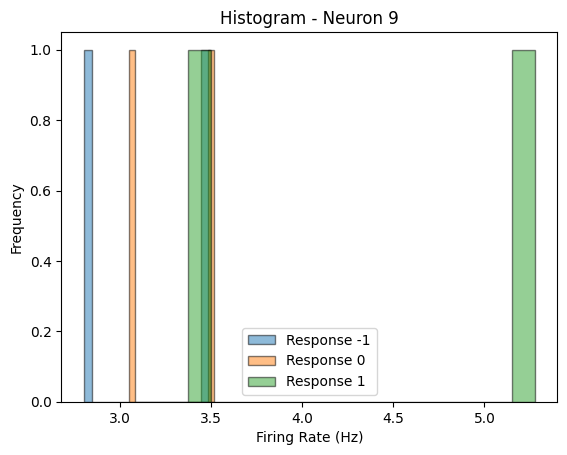

Neuron 10 Firing Rate Comparison:
Response Category -1: 3.54 Hz
Response Category 0: 3.65 Hz
Response Category 1: 4.55 Hz



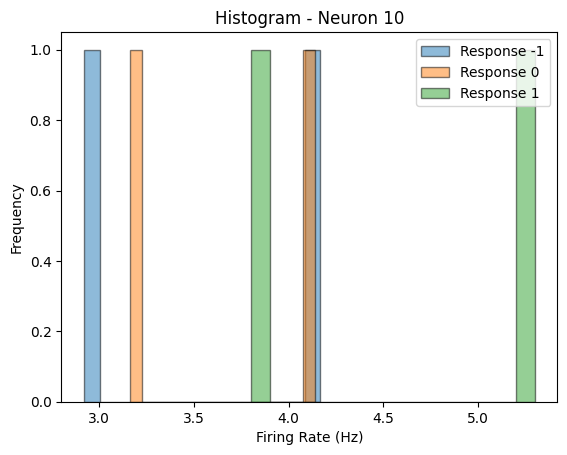

Neuron 11 Firing Rate Comparison:
Response Category -1: 3.50 Hz
Response Category 0: 3.59 Hz
Response Category 1: 4.40 Hz



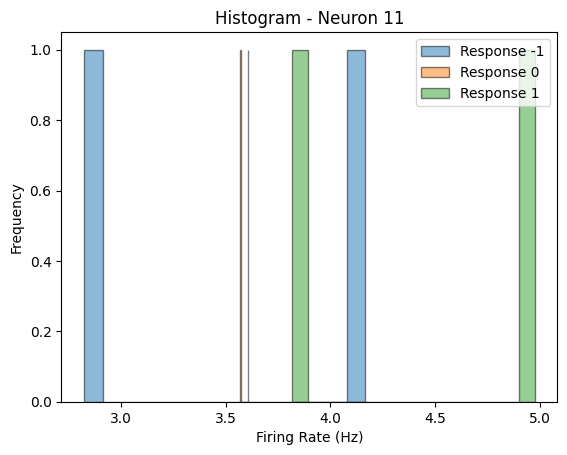

Neuron 12 Firing Rate Comparison:
Response Category -1: 3.33 Hz
Response Category 0: 3.25 Hz
Response Category 1: 4.12 Hz



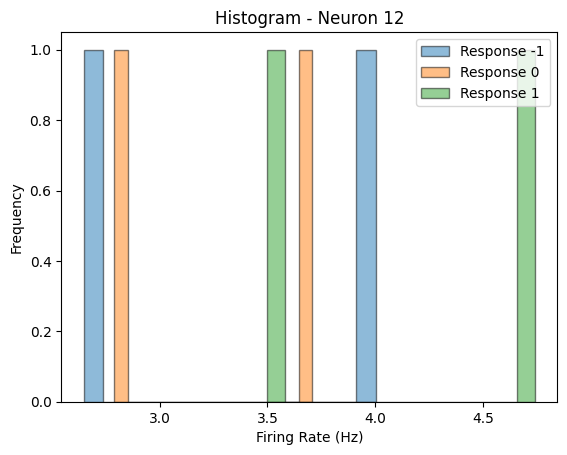

Neuron 13 Firing Rate Comparison:
Response Category -1: 3.82 Hz
Response Category 0: 3.50 Hz
Response Category 1: 4.63 Hz



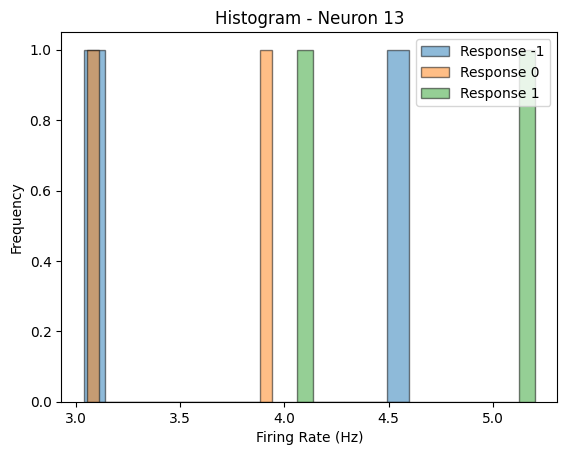

Neuron 14 Firing Rate Comparison:
Response Category -1: 3.59 Hz
Response Category 0: 4.25 Hz
Response Category 1: 4.42 Hz



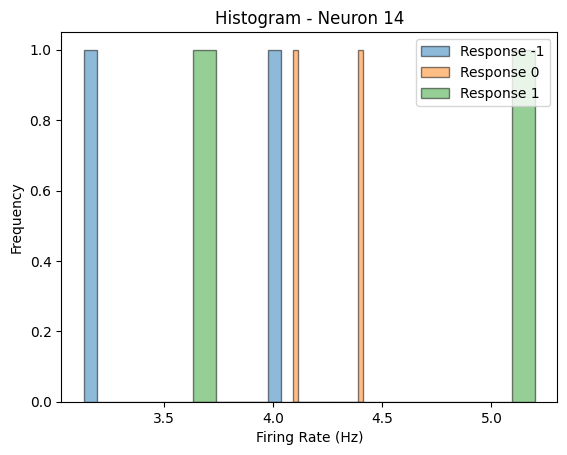

Neuron 15 Firing Rate Comparison:
Response Category -1: 3.62 Hz
Response Category 0: 3.41 Hz
Response Category 1: 4.24 Hz



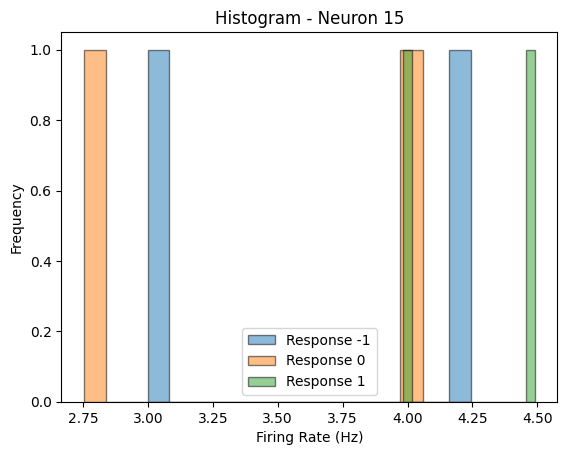

Neuron 16 Firing Rate Comparison:
Response Category -1: 3.39 Hz
Response Category 0: 3.20 Hz
Response Category 1: 4.59 Hz



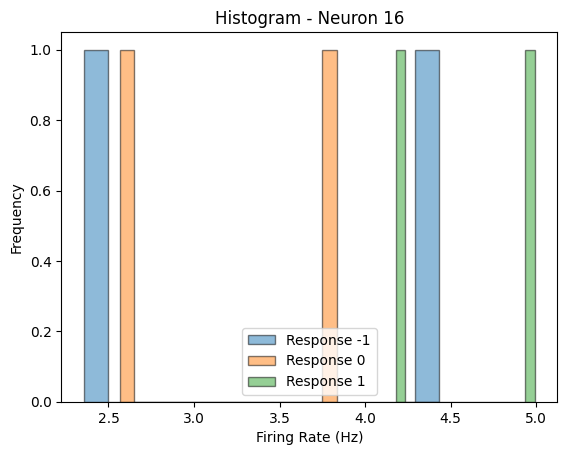

Neuron 17 Firing Rate Comparison:
Response Category -1: 3.97 Hz
Response Category 0: 4.53 Hz
Response Category 1: 4.90 Hz



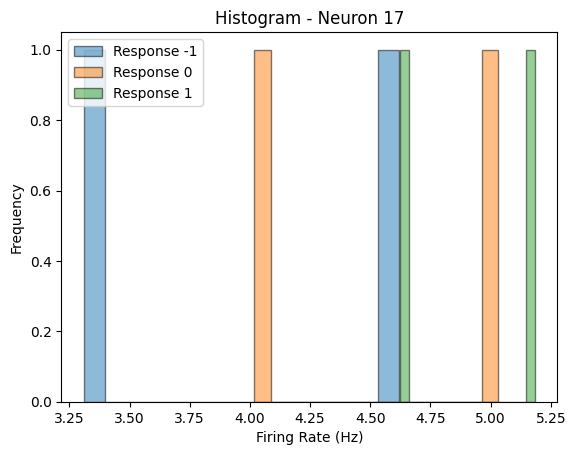

Neuron 18 Firing Rate Comparison:
Response Category -1: 3.40 Hz
Response Category 0: 5.73 Hz
Response Category 1: 4.22 Hz



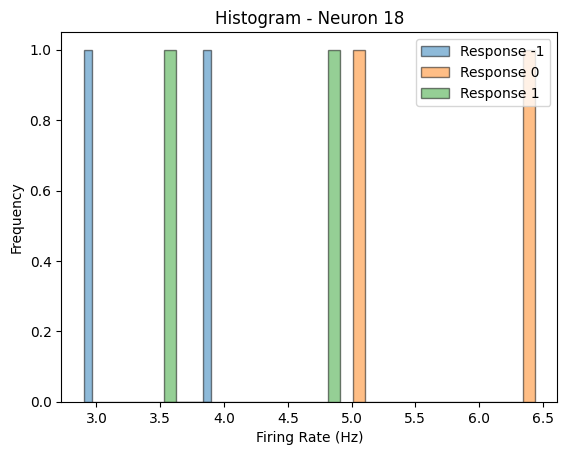

Neuron 19 Firing Rate Comparison:
Response Category -1: 4.10 Hz
Response Category 0: 4.46 Hz
Response Category 1: 4.72 Hz



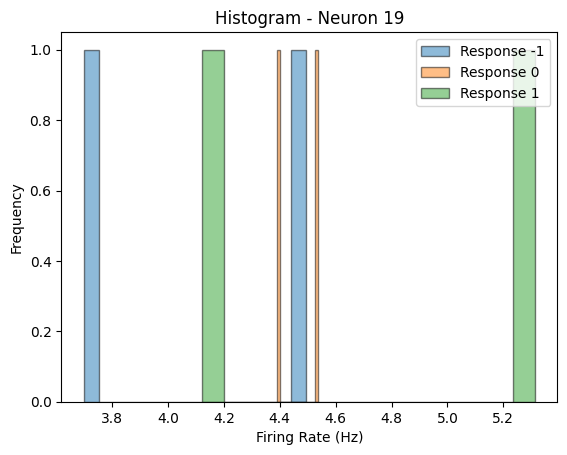

Neuron 20 Firing Rate Comparison:
Response Category -1: 4.29 Hz
Response Category 0: 4.32 Hz
Response Category 1: 4.19 Hz



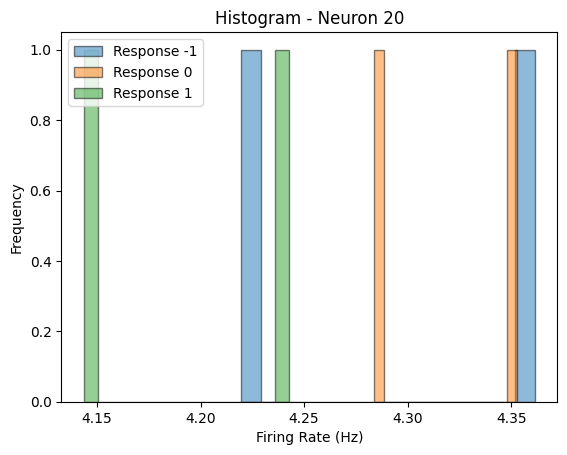

Neuron 21 Firing Rate Comparison:
Response Category -1: 3.69 Hz
Response Category 0: 3.42 Hz
Response Category 1: 3.87 Hz



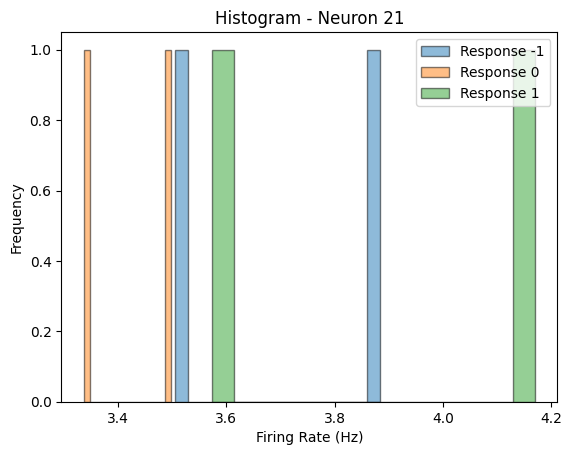

Neuron 22 Firing Rate Comparison:
Response Category -1: 3.49 Hz
Response Category 0: 3.98 Hz
Response Category 1: 4.64 Hz



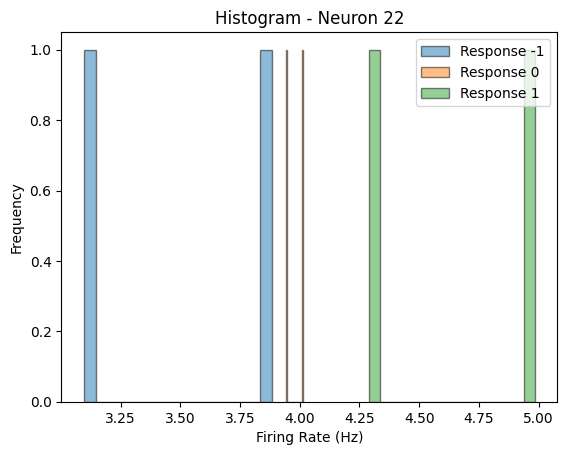

Neuron 23 Firing Rate Comparison:
Response Category -1: 3.19 Hz
Response Category 0: 2.77 Hz
Response Category 1: 4.05 Hz



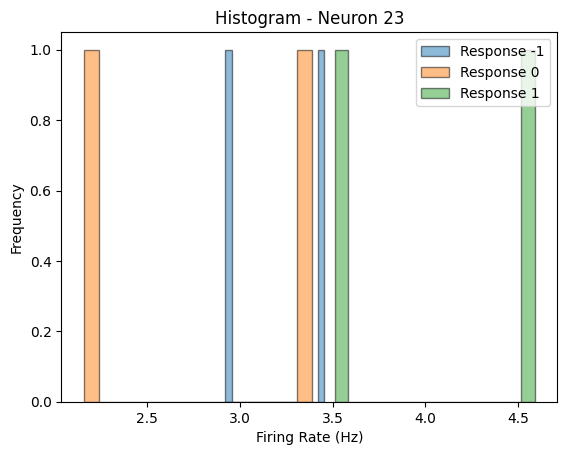

Neuron 24 Firing Rate Comparison:
Response Category -1: 3.42 Hz
Response Category 0: 2.92 Hz
Response Category 1: 4.31 Hz



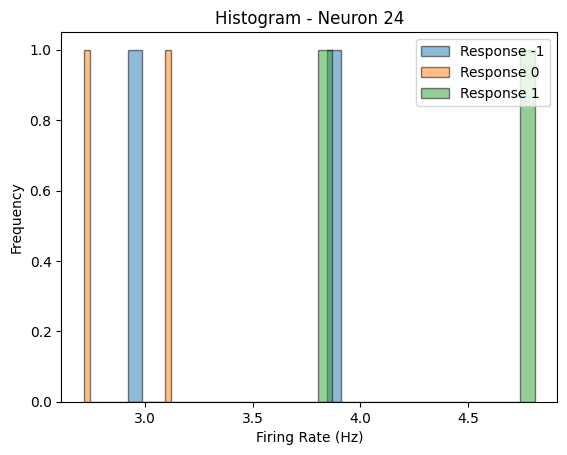

Neuron 25 Firing Rate Comparison:
Response Category -1: 3.98 Hz
Response Category 0: 3.98 Hz
Response Category 1: 4.93 Hz



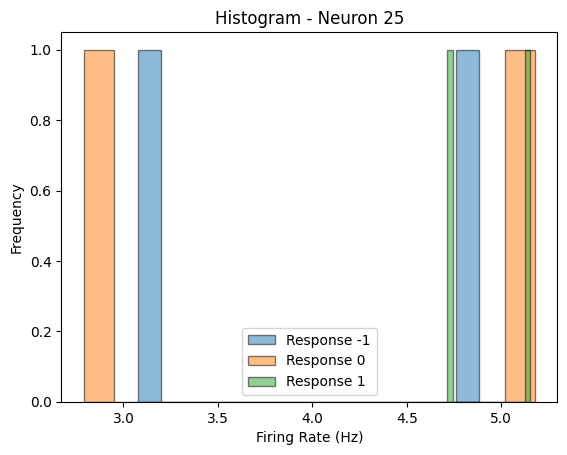

Neuron 26 Firing Rate Comparison:
Response Category -1: 5.03 Hz
Response Category 0: 4.01 Hz
Response Category 1: 4.43 Hz



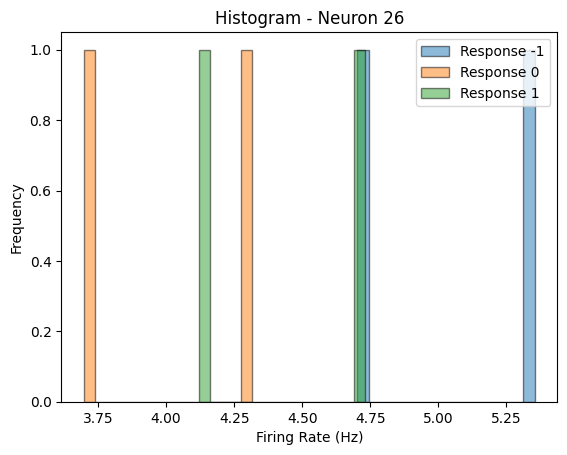

Neuron 27 Firing Rate Comparison:
Response Category -1: 3.75 Hz
Response Category 0: 3.22 Hz
Response Category 1: 4.76 Hz



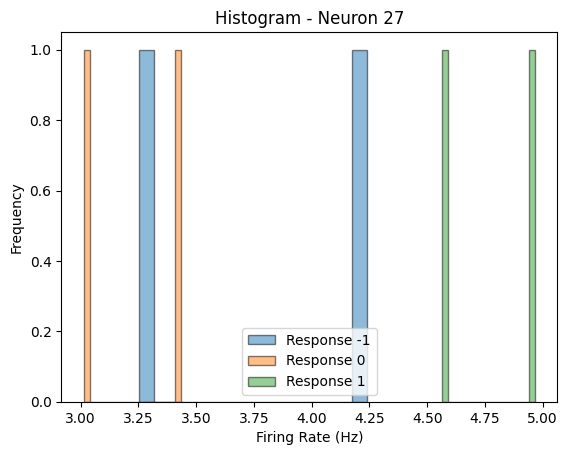

Neuron 28 Firing Rate Comparison:
Response Category -1: 3.84 Hz
Response Category 0: 3.22 Hz
Response Category 1: 4.73 Hz



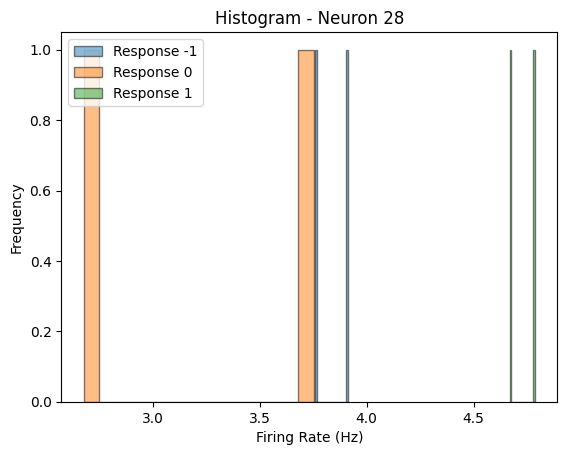

Neuron 29 Firing Rate Comparison:
Response Category -1: 4.25 Hz
Response Category 0: 2.99 Hz
Response Category 1: 4.54 Hz



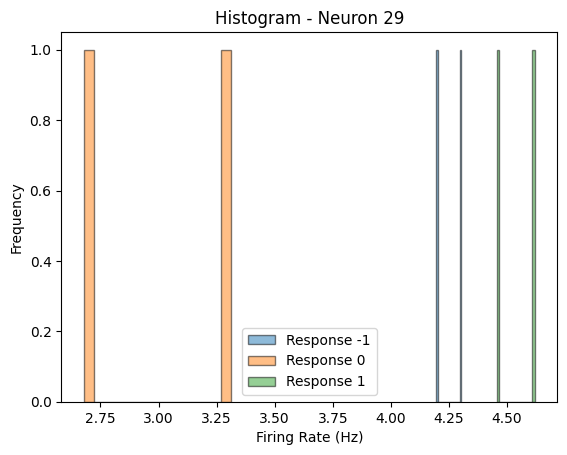

Neuron 30 Firing Rate Comparison:
Response Category -1: 4.05 Hz
Response Category 0: 3.41 Hz
Response Category 1: 4.52 Hz



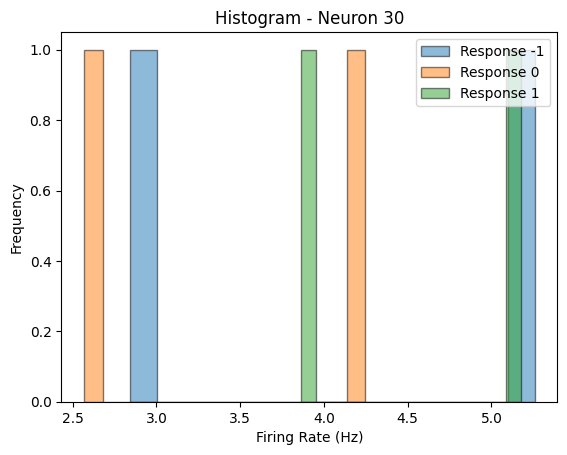

Neuron 31 Firing Rate Comparison:
Response Category -1: 4.02 Hz
Response Category 0: 3.31 Hz
Response Category 1: 4.75 Hz



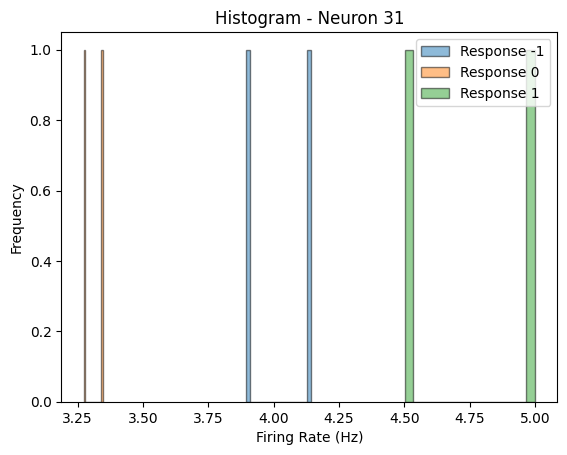

Neuron 32 Firing Rate Comparison:
Response Category -1: 4.36 Hz
Response Category 0: 4.66 Hz
Response Category 1: 4.09 Hz



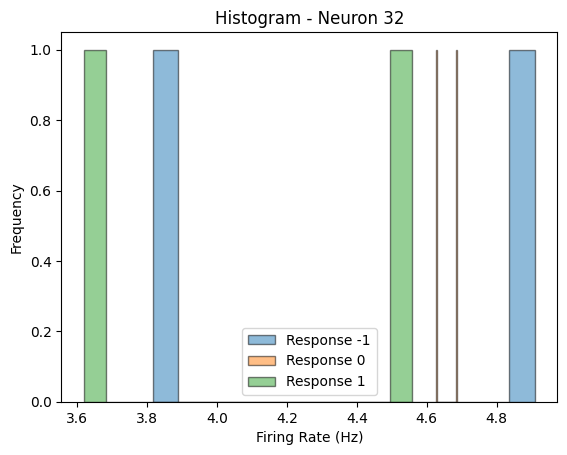

Neuron 33 Firing Rate Comparison:
Response Category -1: 3.93 Hz
Response Category 0: 3.45 Hz
Response Category 1: 3.97 Hz



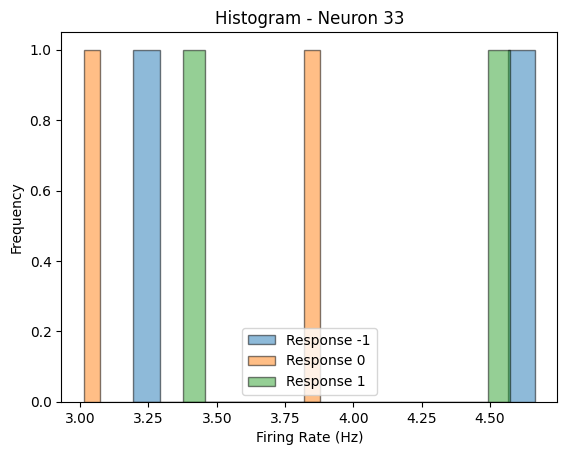

Neuron 34 Firing Rate Comparison:
Response Category -1: 4.41 Hz
Response Category 0: 4.11 Hz
Response Category 1: 4.00 Hz



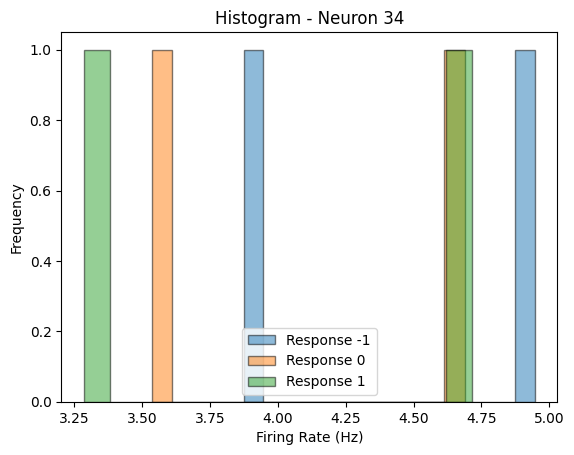

Neuron 35 Firing Rate Comparison:
Response Category -1: 4.59 Hz
Response Category 0: 4.07 Hz
Response Category 1: 3.87 Hz



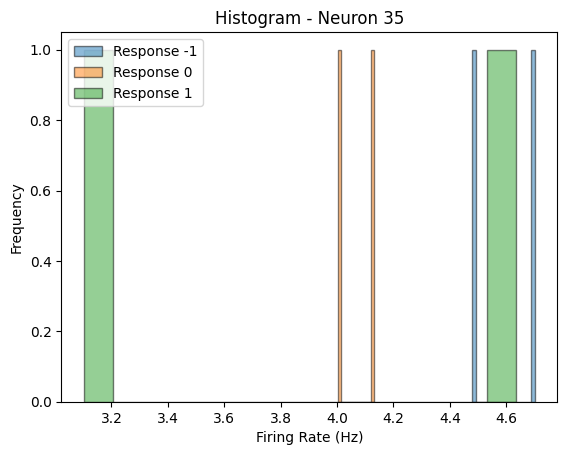

Neuron 36 Firing Rate Comparison:
Response Category -1: 4.89 Hz
Response Category 0: 3.34 Hz
Response Category 1: 4.39 Hz



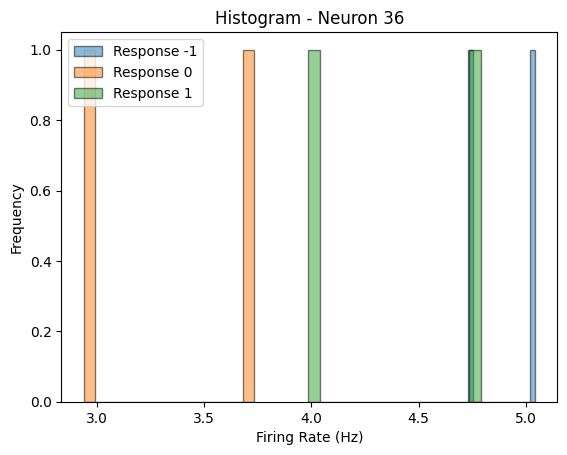

Neuron 37 Firing Rate Comparison:
Response Category -1: 3.34 Hz
Response Category 0: 2.98 Hz
Response Category 1: 4.45 Hz



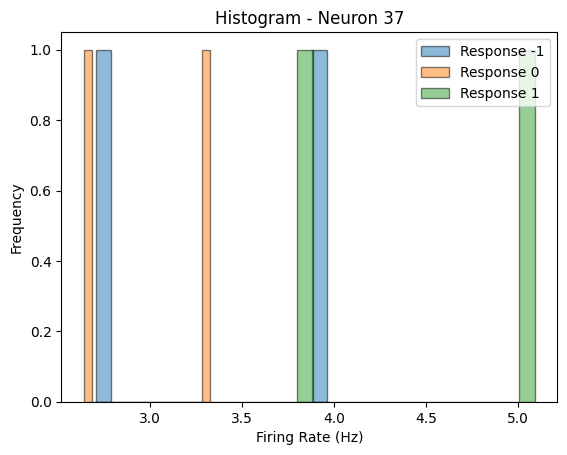

Neuron 38 Firing Rate Comparison:
Response Category -1: 4.16 Hz
Response Category 0: 3.74 Hz
Response Category 1: 4.18 Hz



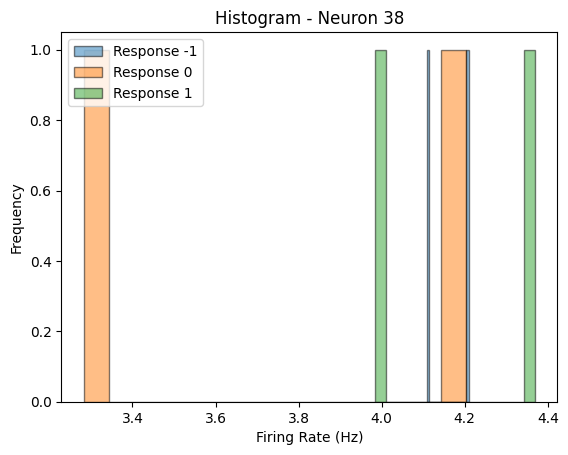

Neuron 39 Firing Rate Comparison:
Response Category -1: 4.78 Hz
Response Category 0: 3.44 Hz
Response Category 1: 4.20 Hz



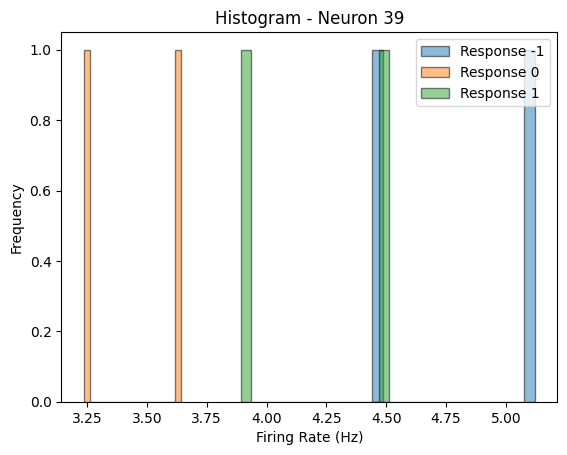

Neuron 40 Firing Rate Comparison:
Response Category -1: 3.99 Hz
Response Category 0: 3.23 Hz
Response Category 1: 4.18 Hz



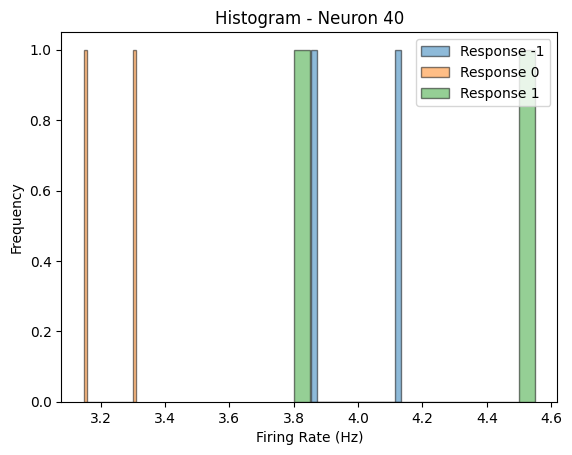

Neuron 41 Firing Rate Comparison:
Response Category -1: 3.95 Hz
Response Category 0: 2.95 Hz
Response Category 1: 4.21 Hz



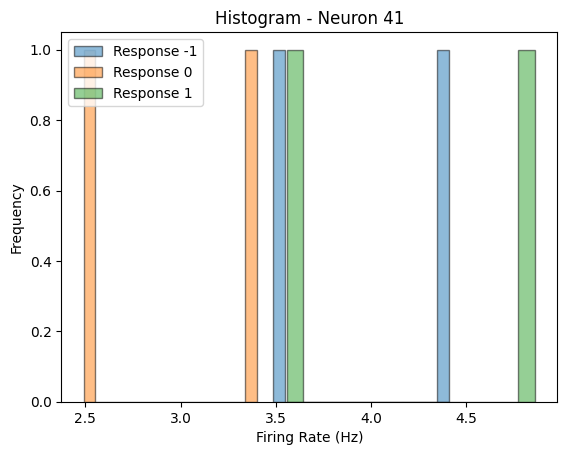

Neuron 42 Firing Rate Comparison:
Response Category -1: 4.85 Hz
Response Category 0: 3.76 Hz
Response Category 1: 5.26 Hz



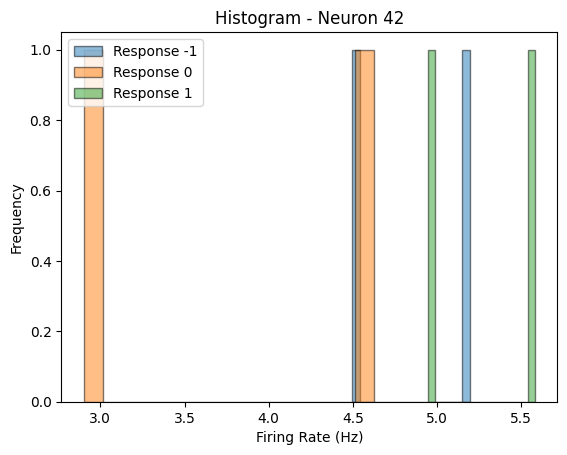

Neuron 43 Firing Rate Comparison:
Response Category -1: 4.53 Hz
Response Category 0: 3.63 Hz
Response Category 1: 4.35 Hz



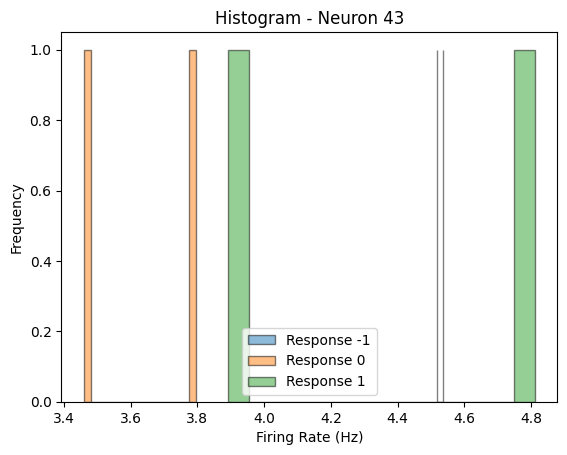

Neuron 44 Firing Rate Comparison:
Response Category -1: 3.77 Hz
Response Category 0: 3.16 Hz
Response Category 1: 4.98 Hz



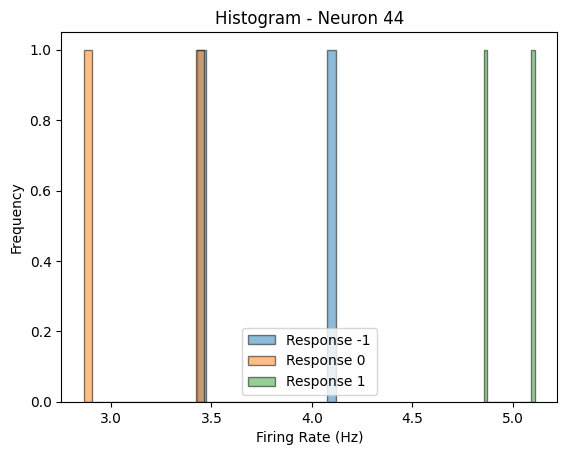

Neuron 45 Firing Rate Comparison:
Response Category -1: 3.81 Hz
Response Category 0: 2.81 Hz
Response Category 1: 4.35 Hz



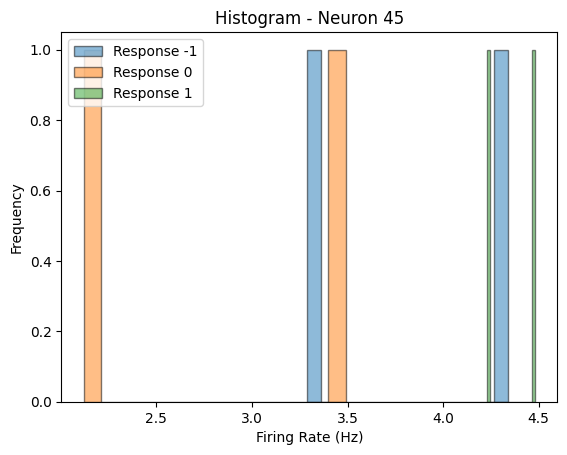

Neuron 46 Firing Rate Comparison:
Response Category -1: 3.40 Hz
Response Category 0: 3.23 Hz
Response Category 1: 4.22 Hz



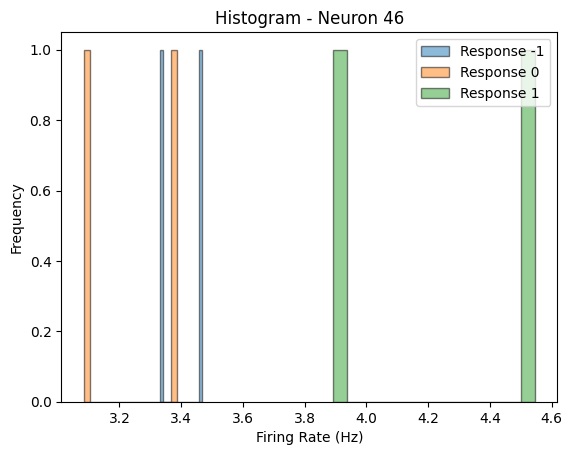

Neuron 47 Firing Rate Comparison:
Response Category -1: 4.02 Hz
Response Category 0: 3.15 Hz
Response Category 1: 4.73 Hz



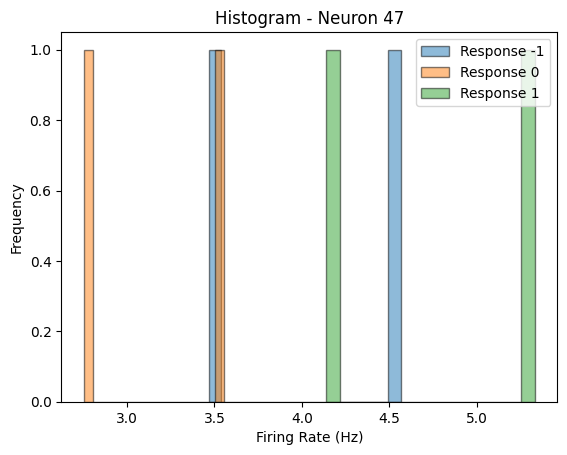

Neuron 48 Firing Rate Comparison:
Response Category -1: 3.85 Hz
Response Category 0: 3.83 Hz
Response Category 1: 4.43 Hz



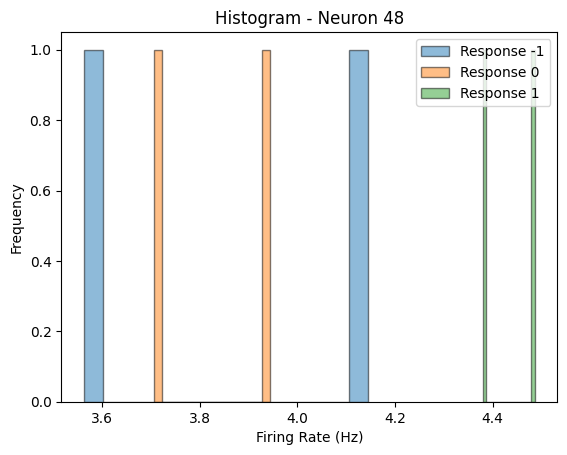

Neuron 49 Firing Rate Comparison:
Response Category -1: 4.02 Hz
Response Category 0: 3.46 Hz
Response Category 1: 5.21 Hz



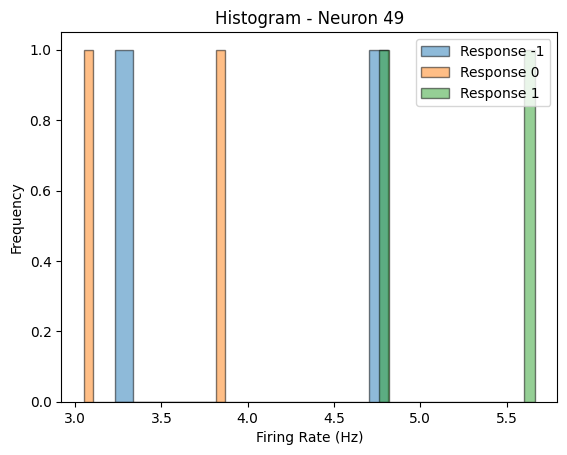

Neuron 50 Firing Rate Comparison:
Response Category -1: 3.56 Hz
Response Category 0: 2.92 Hz
Response Category 1: 5.66 Hz



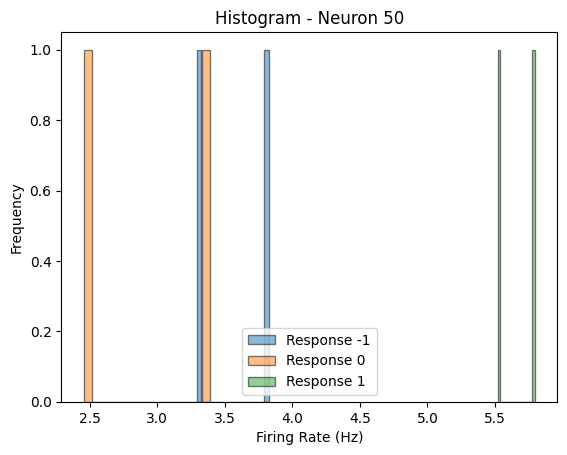

Neuron 51 Firing Rate Comparison:
Response Category -1: 3.87 Hz
Response Category 0: 3.58 Hz
Response Category 1: 5.43 Hz



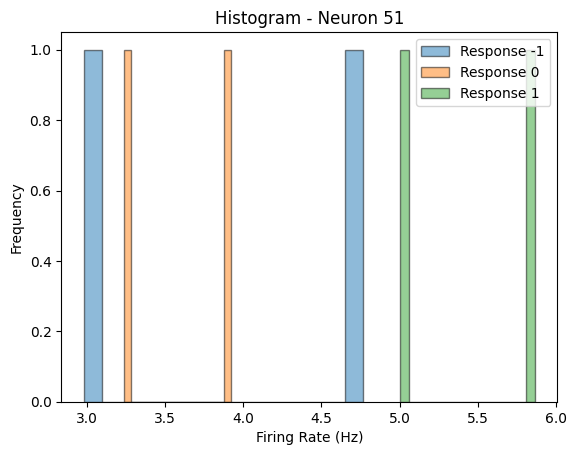

Neuron 52 Firing Rate Comparison:
Response Category -1: 3.88 Hz
Response Category 0: 3.03 Hz
Response Category 1: 4.80 Hz



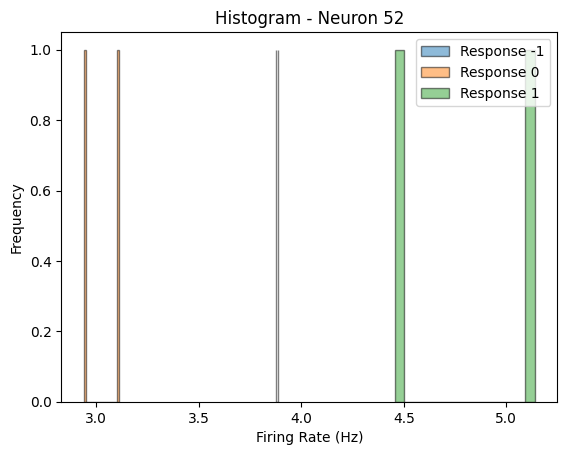

Neuron 53 Firing Rate Comparison:
Response Category -1: 3.70 Hz
Response Category 0: 3.53 Hz
Response Category 1: 4.28 Hz



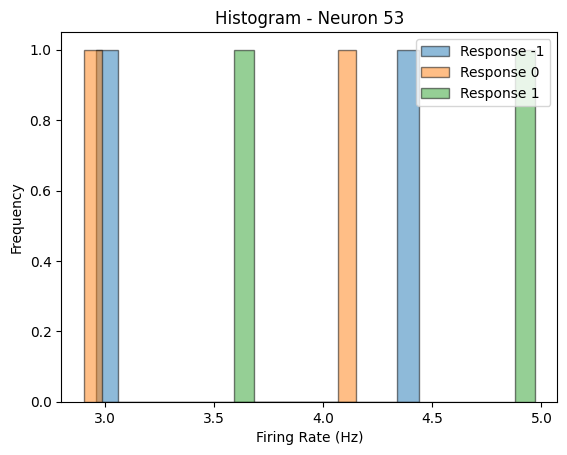

Neuron 54 Firing Rate Comparison:
Response Category -1: 4.09 Hz
Response Category 0: 3.70 Hz
Response Category 1: 4.79 Hz



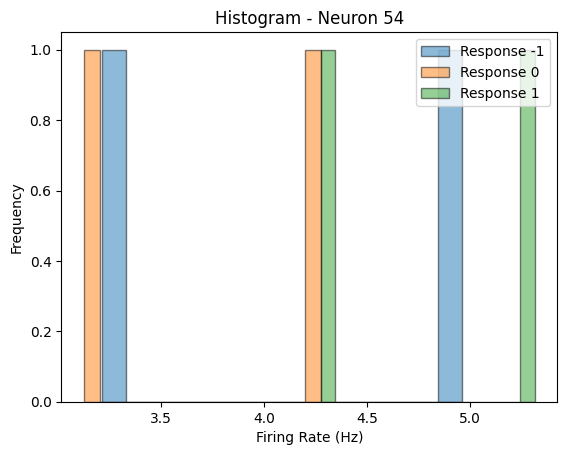

Neuron 55 Firing Rate Comparison:
Response Category -1: 4.55 Hz
Response Category 0: 3.66 Hz
Response Category 1: 4.60 Hz



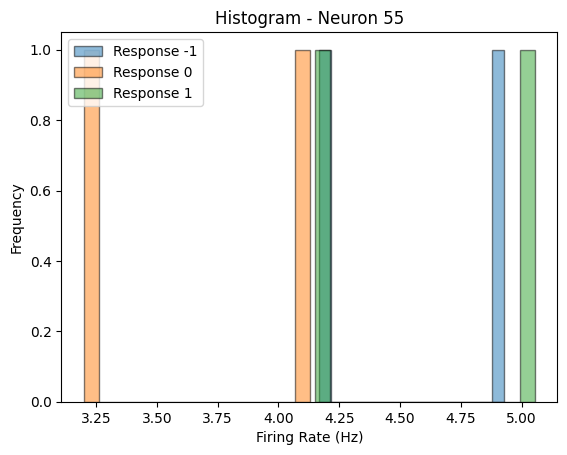

Neuron 56 Firing Rate Comparison:
Response Category -1: 4.37 Hz
Response Category 0: 3.74 Hz
Response Category 1: 5.10 Hz



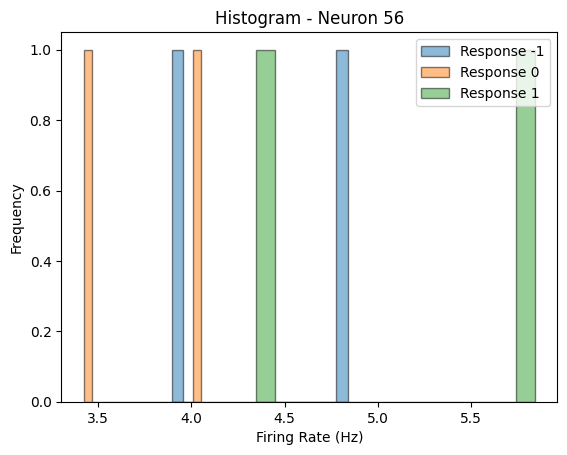

Neuron 57 Firing Rate Comparison:
Response Category -1: 4.45 Hz
Response Category 0: 3.64 Hz
Response Category 1: 4.79 Hz



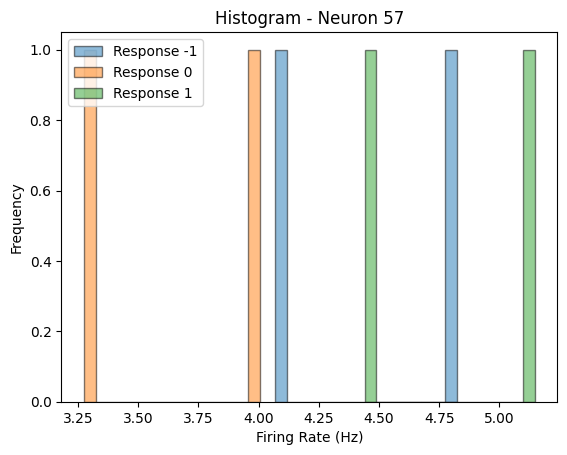

Neuron 58 Firing Rate Comparison:
Response Category -1: 4.39 Hz
Response Category 0: 3.91 Hz
Response Category 1: 4.74 Hz



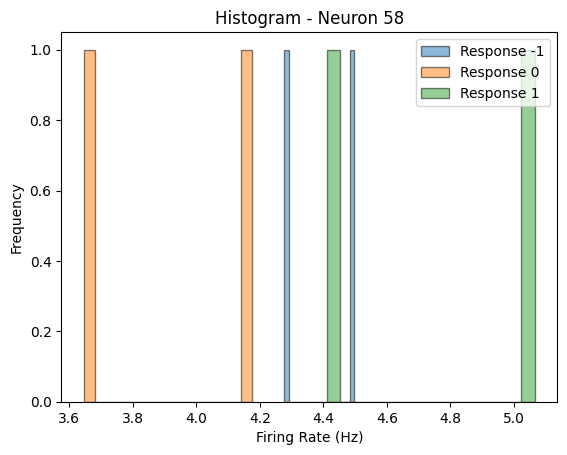

Neuron 59 Firing Rate Comparison:
Response Category -1: 4.35 Hz
Response Category 0: 3.88 Hz
Response Category 1: 4.32 Hz



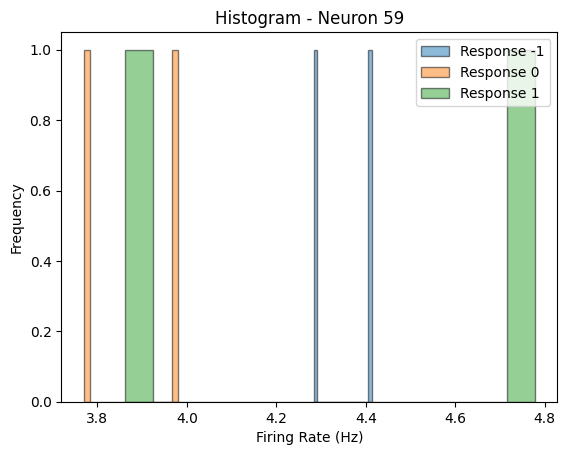

Neuron 60 Firing Rate Comparison:
Response Category -1: 4.42 Hz
Response Category 0: 3.81 Hz
Response Category 1: 4.34 Hz



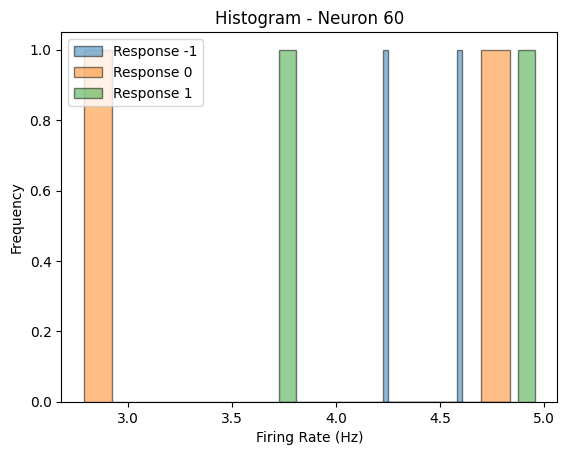

Neuron 61 Firing Rate Comparison:
Response Category -1: 4.33 Hz
Response Category 0: 3.67 Hz
Response Category 1: 4.24 Hz



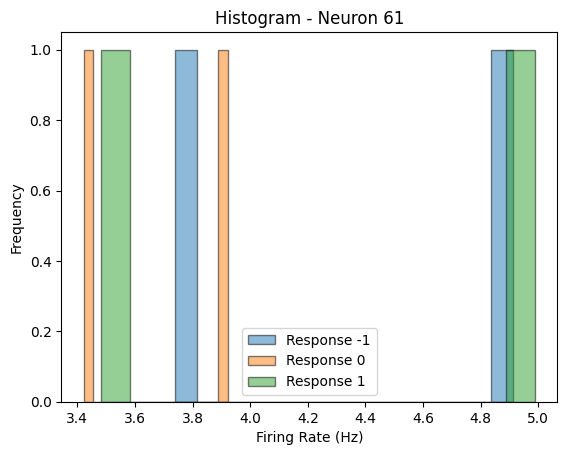

Neuron 62 Firing Rate Comparison:
Response Category -1: 4.62 Hz
Response Category 0: 3.72 Hz
Response Category 1: 4.34 Hz



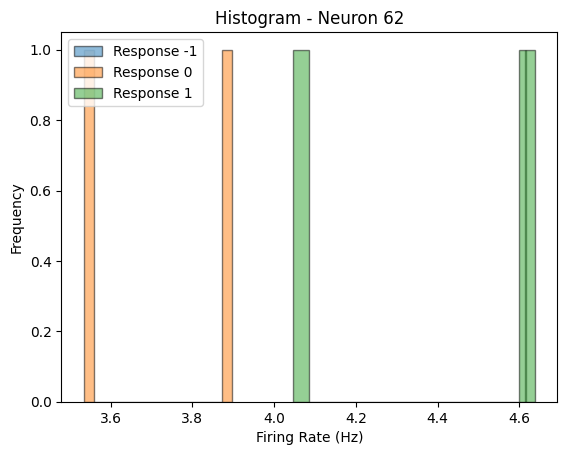

Neuron 63 Firing Rate Comparison:
Response Category -1: 5.03 Hz
Response Category 0: 4.21 Hz
Response Category 1: 4.65 Hz



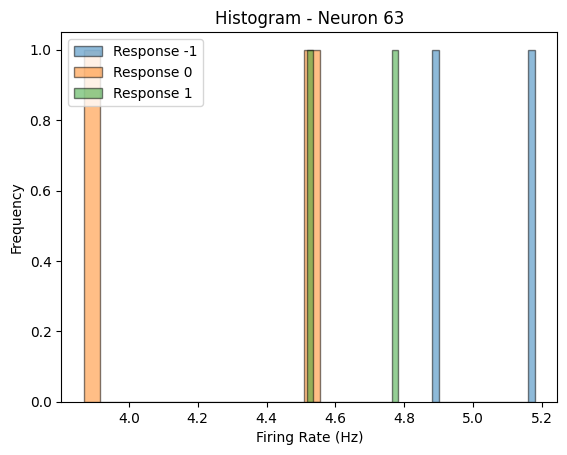

Neuron 64 Firing Rate Comparison:
Response Category -1: 4.33 Hz
Response Category 0: 3.80 Hz
Response Category 1: 4.68 Hz



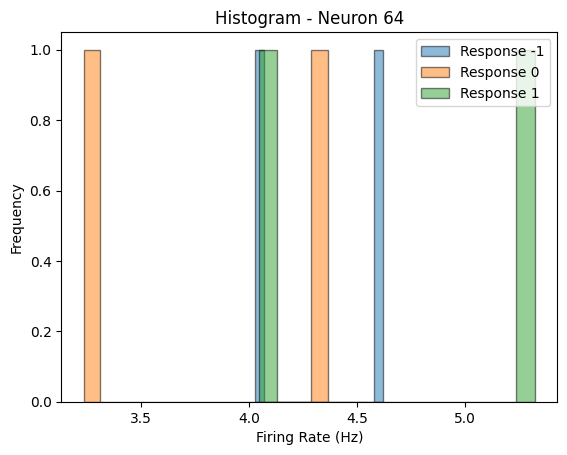

Neuron 65 Firing Rate Comparison:
Response Category -1: 3.87 Hz
Response Category 0: 3.87 Hz
Response Category 1: 4.06 Hz



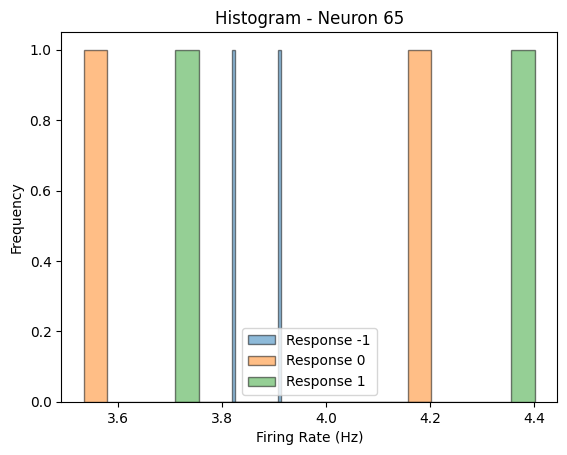

Neuron 66 Firing Rate Comparison:
Response Category -1: 4.41 Hz
Response Category 0: 3.97 Hz
Response Category 1: 3.82 Hz



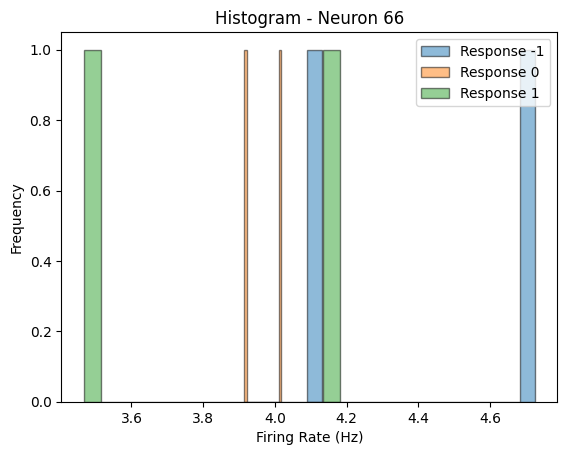

Neuron 67 Firing Rate Comparison:
Response Category -1: 4.04 Hz
Response Category 0: 3.60 Hz
Response Category 1: 4.40 Hz



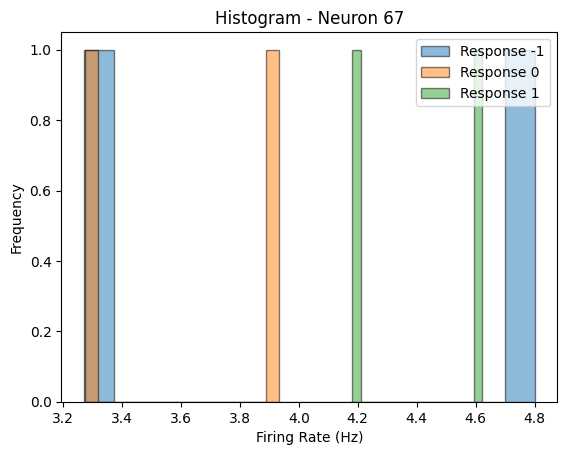

Neuron 68 Firing Rate Comparison:
Response Category -1: 4.05 Hz
Response Category 0: 3.49 Hz
Response Category 1: 4.34 Hz



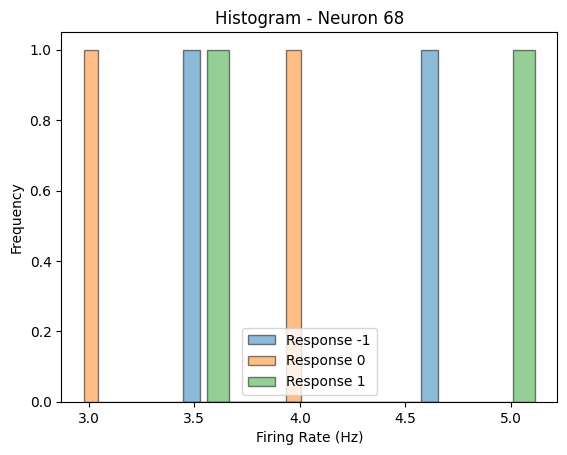

Neuron 69 Firing Rate Comparison:
Response Category -1: 3.77 Hz
Response Category 0: 3.74 Hz
Response Category 1: 4.80 Hz



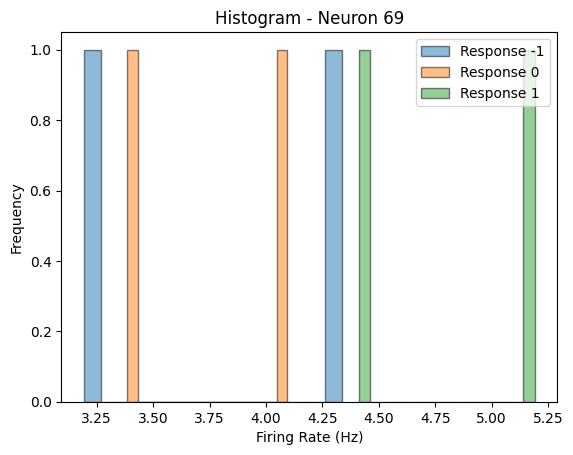

Neuron 70 Firing Rate Comparison:
Response Category -1: 3.96 Hz
Response Category 0: 3.17 Hz
Response Category 1: 5.11 Hz



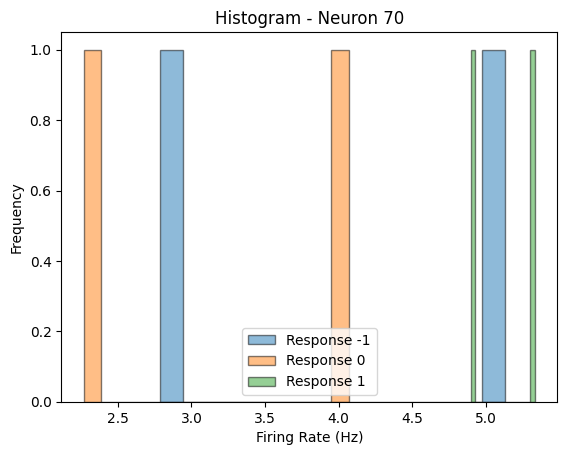

Neuron 71 Firing Rate Comparison:
Response Category -1: 3.27 Hz
Response Category 0: 2.95 Hz
Response Category 1: 4.38 Hz



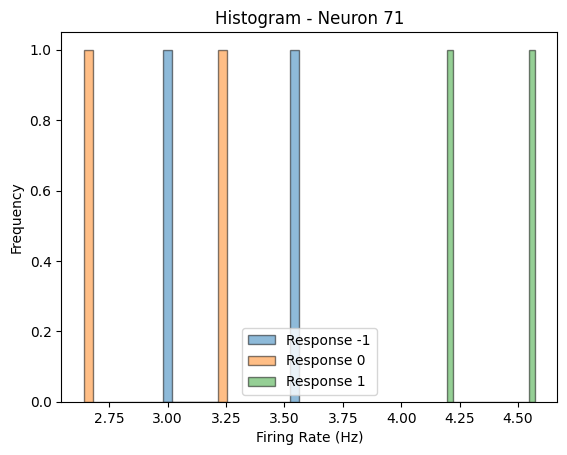

Neuron 72 Firing Rate Comparison:
Response Category -1: 4.12 Hz
Response Category 0: 3.62 Hz
Response Category 1: 5.06 Hz



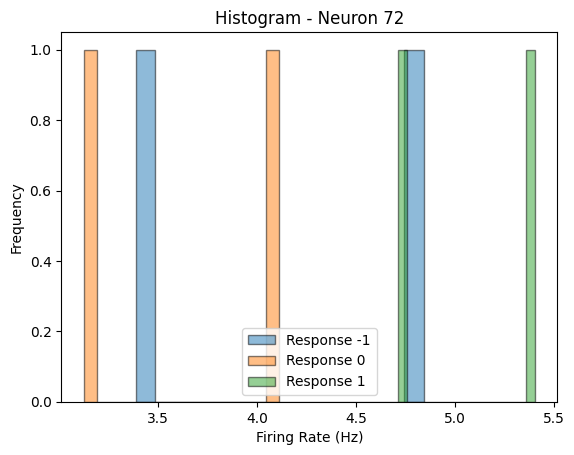

Neuron 73 Firing Rate Comparison:
Response Category -1: 4.22 Hz
Response Category 0: 3.72 Hz
Response Category 1: 4.60 Hz



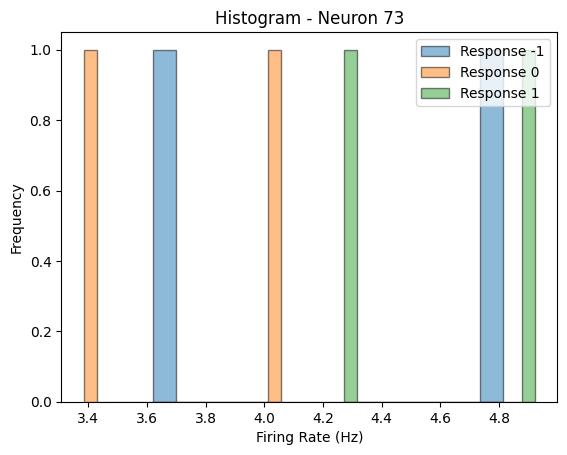

Neuron 74 Firing Rate Comparison:
Response Category -1: 4.09 Hz
Response Category 0: 3.24 Hz
Response Category 1: 5.00 Hz



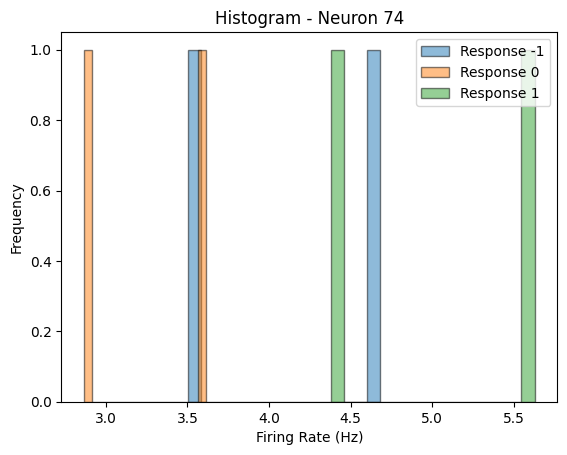

Neuron 75 Firing Rate Comparison:
Response Category -1: 3.59 Hz
Response Category 0: 2.76 Hz
Response Category 1: 4.90 Hz



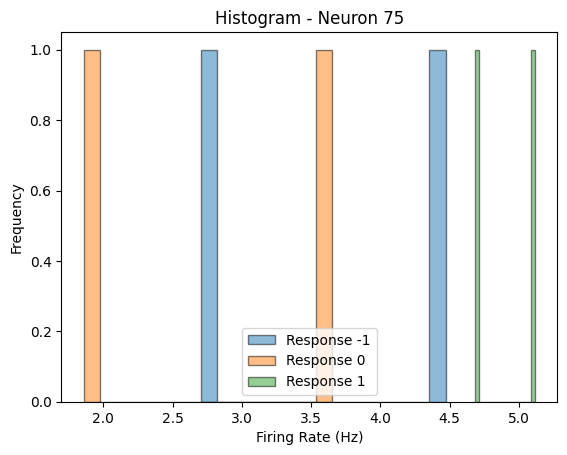

Neuron 76 Firing Rate Comparison:
Response Category -1: 4.34 Hz
Response Category 0: 3.55 Hz
Response Category 1: 5.20 Hz



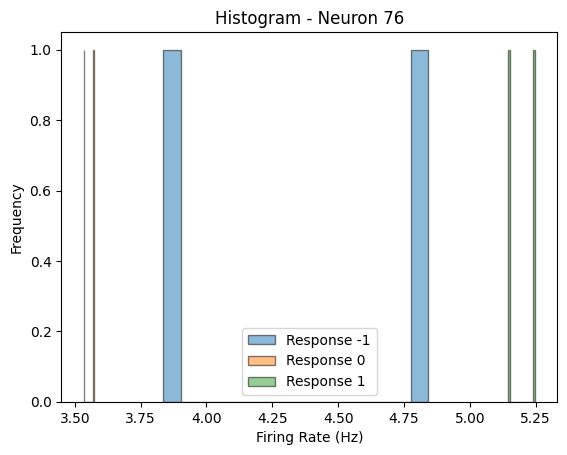

Neuron 77 Firing Rate Comparison:
Response Category -1: 3.63 Hz
Response Category 0: 3.89 Hz
Response Category 1: 4.45 Hz



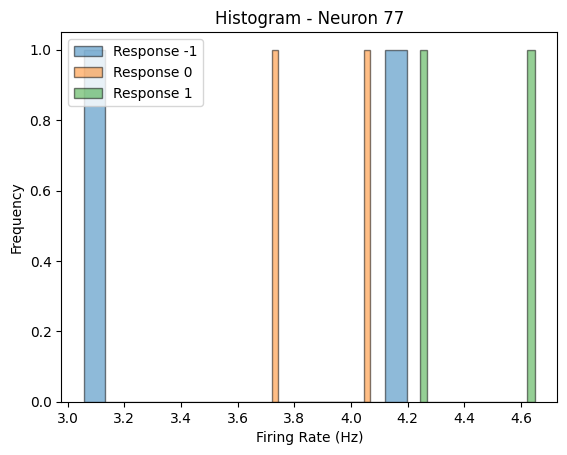

Neuron 78 Firing Rate Comparison:
Response Category -1: 3.33 Hz
Response Category 0: 3.55 Hz
Response Category 1: 3.96 Hz



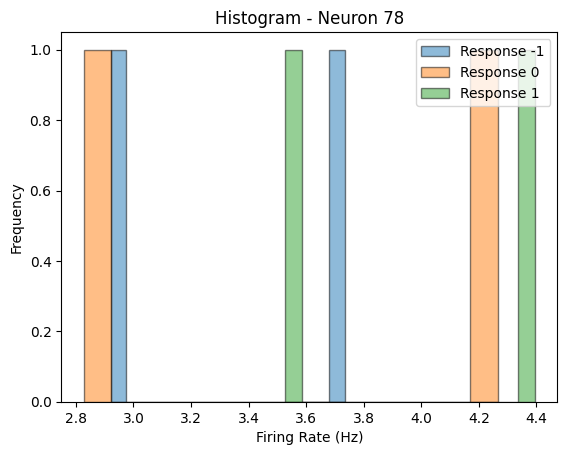

Neuron 79 Firing Rate Comparison:
Response Category -1: 3.25 Hz
Response Category 0: 3.41 Hz
Response Category 1: 3.93 Hz



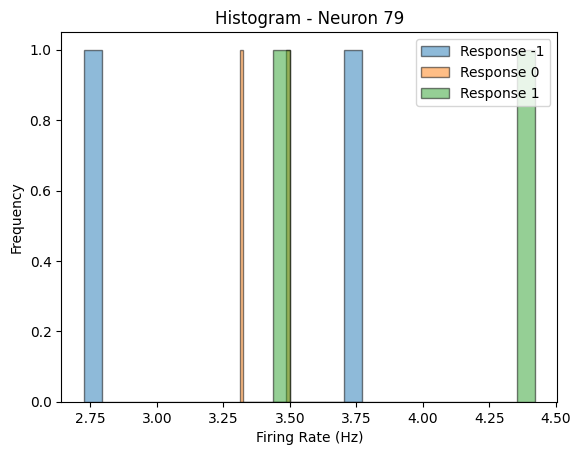

Neuron 80 Firing Rate Comparison:
Response Category -1: 3.30 Hz
Response Category 0: 3.18 Hz
Response Category 1: 4.83 Hz



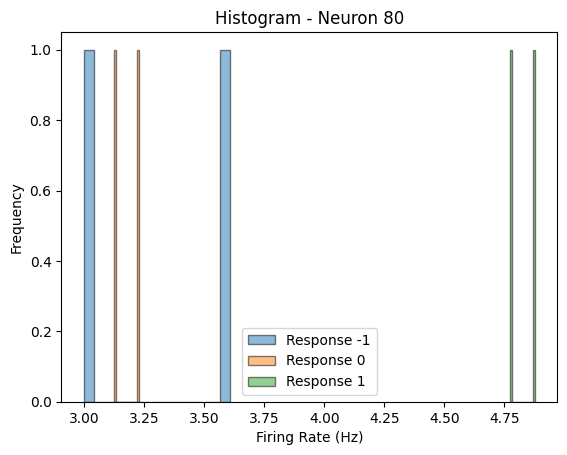

Neuron 81 Firing Rate Comparison:
Response Category -1: 3.35 Hz
Response Category 0: 3.10 Hz
Response Category 1: 4.36 Hz



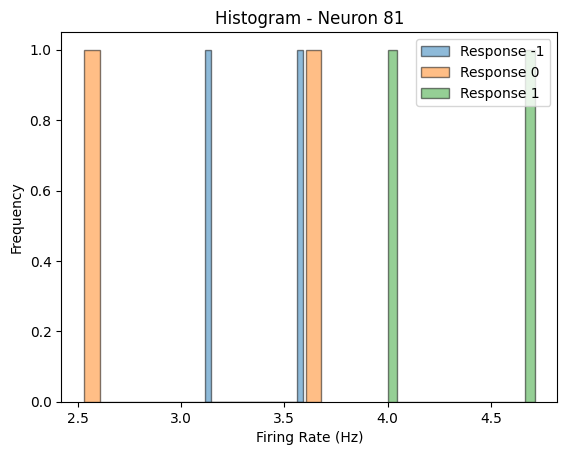

Neuron 82 Firing Rate Comparison:
Response Category -1: 3.52 Hz
Response Category 0: 3.03 Hz
Response Category 1: 4.24 Hz



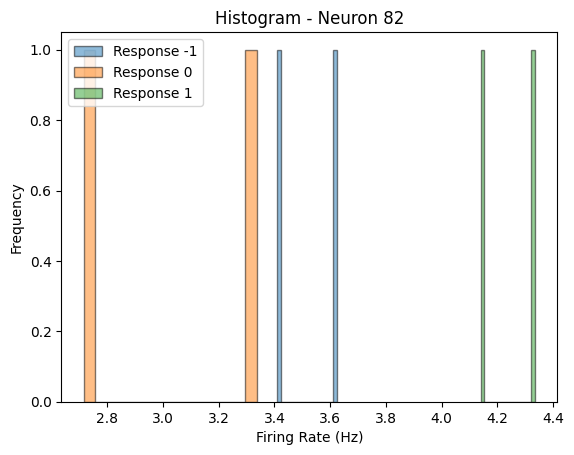

Neuron 83 Firing Rate Comparison:
Response Category -1: 4.08 Hz
Response Category 0: 3.10 Hz
Response Category 1: 3.67 Hz



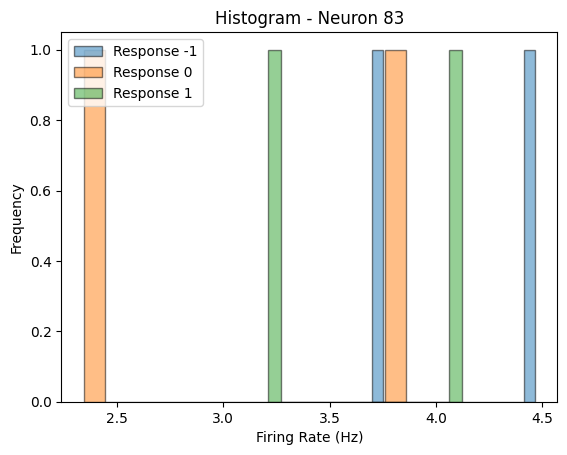

Neuron 84 Firing Rate Comparison:
Response Category -1: 4.42 Hz
Response Category 0: 5.13 Hz
Response Category 1: 4.23 Hz



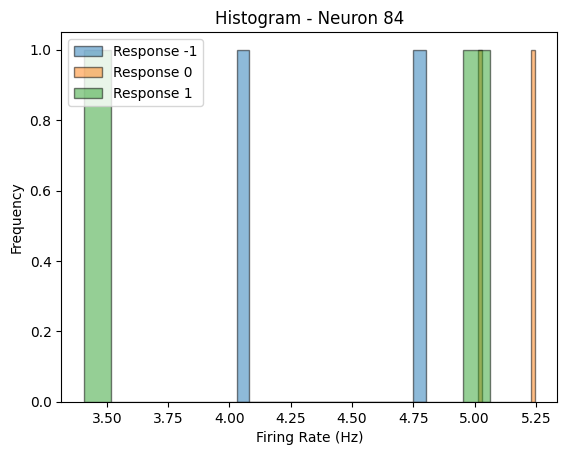

Neuron 85 Firing Rate Comparison:
Response Category -1: 3.30 Hz
Response Category 0: 4.29 Hz
Response Category 1: 4.38 Hz



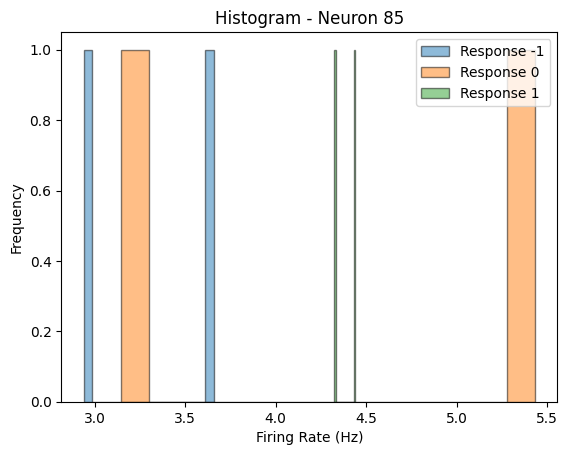

Neuron 86 Firing Rate Comparison:
Response Category -1: 3.57 Hz
Response Category 0: 3.11 Hz
Response Category 1: 4.15 Hz



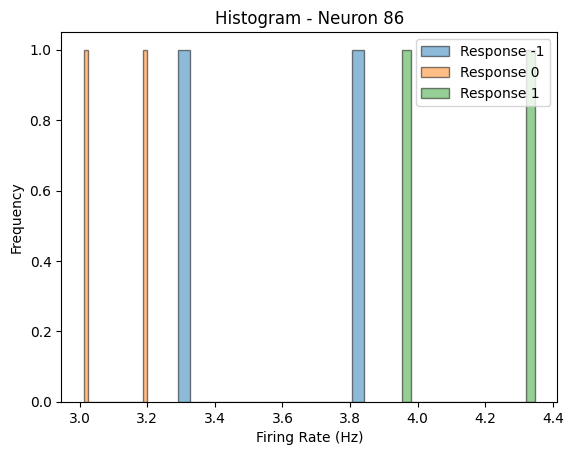

Neuron 87 Firing Rate Comparison:
Response Category -1: 4.24 Hz
Response Category 0: 3.38 Hz
Response Category 1: 4.49 Hz



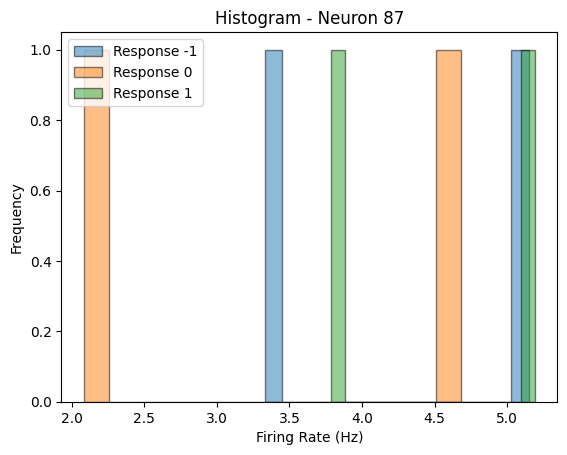

Neuron 88 Firing Rate Comparison:
Response Category -1: 4.11 Hz
Response Category 0: 3.72 Hz
Response Category 1: 4.88 Hz



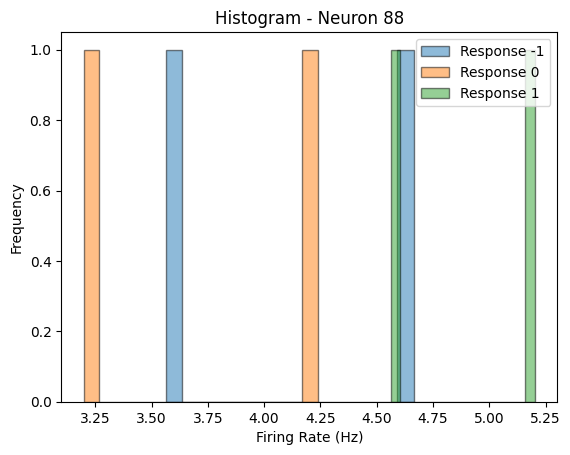

Neuron 89 Firing Rate Comparison:
Response Category -1: 3.94 Hz
Response Category 0: 4.98 Hz
Response Category 1: 4.67 Hz



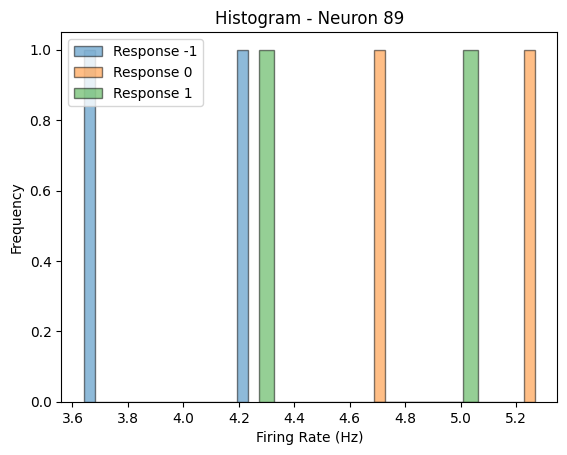

Neuron 90 Firing Rate Comparison:
Response Category -1: 3.23 Hz
Response Category 0: 3.29 Hz
Response Category 1: 3.16 Hz



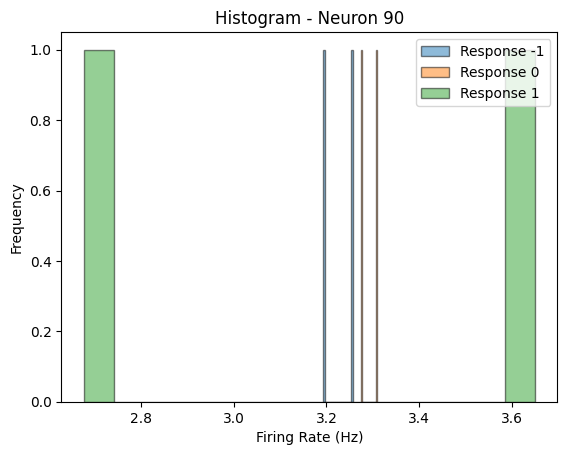

Neuron 91 Firing Rate Comparison:
Response Category -1: 3.59 Hz
Response Category 0: 3.84 Hz
Response Category 1: 4.36 Hz



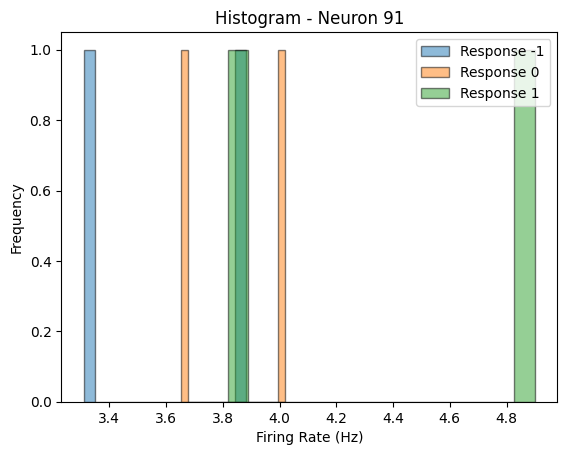

Neuron 92 Firing Rate Comparison:
Response Category -1: 4.19 Hz
Response Category 0: 3.45 Hz
Response Category 1: 4.22 Hz



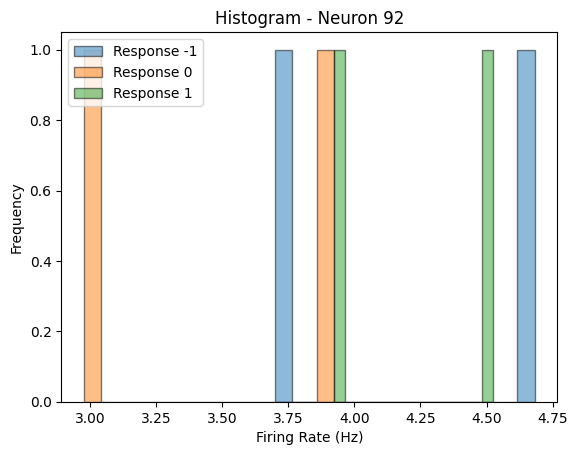

Neuron 93 Firing Rate Comparison:
Response Category -1: 3.92 Hz
Response Category 0: 4.09 Hz
Response Category 1: 4.41 Hz



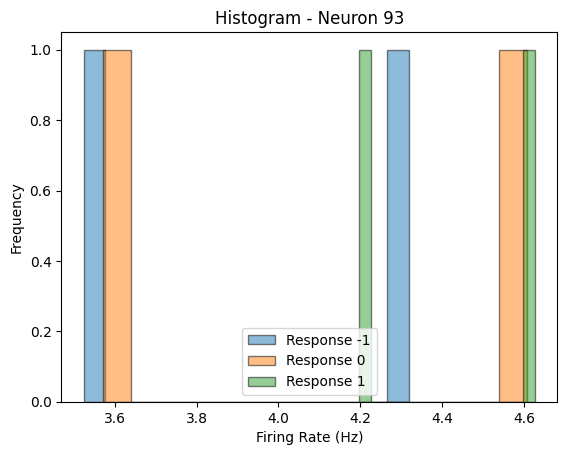

Neuron 94 Firing Rate Comparison:
Response Category -1: 3.99 Hz
Response Category 0: 3.78 Hz
Response Category 1: 4.62 Hz



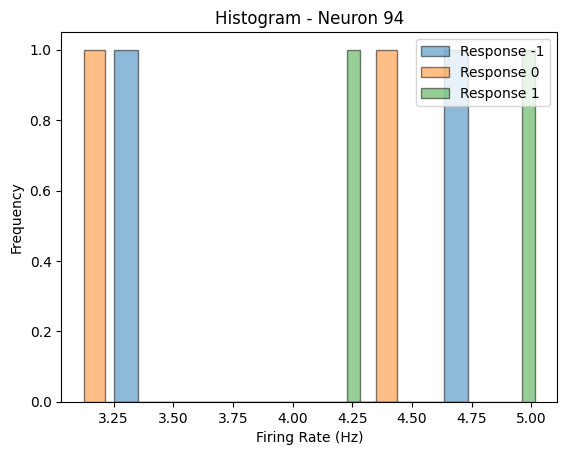

Neuron 95 Firing Rate Comparison:
Response Category -1: 4.42 Hz
Response Category 0: 3.93 Hz
Response Category 1: 3.85 Hz



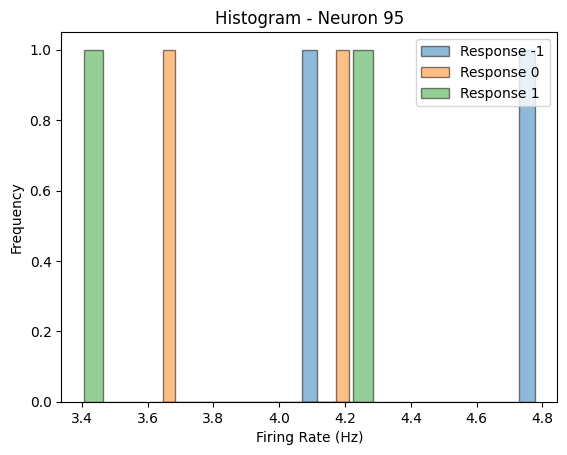

Neuron 96 Firing Rate Comparison:
Response Category -1: 3.30 Hz
Response Category 0: 3.38 Hz
Response Category 1: 4.97 Hz



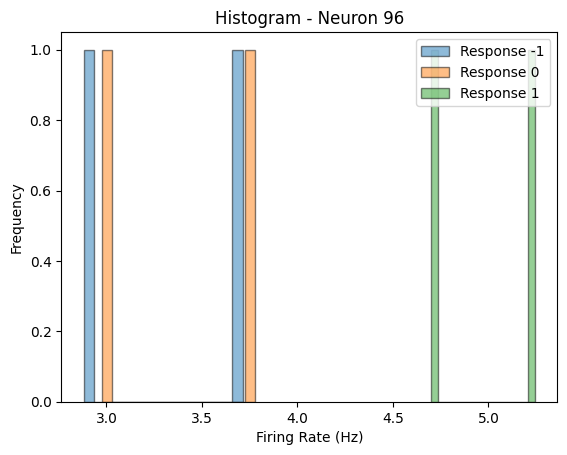

Neuron 97 Firing Rate Comparison:
Response Category -1: 3.84 Hz
Response Category 0: 3.71 Hz
Response Category 1: 4.21 Hz



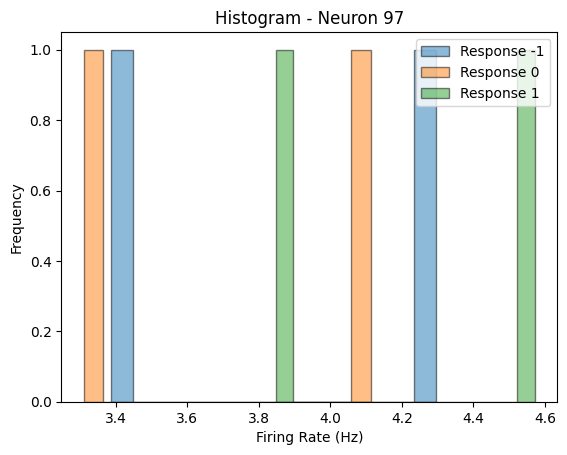

Neuron 98 Firing Rate Comparison:
Response Category -1: 4.27 Hz
Response Category 0: 3.92 Hz
Response Category 1: 4.23 Hz



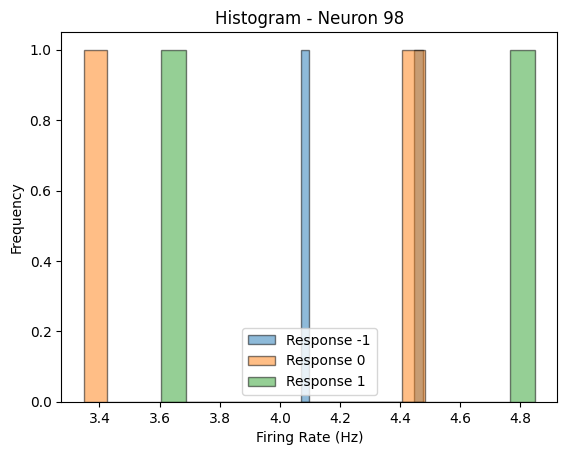

Neuron 99 Firing Rate Comparison:
Response Category -1: 4.28 Hz
Response Category 0: 4.59 Hz
Response Category 1: 4.96 Hz



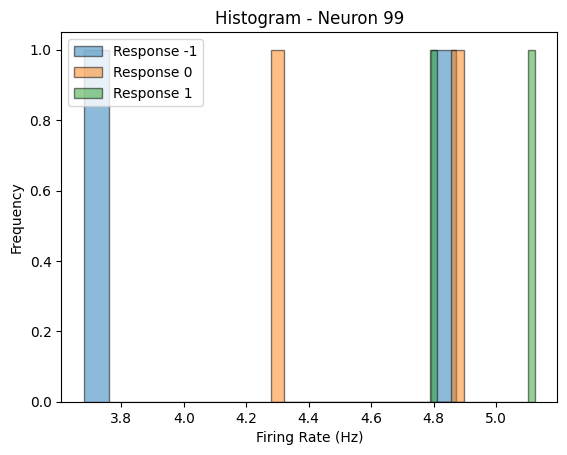

Neuron 100 Firing Rate Comparison:
Response Category -1: 4.48 Hz
Response Category 0: 4.40 Hz
Response Category 1: 4.40 Hz



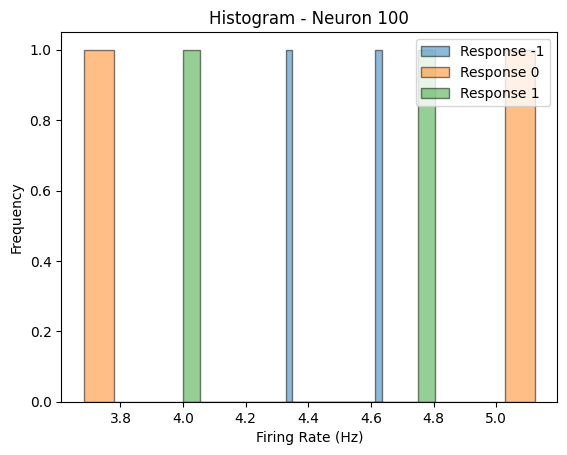

Neuron 101 Firing Rate Comparison:
Response Category -1: 4.85 Hz
Response Category 0: 4.38 Hz
Response Category 1: 4.59 Hz



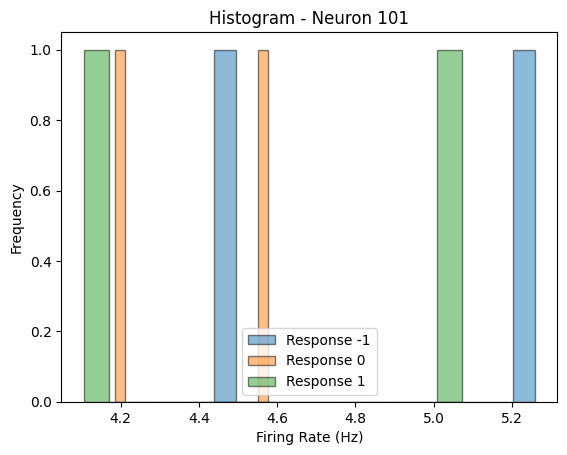

Neuron 102 Firing Rate Comparison:
Response Category -1: 3.61 Hz
Response Category 0: 4.06 Hz
Response Category 1: 5.00 Hz



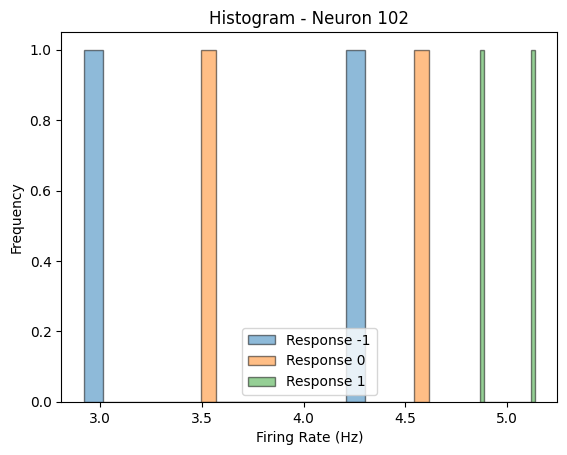

Neuron 103 Firing Rate Comparison:
Response Category -1: 4.22 Hz
Response Category 0: 4.64 Hz
Response Category 1: 4.34 Hz



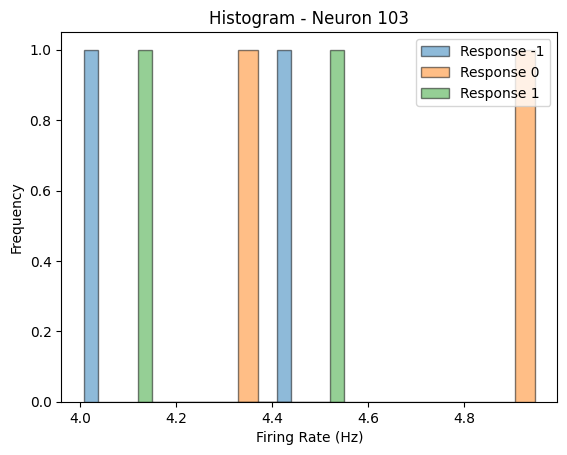

Neuron 104 Firing Rate Comparison:
Response Category -1: 3.93 Hz
Response Category 0: 4.46 Hz
Response Category 1: 4.71 Hz



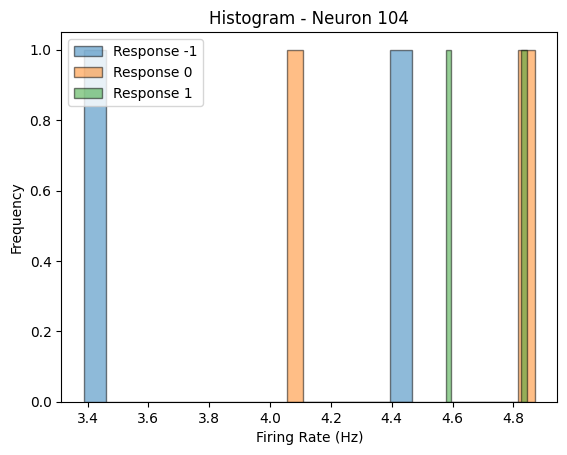

Neuron 105 Firing Rate Comparison:
Response Category -1: 3.83 Hz
Response Category 0: 4.48 Hz
Response Category 1: 4.21 Hz



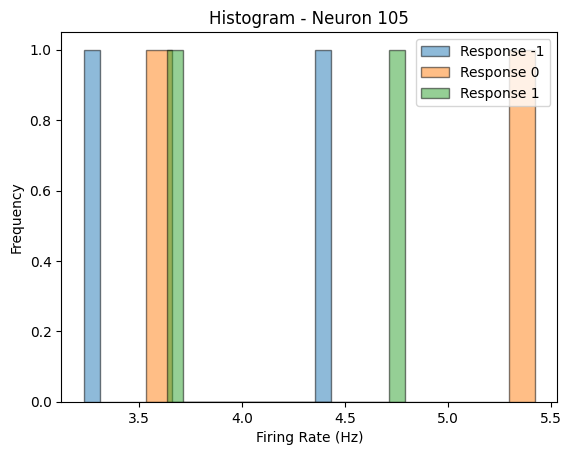

Neuron 106 Firing Rate Comparison:
Response Category -1: 4.19 Hz
Response Category 0: 4.30 Hz
Response Category 1: 4.43 Hz



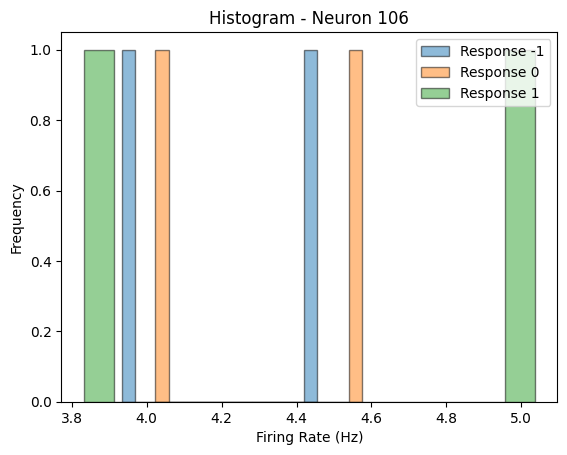

Neuron 107 Firing Rate Comparison:
Response Category -1: 3.87 Hz
Response Category 0: 3.09 Hz
Response Category 1: 4.94 Hz



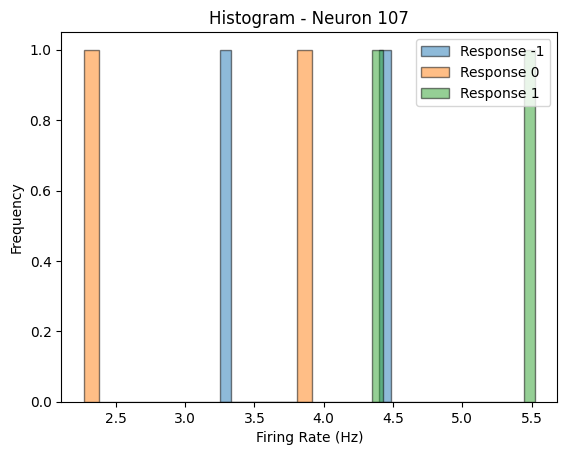

Neuron 108 Firing Rate Comparison:
Response Category -1: 4.59 Hz
Response Category 0: 3.45 Hz
Response Category 1: 4.58 Hz



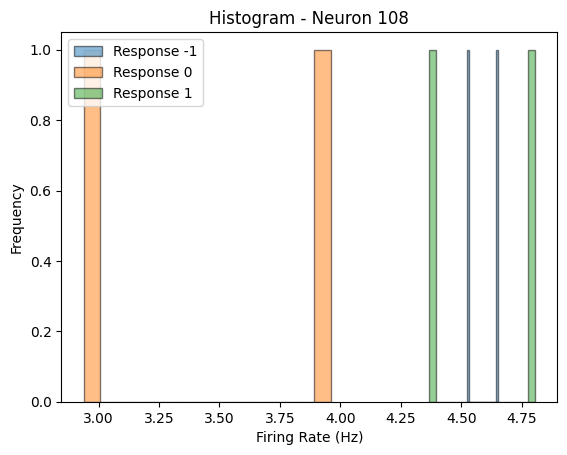

Neuron 109 Firing Rate Comparison:
Response Category -1: 4.30 Hz
Response Category 0: 3.76 Hz
Response Category 1: 4.85 Hz



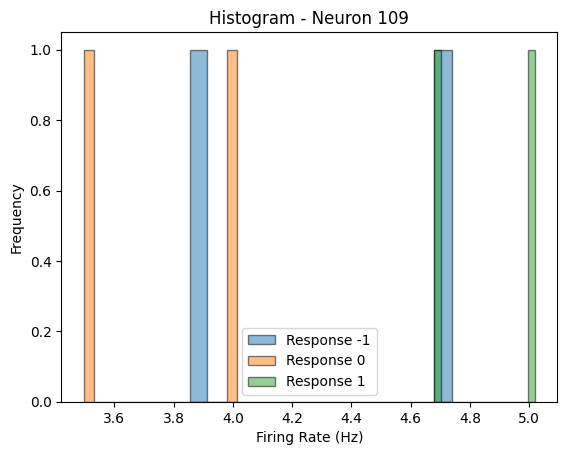

Neuron 110 Firing Rate Comparison:
Response Category -1: 3.55 Hz
Response Category 0: 3.42 Hz
Response Category 1: 4.52 Hz



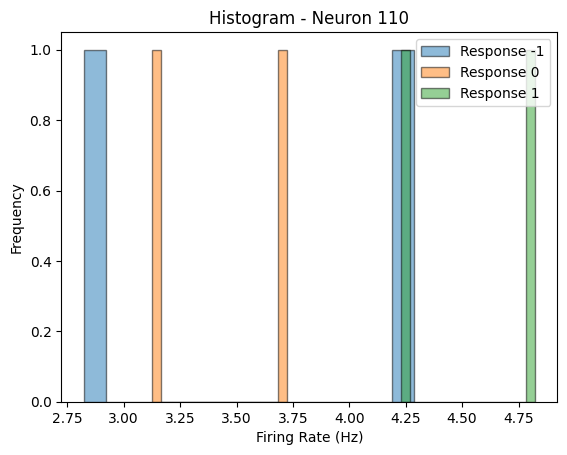

Neuron 111 Firing Rate Comparison:
Response Category -1: 3.74 Hz
Response Category 0: 3.79 Hz
Response Category 1: 4.19 Hz



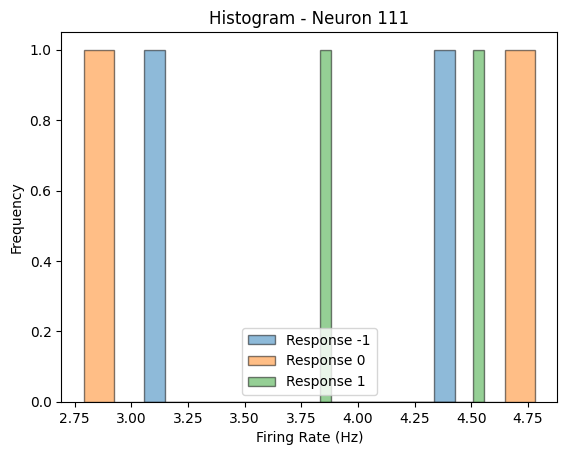

Neuron 112 Firing Rate Comparison:
Response Category -1: 4.01 Hz
Response Category 0: 4.03 Hz
Response Category 1: 4.10 Hz



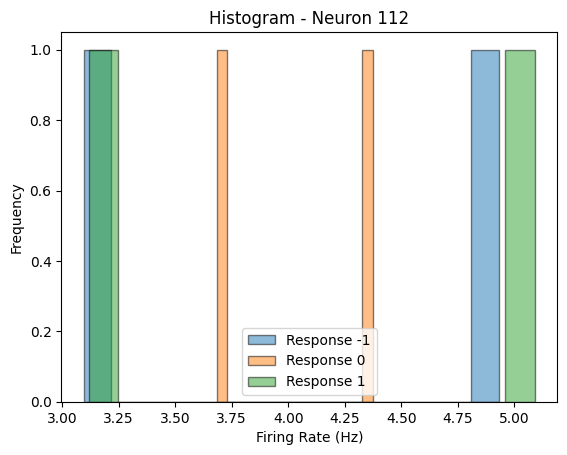

Neuron 113 Firing Rate Comparison:
Response Category -1: 4.97 Hz
Response Category 0: 4.49 Hz
Response Category 1: 3.92 Hz



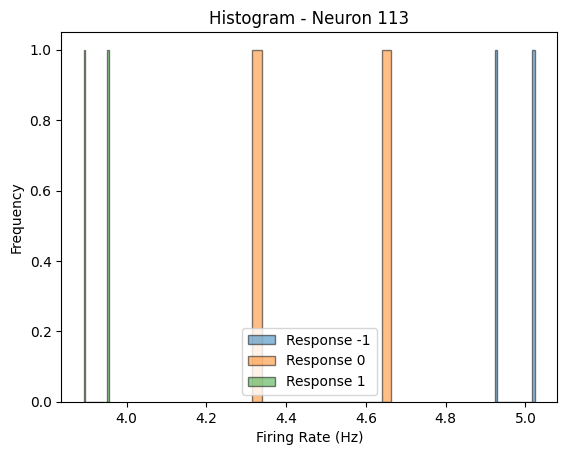

Neuron 114 Firing Rate Comparison:
Response Category -1: 4.30 Hz
Response Category 0: 3.49 Hz
Response Category 1: 4.08 Hz



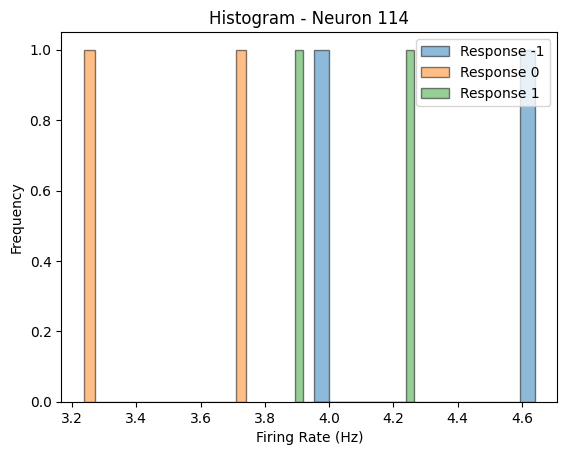

Neuron 115 Firing Rate Comparison:
Response Category -1: 4.60 Hz
Response Category 0: 3.92 Hz
Response Category 1: 4.42 Hz



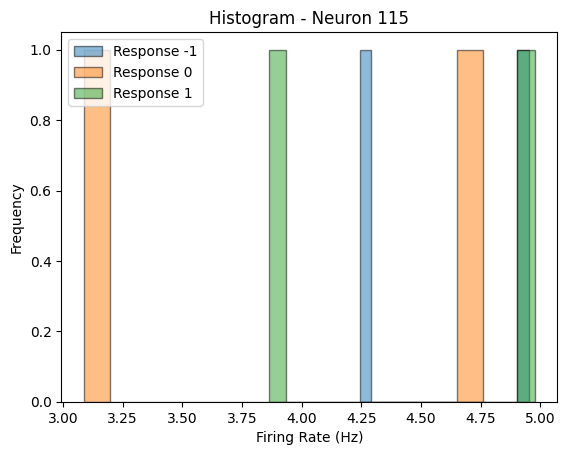

Neuron 116 Firing Rate Comparison:
Response Category -1: 4.56 Hz
Response Category 0: 4.73 Hz
Response Category 1: 4.56 Hz



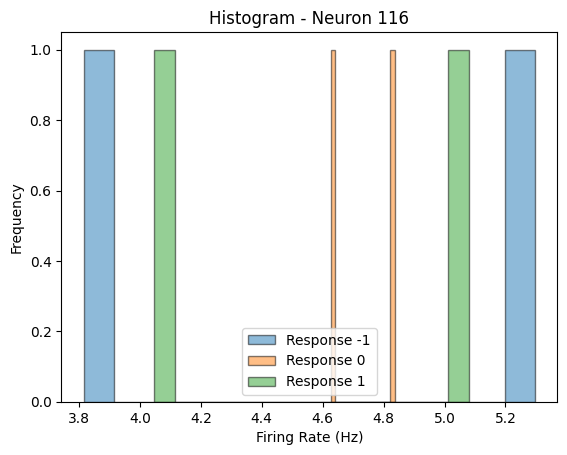

Neuron 117 Firing Rate Comparison:
Response Category -1: 3.78 Hz
Response Category 0: 3.67 Hz
Response Category 1: 4.19 Hz



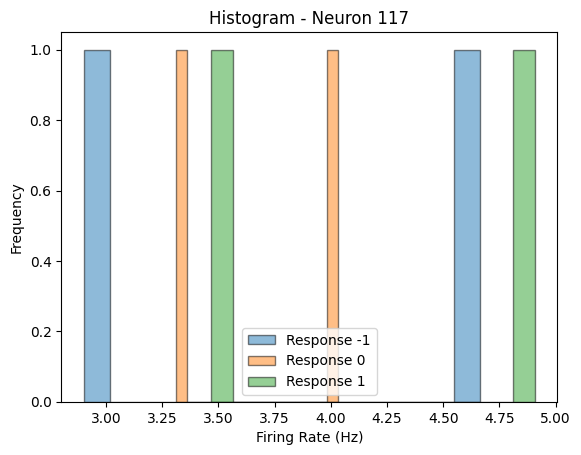

Neuron 118 Firing Rate Comparison:
Response Category -1: 3.92 Hz
Response Category 0: 3.95 Hz
Response Category 1: 4.29 Hz



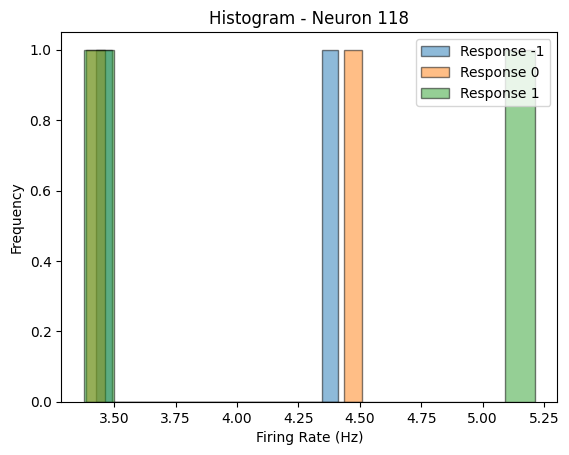

Neuron 119 Firing Rate Comparison:
Response Category -1: 4.52 Hz
Response Category 0: 4.28 Hz
Response Category 1: 3.89 Hz



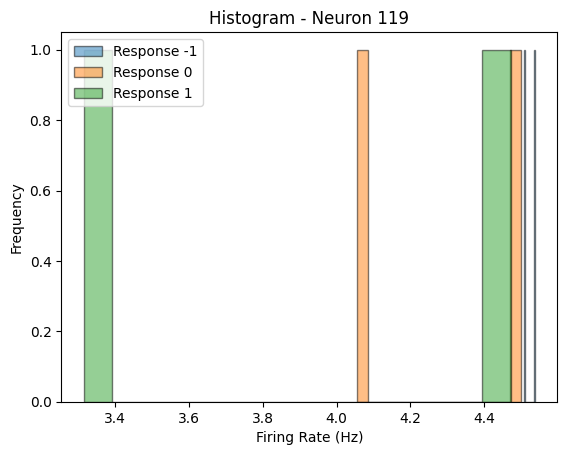

Neuron 120 Firing Rate Comparison:
Response Category -1: 4.57 Hz
Response Category 0: 4.30 Hz
Response Category 1: 4.72 Hz



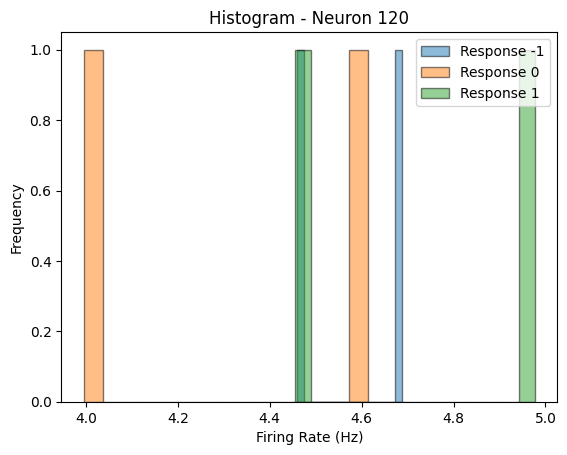

Neuron 121 Firing Rate Comparison:
Response Category -1: 4.53 Hz
Response Category 0: 3.95 Hz
Response Category 1: 4.06 Hz



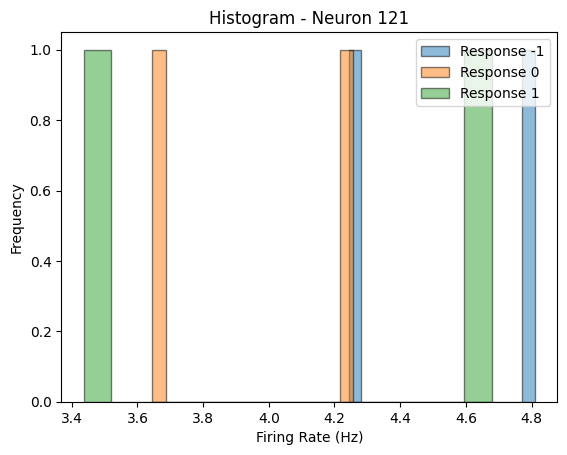

Neuron 122 Firing Rate Comparison:
Response Category -1: 4.34 Hz
Response Category 0: 4.83 Hz
Response Category 1: 4.09 Hz



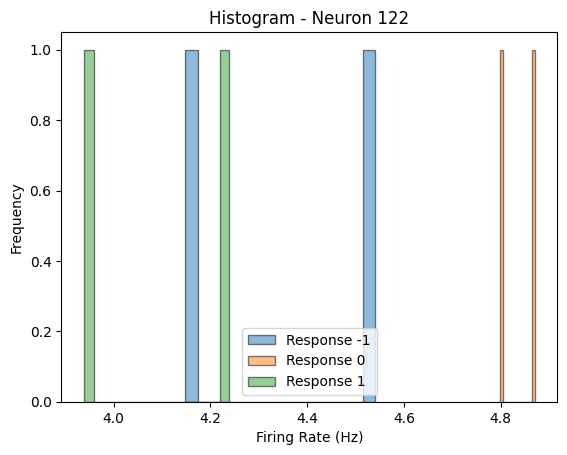

Neuron 123 Firing Rate Comparison:
Response Category -1: 4.08 Hz
Response Category 0: 3.93 Hz
Response Category 1: 4.65 Hz



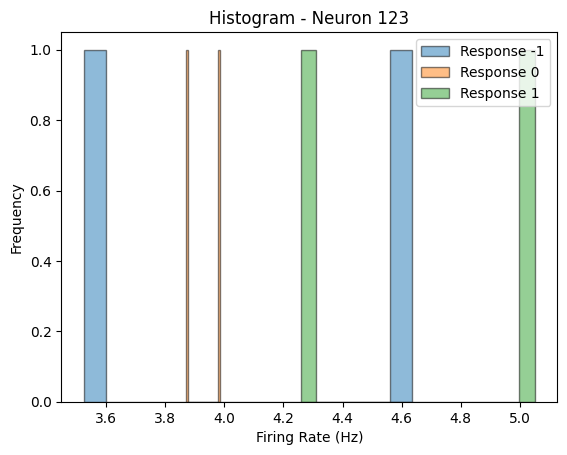

Neuron 124 Firing Rate Comparison:
Response Category -1: 4.02 Hz
Response Category 0: 3.79 Hz
Response Category 1: 4.36 Hz



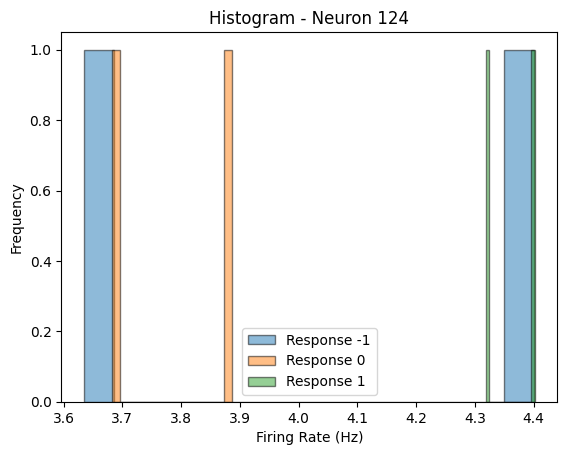

Neuron 125 Firing Rate Comparison:
Response Category -1: 4.42 Hz
Response Category 0: 3.92 Hz
Response Category 1: 4.13 Hz



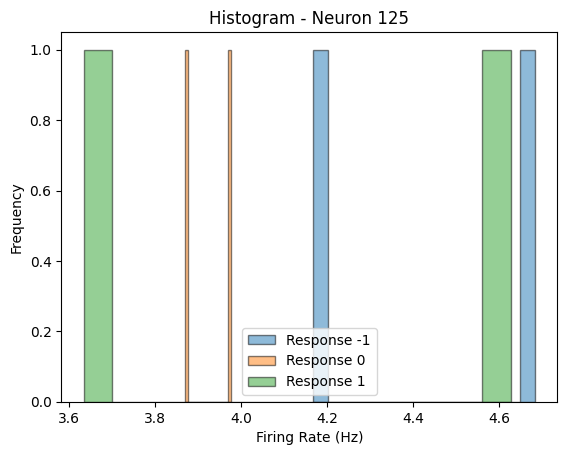

Neuron 126 Firing Rate Comparison:
Response Category -1: 4.10 Hz
Response Category 0: 4.56 Hz
Response Category 1: 4.64 Hz



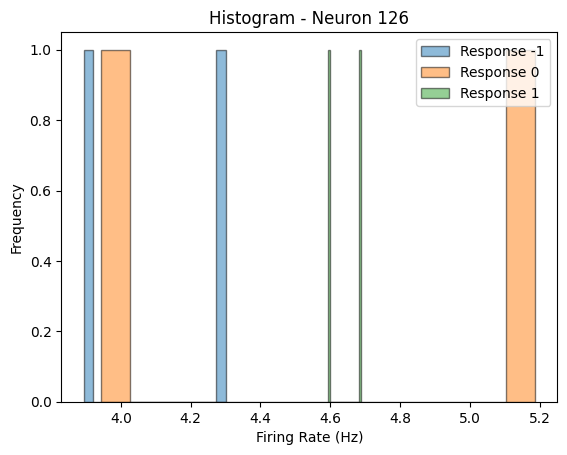

Neuron 127 Firing Rate Comparison:
Response Category -1: 4.61 Hz
Response Category 0: 4.66 Hz
Response Category 1: 3.90 Hz



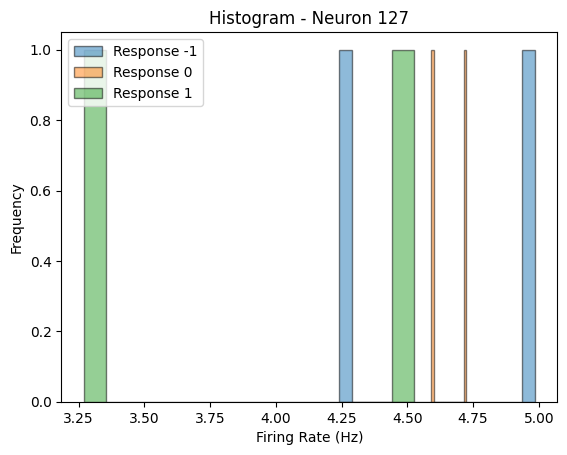

Neuron 128 Firing Rate Comparison:
Response Category -1: 4.00 Hz
Response Category 0: 4.97 Hz
Response Category 1: 4.28 Hz



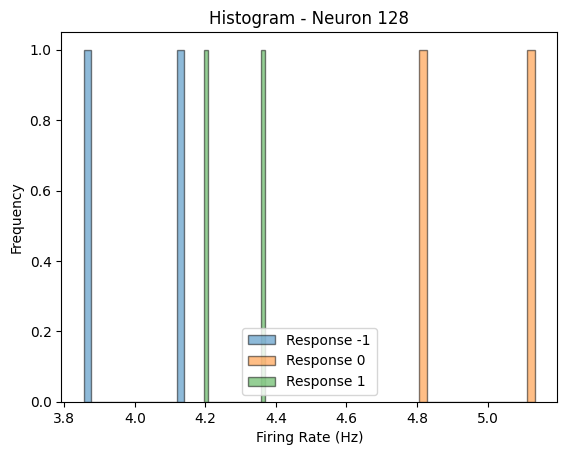

Neuron 129 Firing Rate Comparison:
Response Category -1: 4.22 Hz
Response Category 0: 4.39 Hz
Response Category 1: 4.89 Hz



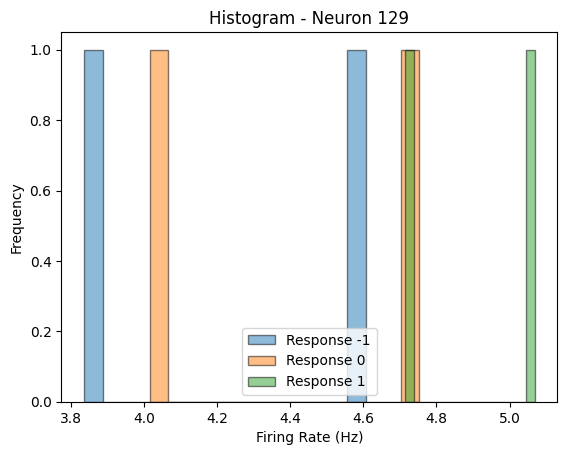

Neuron 130 Firing Rate Comparison:
Response Category -1: 4.14 Hz
Response Category 0: 3.70 Hz
Response Category 1: 4.16 Hz



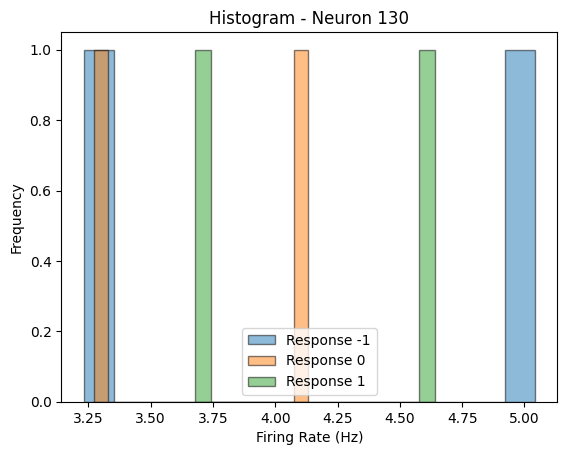

Neuron 131 Firing Rate Comparison:
Response Category -1: 4.28 Hz
Response Category 0: 3.97 Hz
Response Category 1: 4.02 Hz



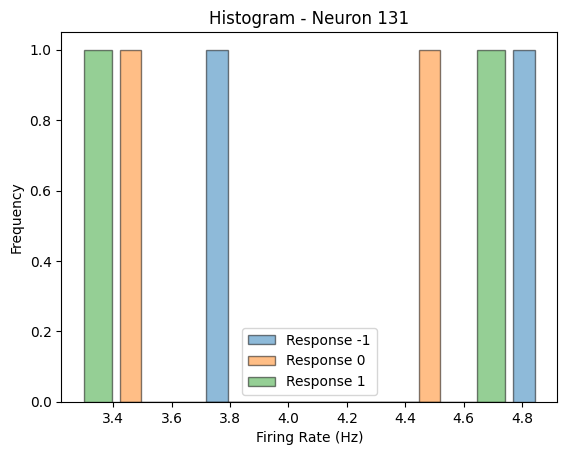

Neuron 132 Firing Rate Comparison:
Response Category -1: 4.10 Hz
Response Category 0: 3.96 Hz
Response Category 1: 4.08 Hz



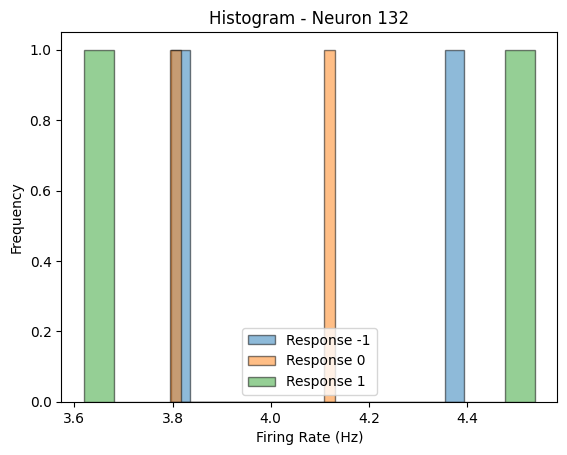

Neuron 133 Firing Rate Comparison:
Response Category -1: 4.38 Hz
Response Category 0: 3.96 Hz
Response Category 1: 3.67 Hz



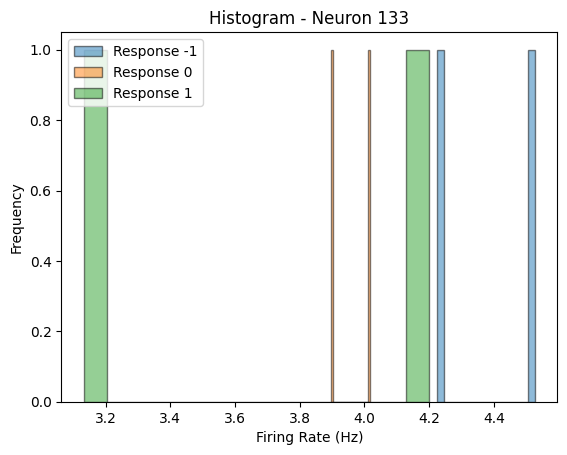

Neuron 134 Firing Rate Comparison:
Response Category -1: 3.95 Hz
Response Category 0: 3.31 Hz
Response Category 1: 3.77 Hz



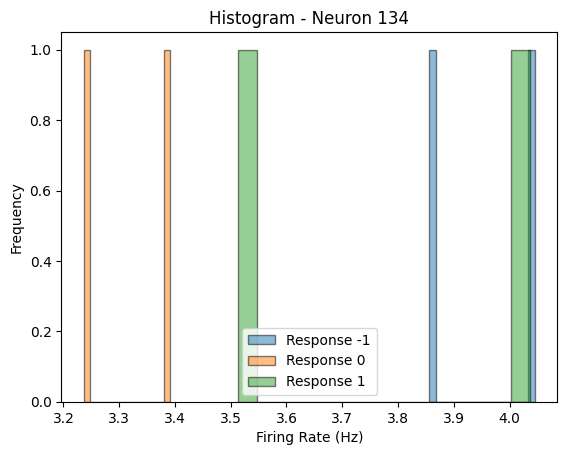

Neuron 135 Firing Rate Comparison:
Response Category -1: 4.42 Hz
Response Category 0: 3.74 Hz
Response Category 1: 4.61 Hz



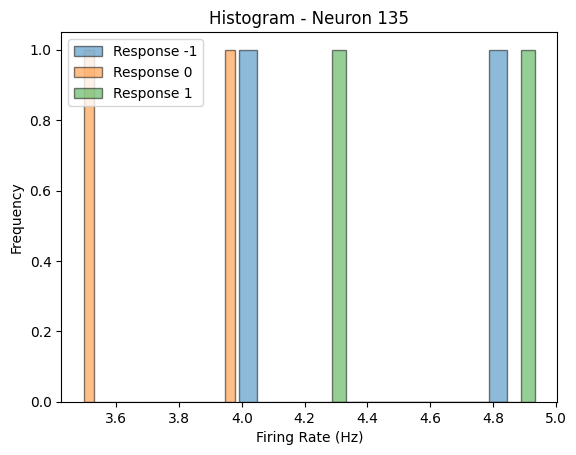

Neuron 136 Firing Rate Comparison:
Response Category -1: 4.15 Hz
Response Category 0: 3.40 Hz
Response Category 1: 3.93 Hz



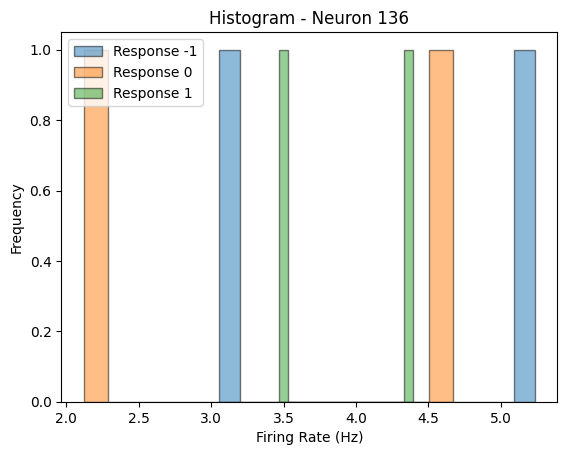

Neuron 137 Firing Rate Comparison:
Response Category -1: 4.18 Hz
Response Category 0: 3.41 Hz
Response Category 1: 3.88 Hz



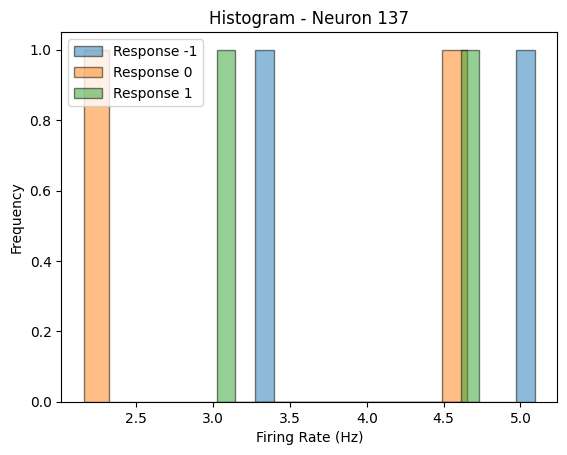

Neuron 138 Firing Rate Comparison:
Response Category -1: 4.29 Hz
Response Category 0: 3.87 Hz
Response Category 1: 4.20 Hz



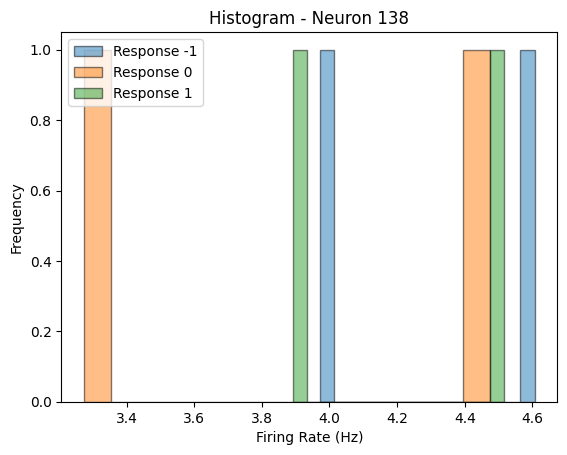

Neuron 139 Firing Rate Comparison:
Response Category -1: 4.38 Hz
Response Category 0: 3.45 Hz
Response Category 1: 3.92 Hz



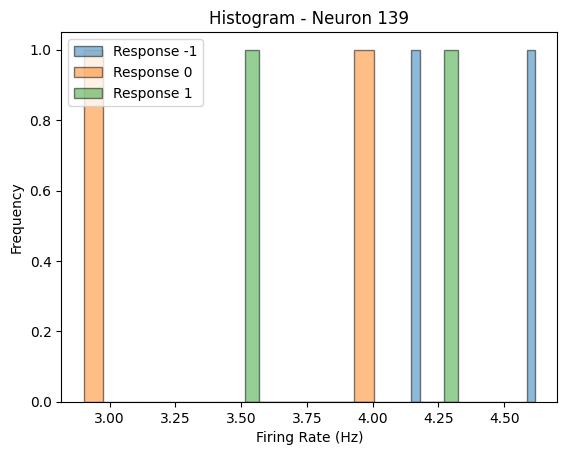

Neuron 140 Firing Rate Comparison:
Response Category -1: 4.32 Hz
Response Category 0: 3.65 Hz
Response Category 1: 4.24 Hz



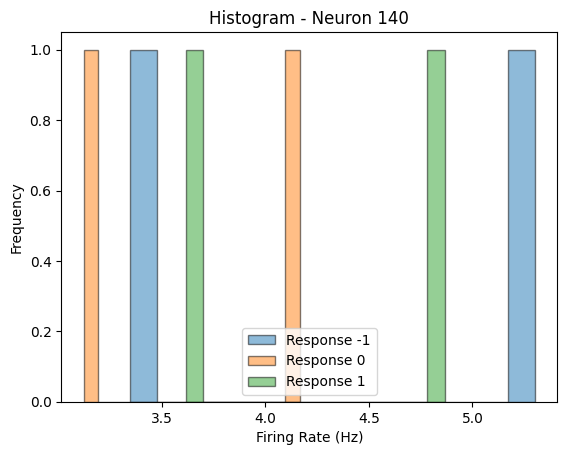

Neuron 141 Firing Rate Comparison:
Response Category -1: 3.85 Hz
Response Category 0: 3.00 Hz
Response Category 1: 3.81 Hz



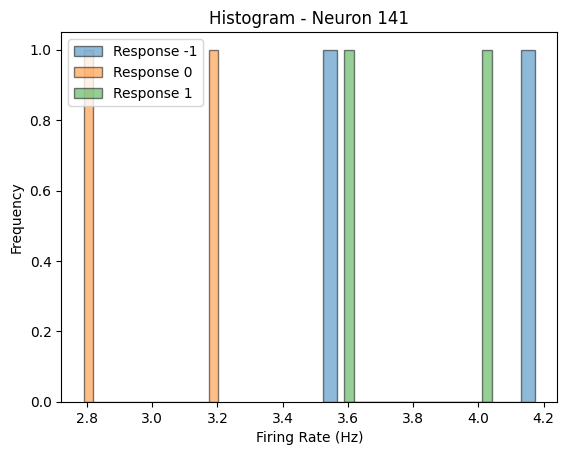

Neuron 142 Firing Rate Comparison:
Response Category -1: 3.79 Hz
Response Category 0: 3.26 Hz
Response Category 1: 4.75 Hz



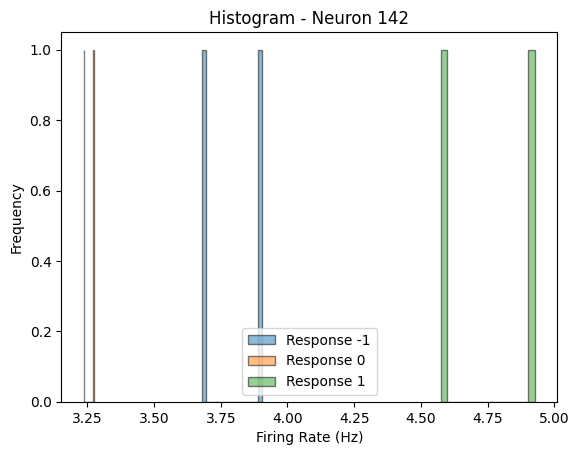

Neuron 143 Firing Rate Comparison:
Response Category -1: 4.18 Hz
Response Category 0: 3.66 Hz
Response Category 1: 3.86 Hz



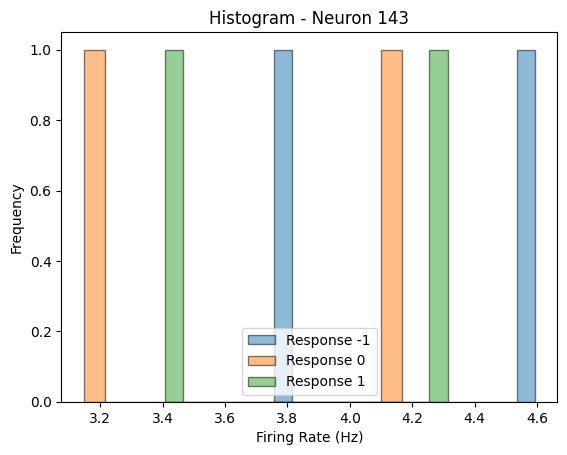

Neuron 144 Firing Rate Comparison:
Response Category -1: 4.06 Hz
Response Category 0: 2.90 Hz
Response Category 1: 4.04 Hz



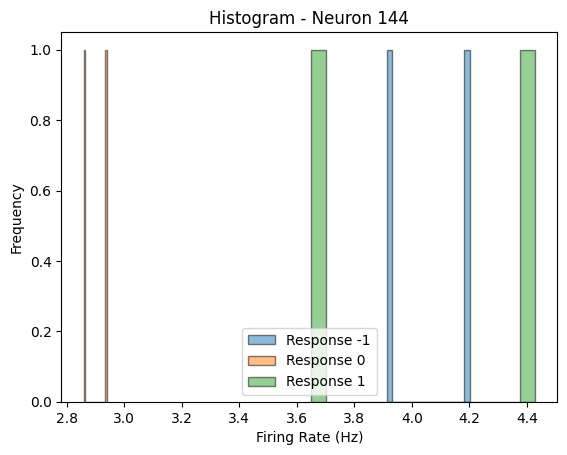

Neuron 145 Firing Rate Comparison:
Response Category -1: 5.56 Hz
Response Category 0: 4.24 Hz
Response Category 1: 4.45 Hz



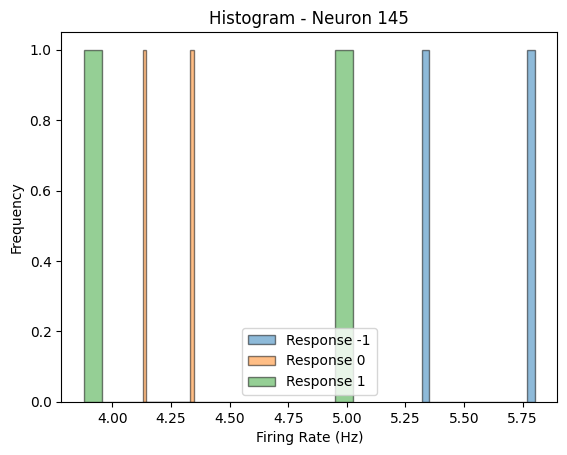

Neuron 146 Firing Rate Comparison:
Response Category -1: 4.66 Hz
Response Category 0: 3.63 Hz
Response Category 1: 4.42 Hz



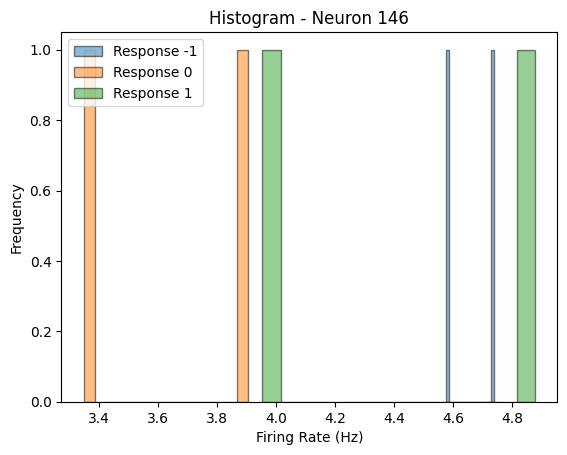

Neuron 147 Firing Rate Comparison:
Response Category -1: 4.28 Hz
Response Category 0: 3.63 Hz
Response Category 1: 4.19 Hz



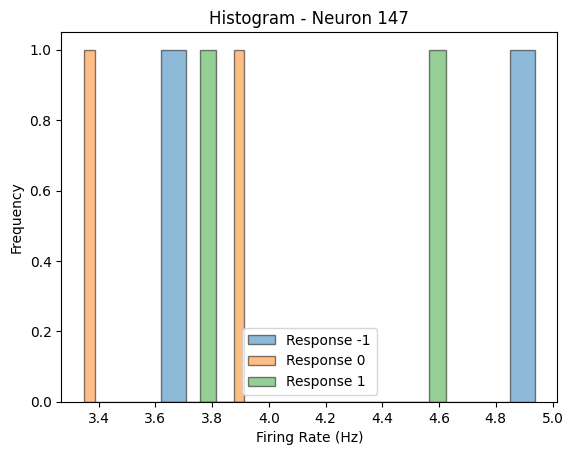

Neuron 148 Firing Rate Comparison:
Response Category -1: 4.88 Hz
Response Category 0: 3.79 Hz
Response Category 1: 4.77 Hz



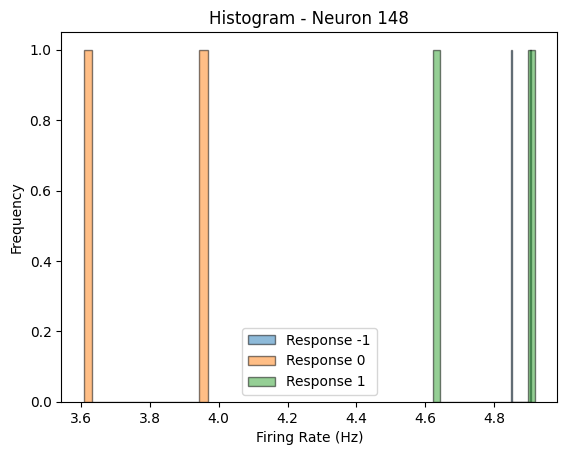

Neuron 149 Firing Rate Comparison:
Response Category -1: 4.67 Hz
Response Category 0: 3.59 Hz
Response Category 1: 4.57 Hz



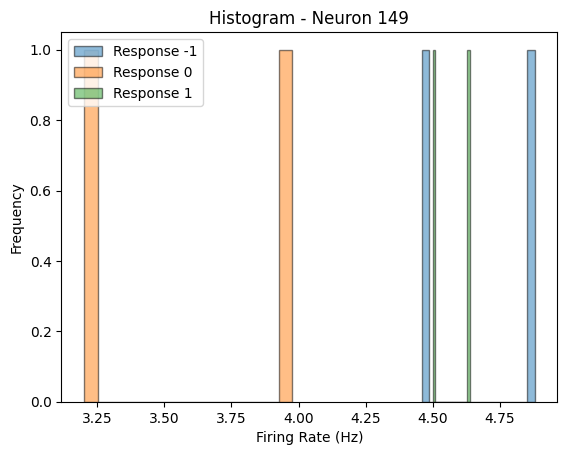

Neuron 150 Firing Rate Comparison:
Response Category -1: 4.47 Hz
Response Category 0: 3.66 Hz
Response Category 1: 4.45 Hz



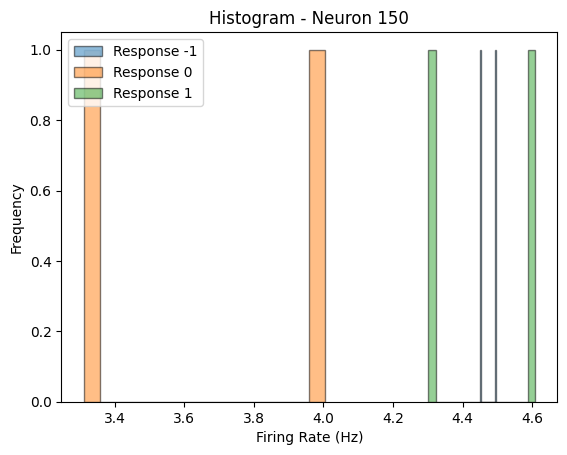

Neuron 151 Firing Rate Comparison:
Response Category -1: 5.56 Hz
Response Category 0: 4.50 Hz
Response Category 1: 5.01 Hz



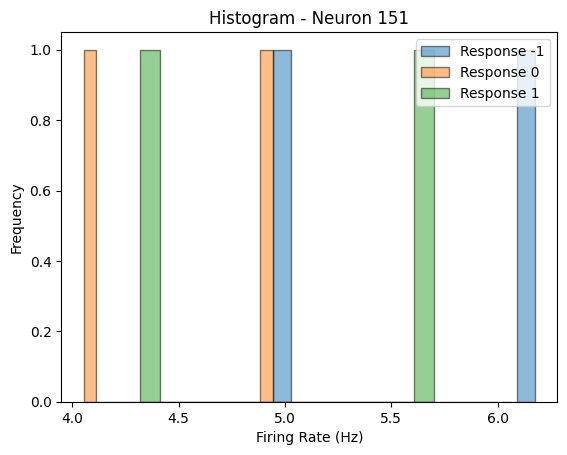

Neuron 152 Firing Rate Comparison:
Response Category -1: 4.70 Hz
Response Category 0: 3.79 Hz
Response Category 1: 4.61 Hz



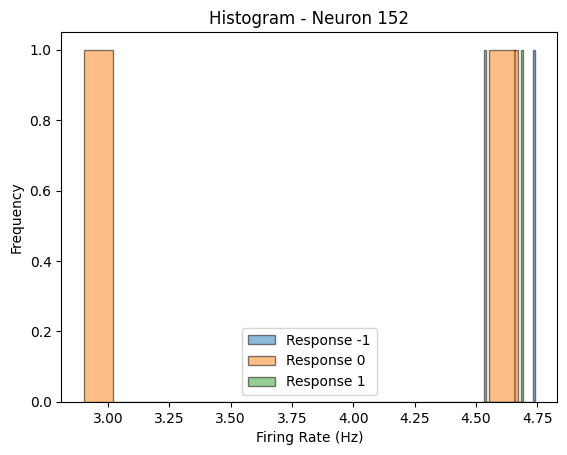

Neuron 153 Firing Rate Comparison:
Response Category -1: 4.29 Hz
Response Category 0: 4.11 Hz
Response Category 1: 4.28 Hz



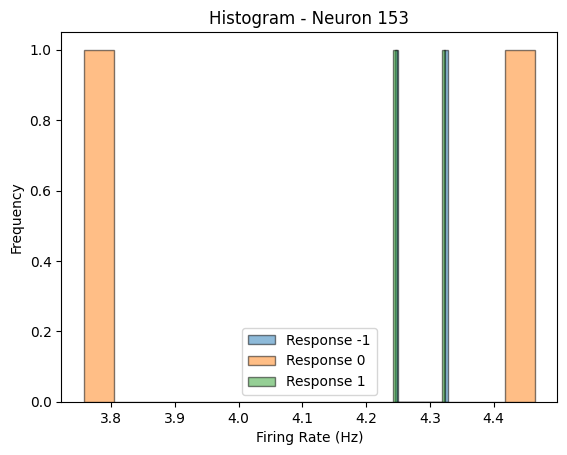

Neuron 154 Firing Rate Comparison:
Response Category -1: 4.46 Hz
Response Category 0: 4.41 Hz
Response Category 1: 4.08 Hz



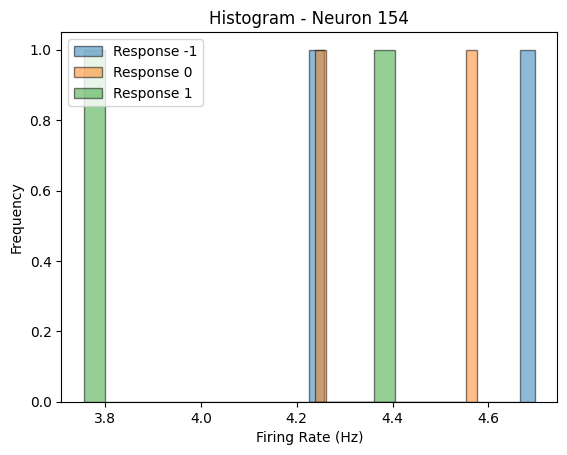

Neuron 155 Firing Rate Comparison:
Response Category -1: 4.40 Hz
Response Category 0: 3.75 Hz
Response Category 1: 4.44 Hz



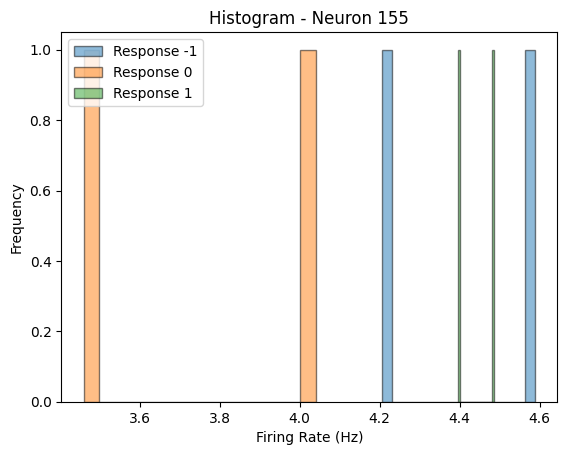

Neuron 156 Firing Rate Comparison:
Response Category -1: 4.83 Hz
Response Category 0: 4.29 Hz
Response Category 1: 4.19 Hz



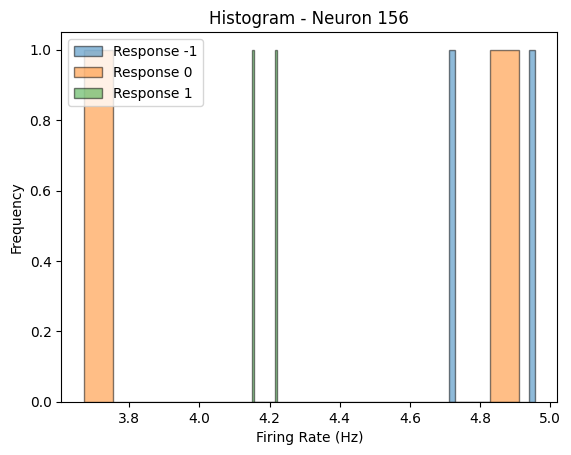

Neuron 157 Firing Rate Comparison:
Response Category -1: 4.47 Hz
Response Category 0: 3.13 Hz
Response Category 1: 4.27 Hz



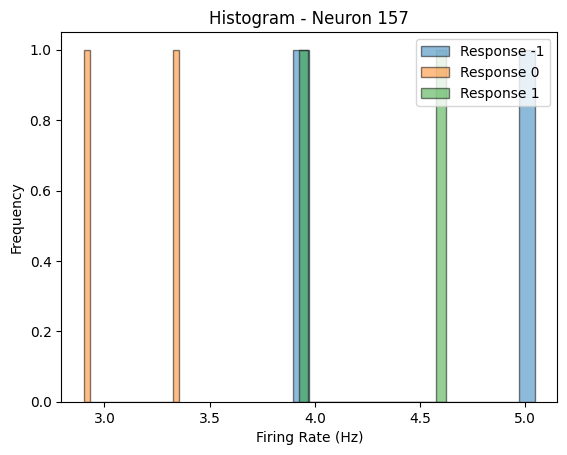

Neuron 158 Firing Rate Comparison:
Response Category -1: 5.09 Hz
Response Category 0: 4.60 Hz
Response Category 1: 4.20 Hz



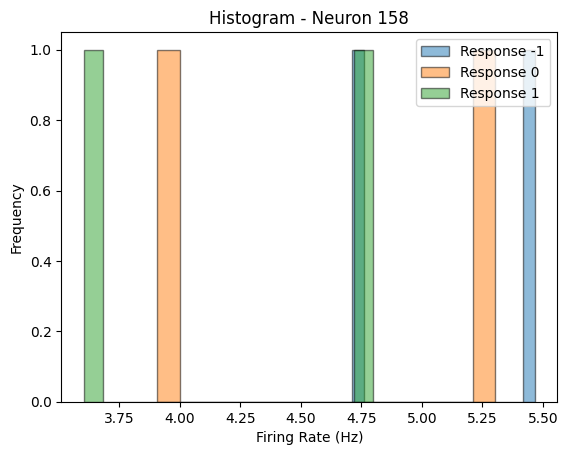

Neuron 159 Firing Rate Comparison:
Response Category -1: 4.52 Hz
Response Category 0: 3.58 Hz
Response Category 1: 4.25 Hz



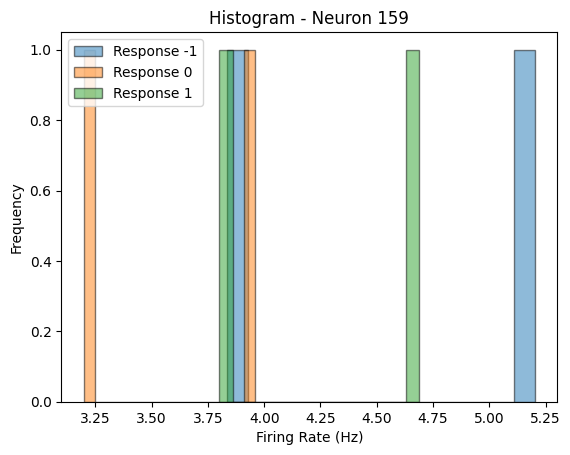

Neuron 160 Firing Rate Comparison:
Response Category -1: 4.80 Hz
Response Category 0: 3.82 Hz
Response Category 1: 4.64 Hz



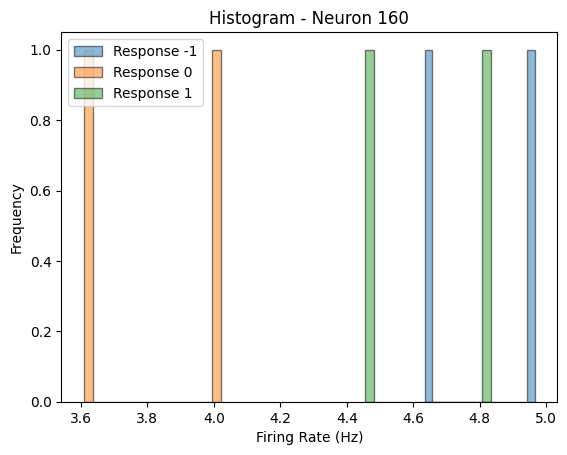

Neuron 161 Firing Rate Comparison:
Response Category -1: 4.12 Hz
Response Category 0: 3.63 Hz
Response Category 1: 4.12 Hz



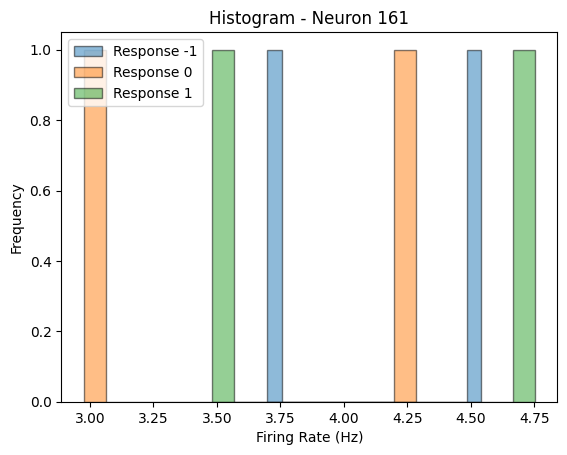

Neuron 162 Firing Rate Comparison:
Response Category -1: 5.09 Hz
Response Category 0: 3.91 Hz
Response Category 1: 4.28 Hz



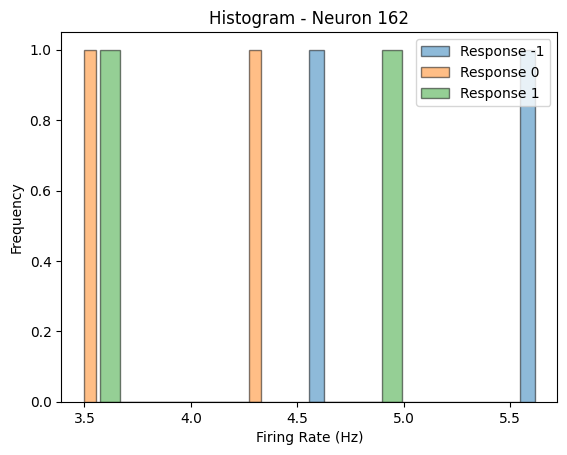

Neuron 163 Firing Rate Comparison:
Response Category -1: 4.76 Hz
Response Category 0: 4.11 Hz
Response Category 1: 4.21 Hz



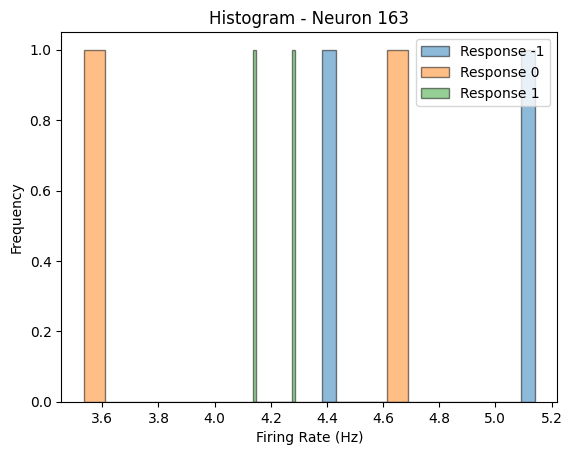

Neuron 164 Firing Rate Comparison:
Response Category -1: 5.31 Hz
Response Category 0: 3.93 Hz
Response Category 1: 4.54 Hz



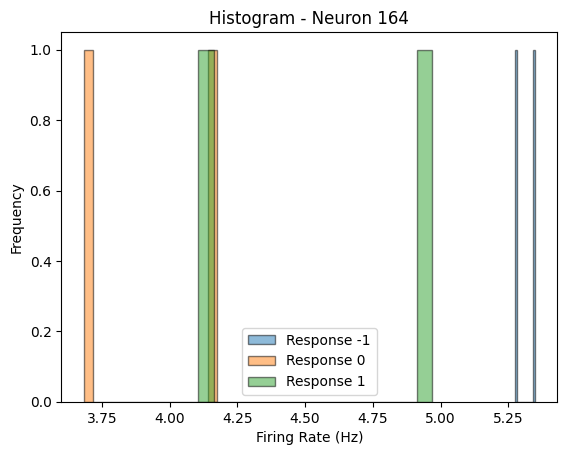

Neuron 165 Firing Rate Comparison:
Response Category -1: 5.21 Hz
Response Category 0: 4.26 Hz
Response Category 1: 4.36 Hz



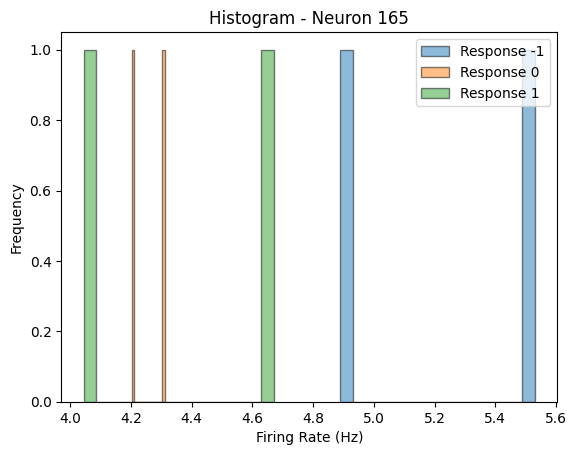

Neuron 166 Firing Rate Comparison:
Response Category -1: 4.74 Hz
Response Category 0: 3.93 Hz
Response Category 1: 4.30 Hz



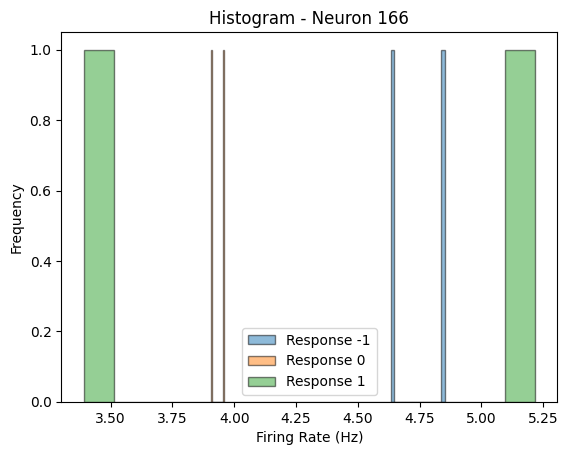

Neuron 167 Firing Rate Comparison:
Response Category -1: 4.37 Hz
Response Category 0: 3.45 Hz
Response Category 1: 4.18 Hz



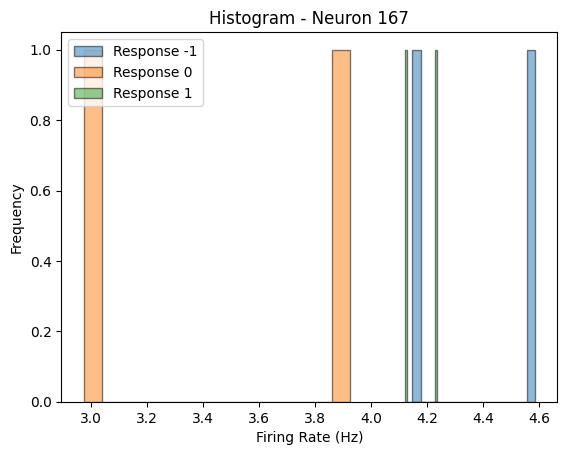

Neuron 168 Firing Rate Comparison:
Response Category -1: 4.04 Hz
Response Category 0: 3.99 Hz
Response Category 1: 4.07 Hz



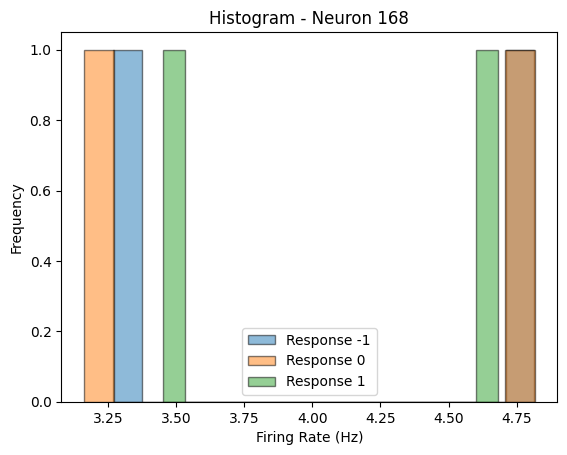

Neuron 169 Firing Rate Comparison:
Response Category -1: 4.32 Hz
Response Category 0: 4.45 Hz
Response Category 1: 3.71 Hz



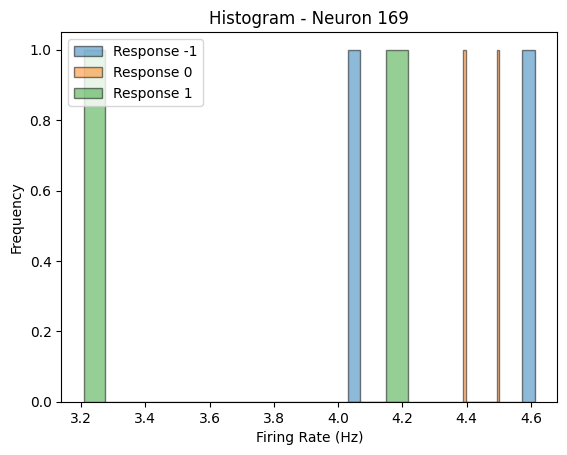

Neuron 170 Firing Rate Comparison:
Response Category -1: 4.53 Hz
Response Category 0: 3.99 Hz
Response Category 1: 4.29 Hz



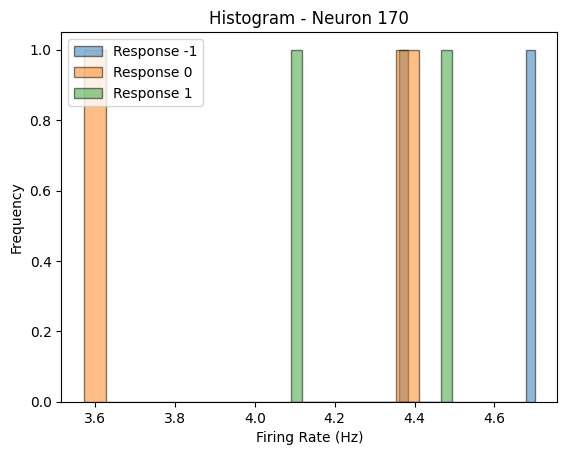

Neuron 171 Firing Rate Comparison:
Response Category -1: 4.18 Hz
Response Category 0: 4.26 Hz
Response Category 1: 3.74 Hz



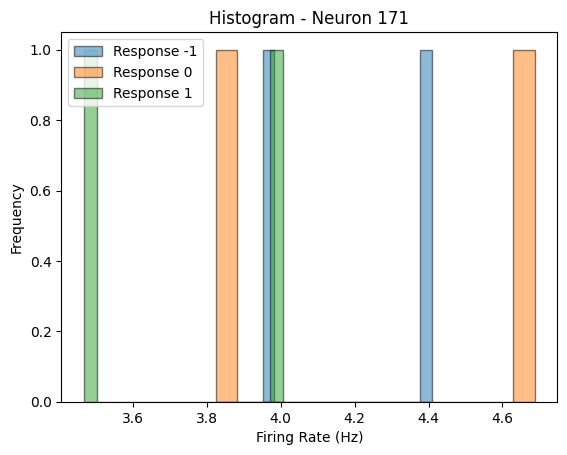

Neuron 172 Firing Rate Comparison:
Response Category -1: 3.72 Hz
Response Category 0: 3.33 Hz
Response Category 1: 4.04 Hz



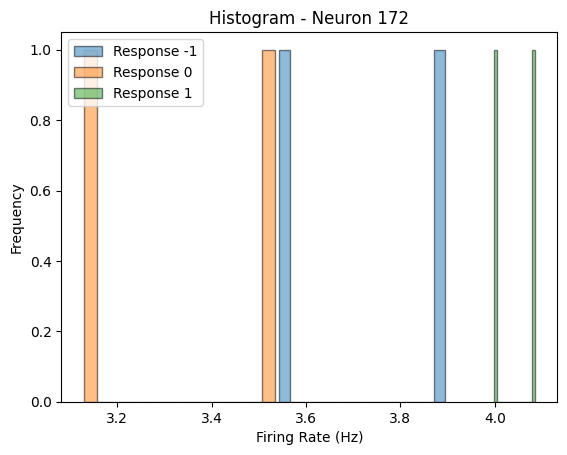

Neuron 173 Firing Rate Comparison:
Response Category -1: 4.22 Hz
Response Category 0: 3.81 Hz
Response Category 1: 4.31 Hz



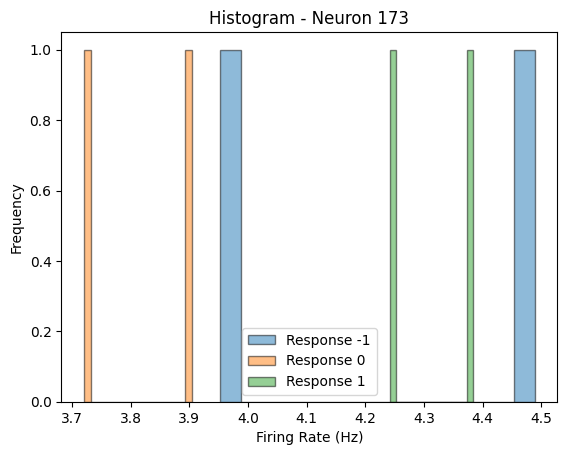

Neuron 174 Firing Rate Comparison:
Response Category -1: 4.80 Hz
Response Category 0: 4.37 Hz
Response Category 1: 4.01 Hz



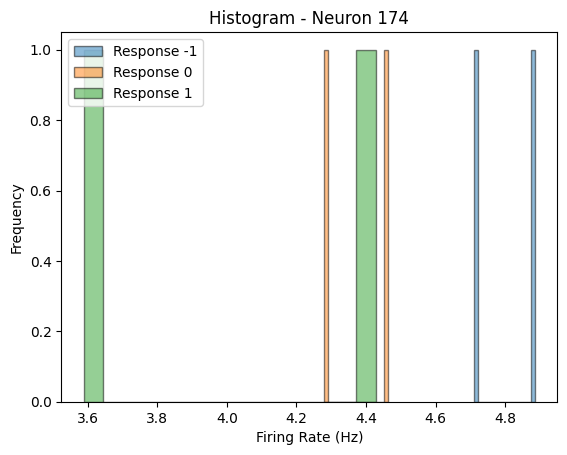

Neuron 175 Firing Rate Comparison:
Response Category -1: 4.49 Hz
Response Category 0: 3.74 Hz
Response Category 1: 3.60 Hz



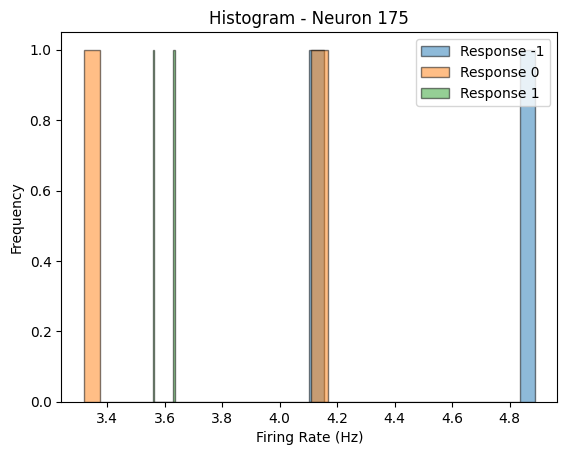

Neuron 176 Firing Rate Comparison:
Response Category -1: 3.53 Hz
Response Category 0: 2.88 Hz
Response Category 1: 4.06 Hz



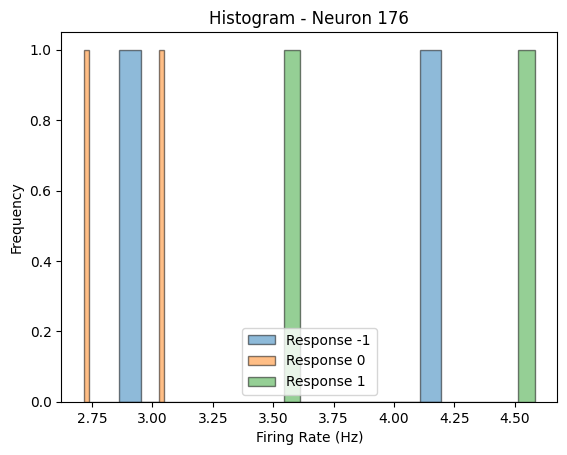

Neuron 177 Firing Rate Comparison:
Response Category -1: 4.67 Hz
Response Category 0: 3.59 Hz
Response Category 1: 4.12 Hz



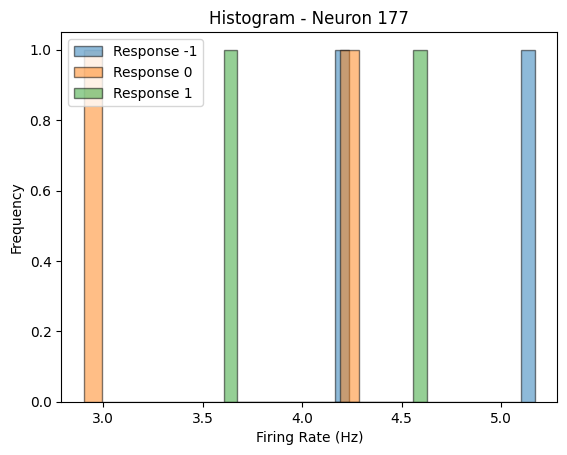

Neuron 178 Firing Rate Comparison:
Response Category -1: 4.56 Hz
Response Category 0: 4.33 Hz
Response Category 1: 4.60 Hz



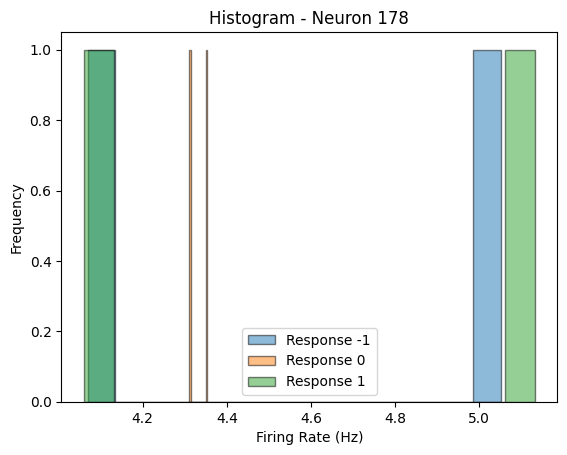

Neuron 179 Firing Rate Comparison:
Response Category -1: 4.95 Hz
Response Category 0: 4.18 Hz
Response Category 1: 3.99 Hz



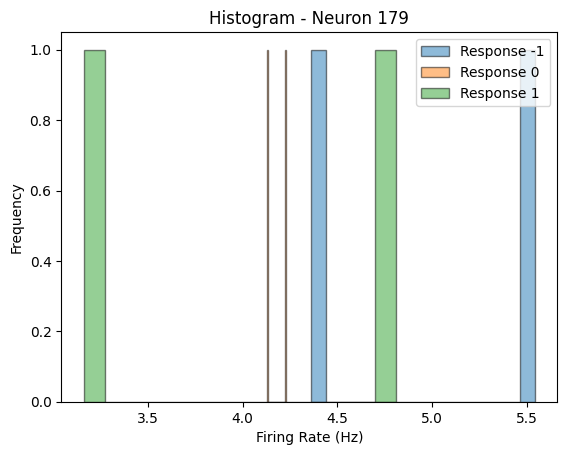

Neuron 180 Firing Rate Comparison:
Response Category -1: 4.57 Hz
Response Category 0: 3.84 Hz
Response Category 1: 4.58 Hz



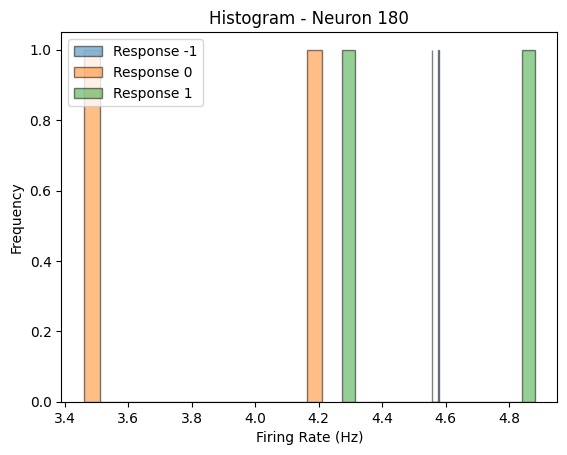

Neuron 181 Firing Rate Comparison:
Response Category -1: 3.96 Hz
Response Category 0: 3.86 Hz
Response Category 1: 4.26 Hz



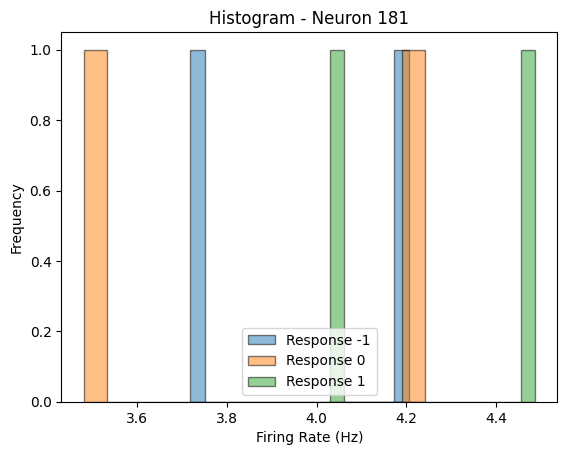

Neuron 182 Firing Rate Comparison:
Response Category -1: 3.99 Hz
Response Category 0: 4.00 Hz
Response Category 1: 4.30 Hz



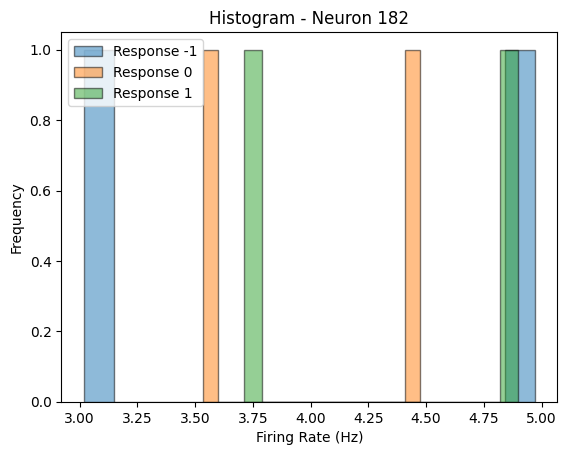

Neuron 183 Firing Rate Comparison:
Response Category -1: 4.91 Hz
Response Category 0: 4.56 Hz
Response Category 1: 4.53 Hz



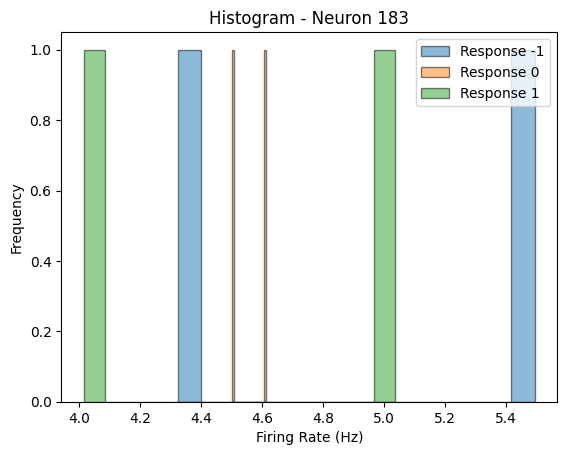

Neuron 184 Firing Rate Comparison:
Response Category -1: 4.30 Hz
Response Category 0: 3.96 Hz
Response Category 1: 4.35 Hz



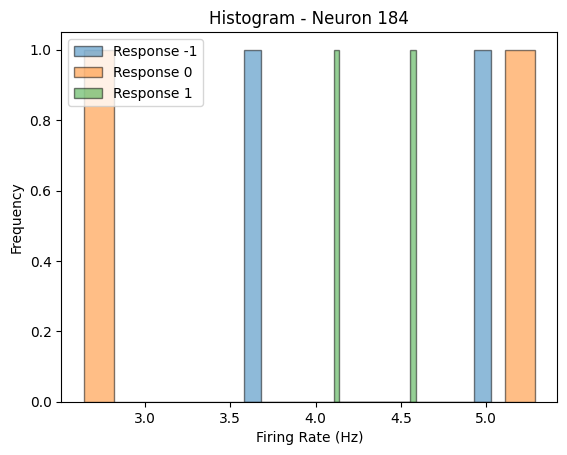

Neuron 185 Firing Rate Comparison:
Response Category -1: 4.05 Hz
Response Category 0: 4.15 Hz
Response Category 1: 4.27 Hz



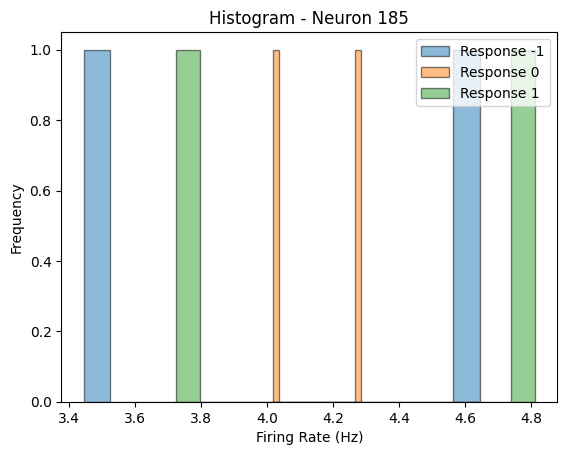

Neuron 186 Firing Rate Comparison:
Response Category -1: 4.34 Hz
Response Category 0: 3.51 Hz
Response Category 1: 4.02 Hz



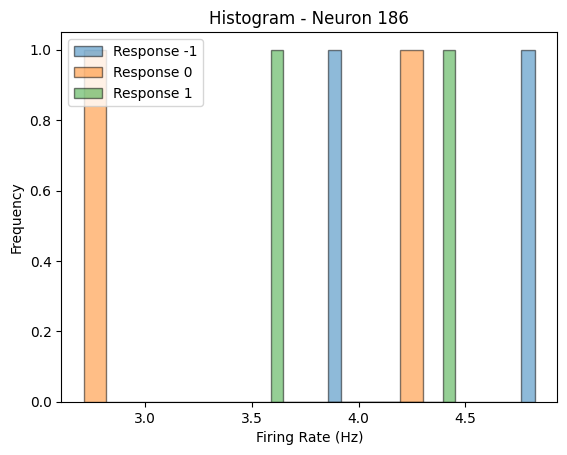

Neuron 187 Firing Rate Comparison:
Response Category -1: 4.35 Hz
Response Category 0: 3.69 Hz
Response Category 1: 3.61 Hz



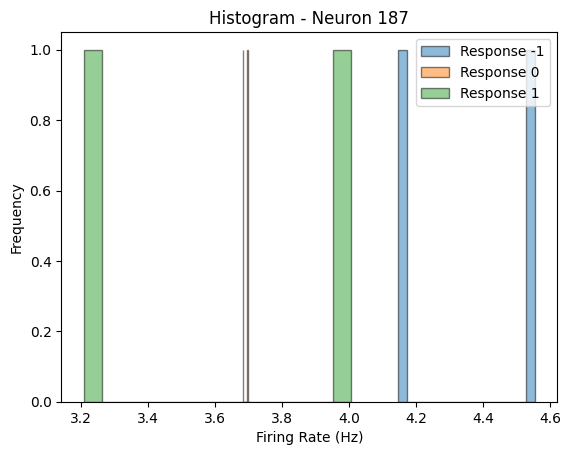

Neuron 188 Firing Rate Comparison:
Response Category -1: 4.15 Hz
Response Category 0: 4.67 Hz
Response Category 1: 3.49 Hz



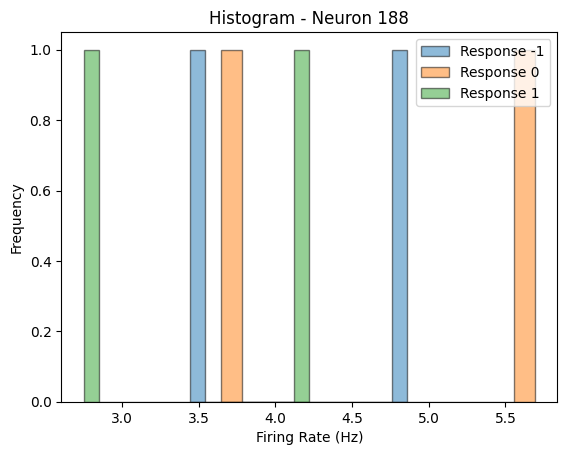

Neuron 189 Firing Rate Comparison:
Response Category -1: 4.14 Hz
Response Category 0: 3.83 Hz
Response Category 1: 3.71 Hz



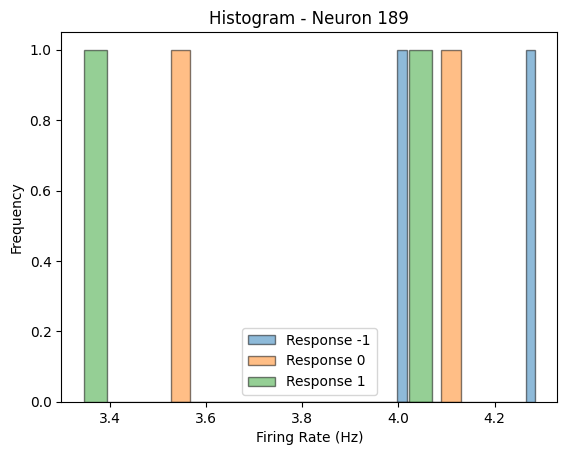

Neuron 190 Firing Rate Comparison:
Response Category -1: 4.27 Hz
Response Category 0: 3.41 Hz
Response Category 1: 4.14 Hz



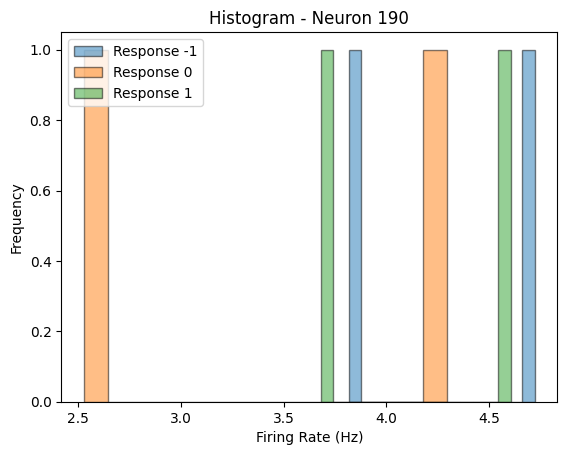

Neuron 191 Firing Rate Comparison:
Response Category -1: 3.57 Hz
Response Category 0: 2.81 Hz
Response Category 1: 4.03 Hz



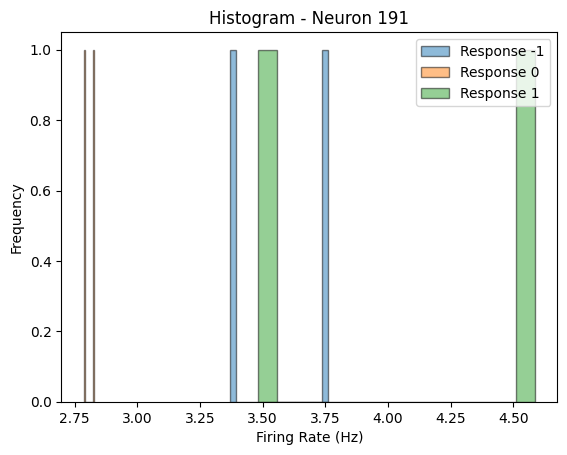

Neuron 192 Firing Rate Comparison:
Response Category -1: 4.55 Hz
Response Category 0: 3.28 Hz
Response Category 1: 4.57 Hz



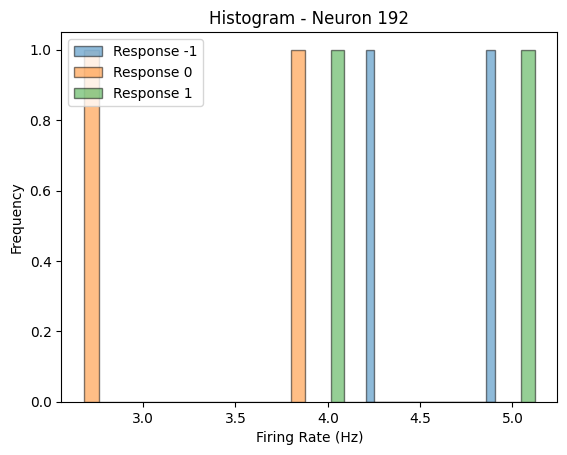

Neuron 193 Firing Rate Comparison:
Response Category -1: 4.56 Hz
Response Category 0: 3.82 Hz
Response Category 1: 4.60 Hz



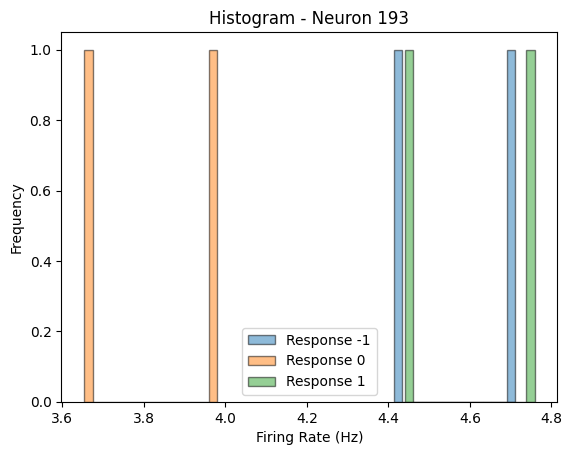

Neuron 194 Firing Rate Comparison:
Response Category -1: 4.37 Hz
Response Category 0: 4.21 Hz
Response Category 1: 4.14 Hz



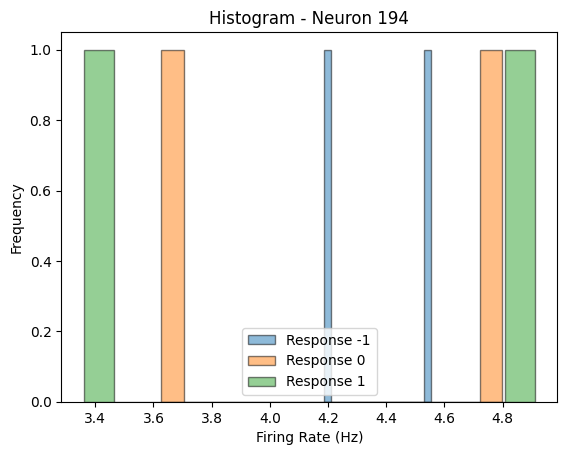

Neuron 195 Firing Rate Comparison:
Response Category -1: 4.80 Hz
Response Category 0: 3.83 Hz
Response Category 1: 4.89 Hz



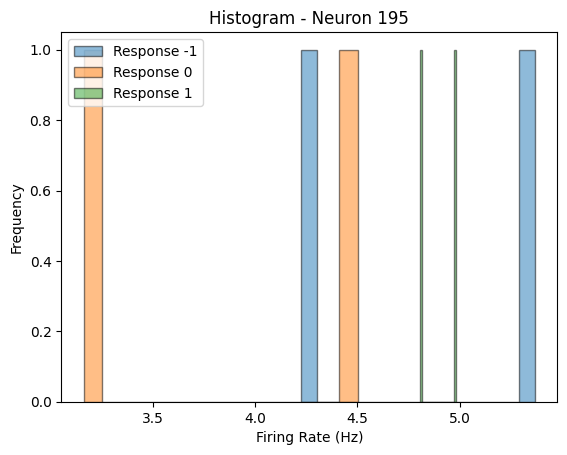

Neuron 196 Firing Rate Comparison:
Response Category -1: 4.80 Hz
Response Category 0: 3.71 Hz
Response Category 1: 4.27 Hz



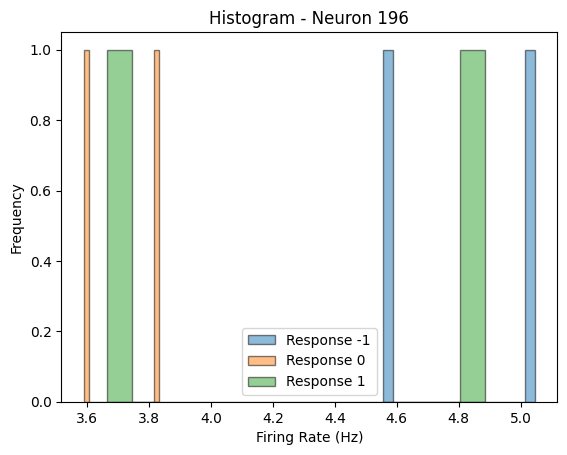

Neuron 197 Firing Rate Comparison:
Response Category -1: 3.94 Hz
Response Category 0: 3.18 Hz
Response Category 1: 3.97 Hz



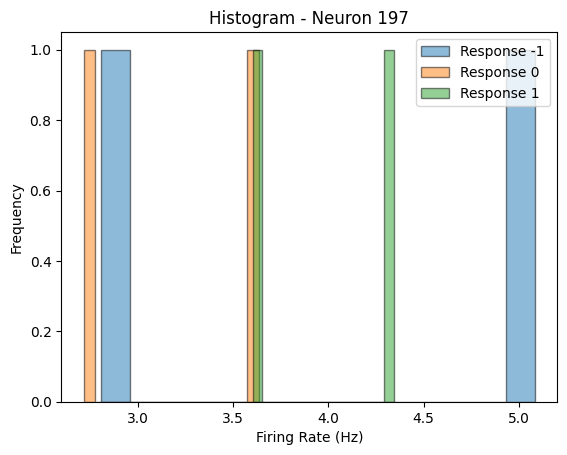

Neuron 198 Firing Rate Comparison:
Response Category -1: 4.81 Hz
Response Category 0: 3.35 Hz
Response Category 1: 4.13 Hz



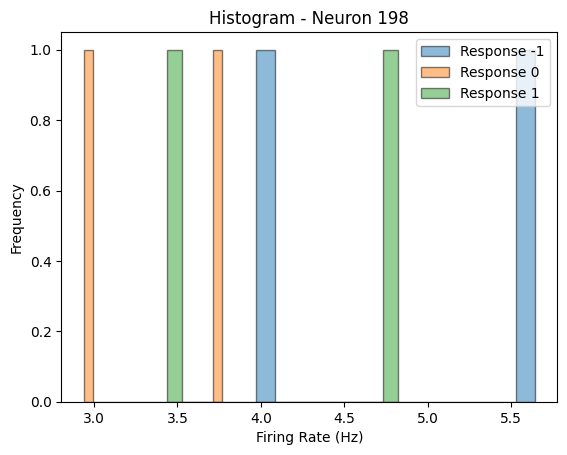

Neuron 199 Firing Rate Comparison:
Response Category -1: 4.93 Hz
Response Category 0: 3.52 Hz
Response Category 1: 4.15 Hz



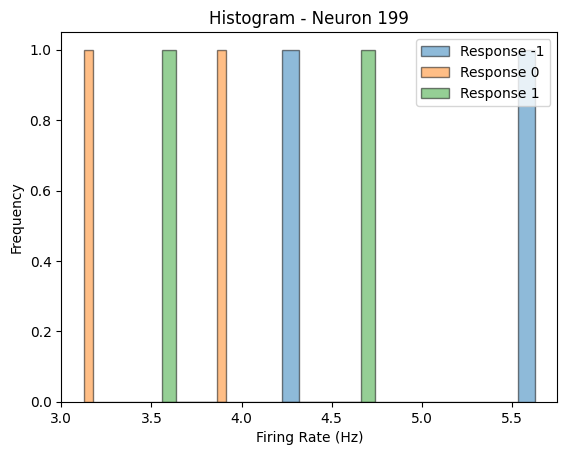

Neuron 200 Firing Rate Comparison:
Response Category -1: 4.98 Hz
Response Category 0: 3.67 Hz
Response Category 1: 5.01 Hz



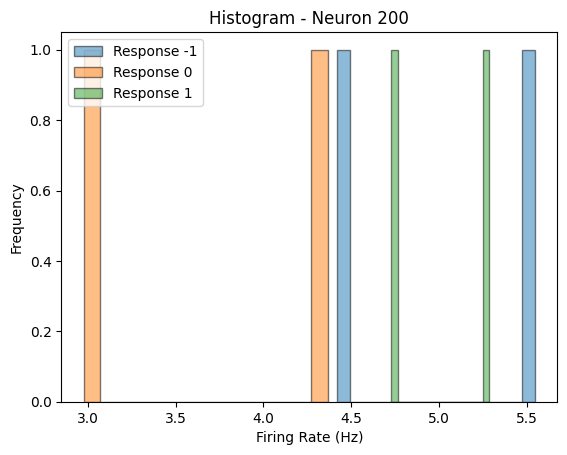

Neuron 201 Firing Rate Comparison:
Response Category -1: 5.08 Hz
Response Category 0: 7.82 Hz
Response Category 1: 4.44 Hz



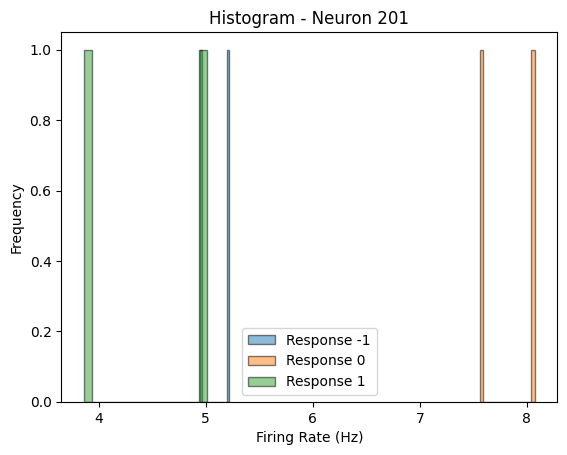

Neuron 202 Firing Rate Comparison:
Response Category -1: 4.60 Hz
Response Category 0: 6.30 Hz
Response Category 1: 3.75 Hz



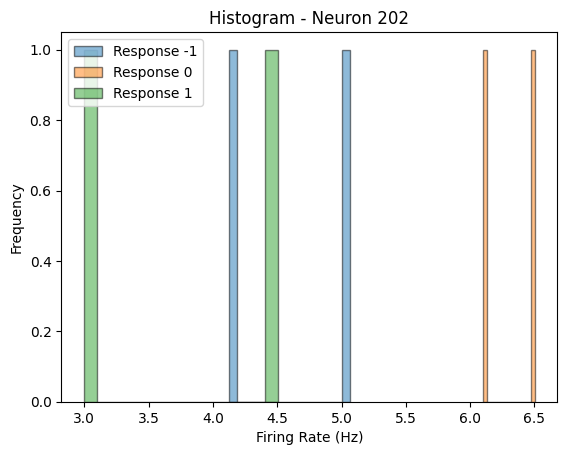

Neuron 203 Firing Rate Comparison:
Response Category -1: 4.91 Hz
Response Category 0: 5.88 Hz
Response Category 1: 4.96 Hz



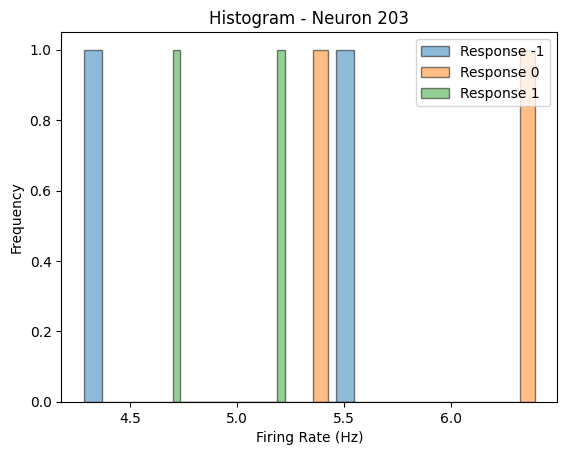

Neuron 204 Firing Rate Comparison:
Response Category -1: 4.08 Hz
Response Category 0: 5.19 Hz
Response Category 1: 4.32 Hz



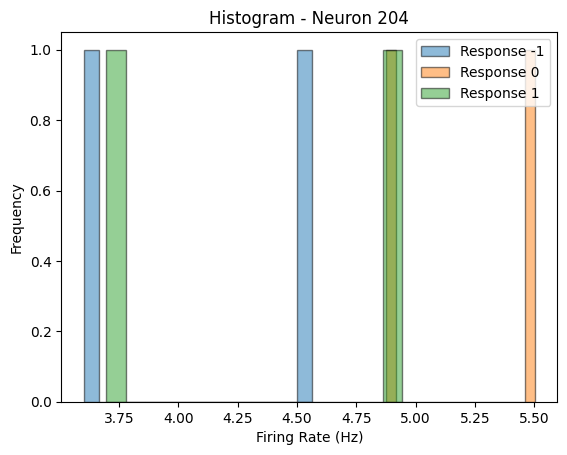

Neuron 205 Firing Rate Comparison:
Response Category -1: 5.08 Hz
Response Category 0: 5.76 Hz
Response Category 1: 4.38 Hz



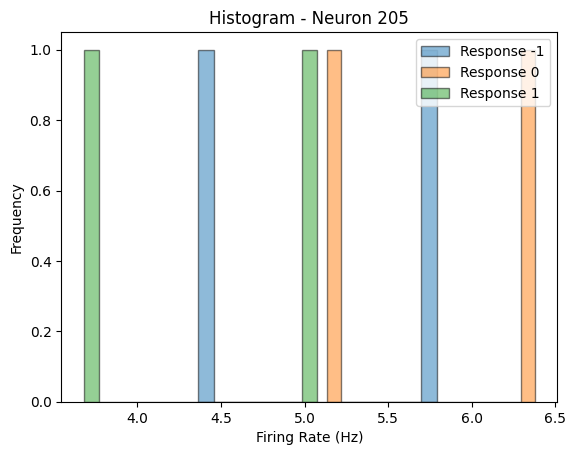

Neuron 206 Firing Rate Comparison:
Response Category -1: 4.47 Hz
Response Category 0: 4.95 Hz
Response Category 1: 4.31 Hz



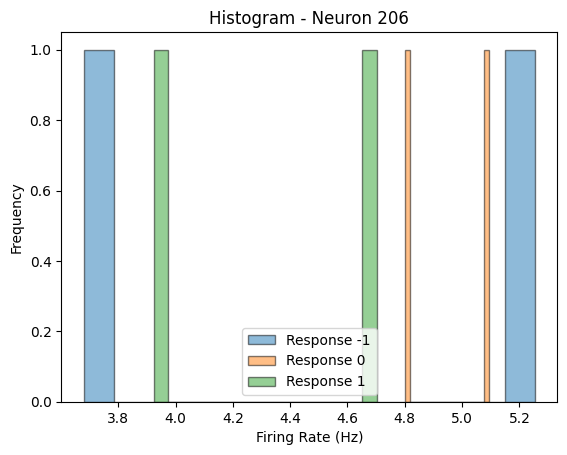

Neuron 207 Firing Rate Comparison:
Response Category -1: 4.64 Hz
Response Category 0: 4.65 Hz
Response Category 1: 4.38 Hz



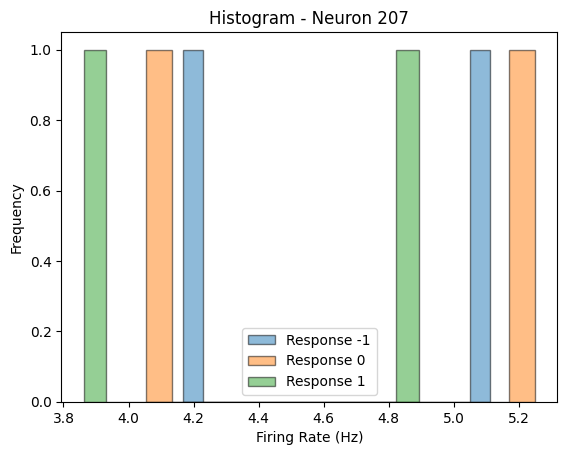

Neuron 208 Firing Rate Comparison:
Response Category -1: 4.36 Hz
Response Category 0: 4.83 Hz
Response Category 1: 4.30 Hz



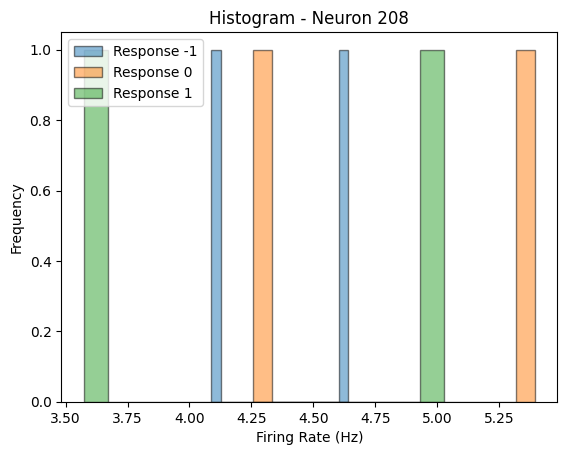

Neuron 209 Firing Rate Comparison:
Response Category -1: 4.78 Hz
Response Category 0: 5.97 Hz
Response Category 1: 4.59 Hz



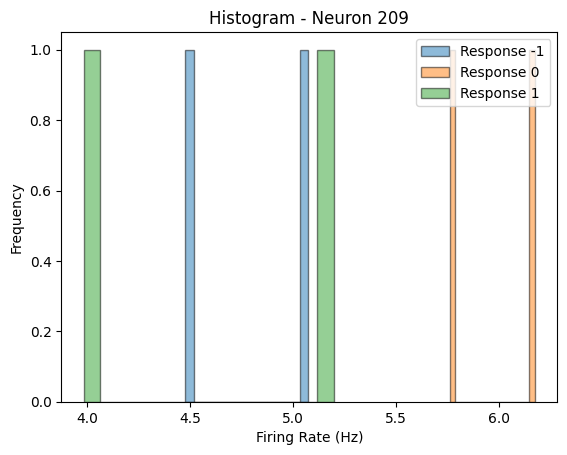

Neuron 210 Firing Rate Comparison:
Response Category -1: 5.35 Hz
Response Category 0: 5.76 Hz
Response Category 1: 4.74 Hz



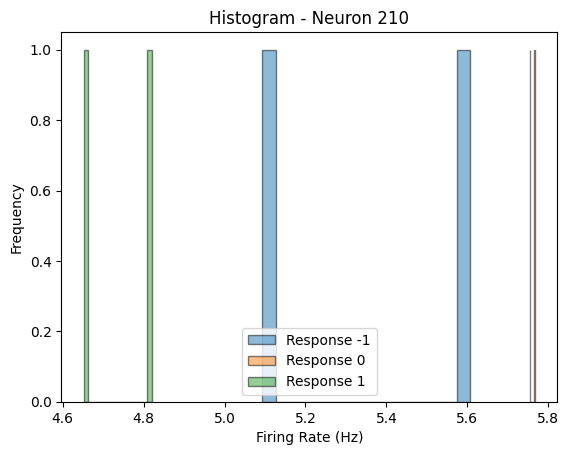

Neuron 211 Firing Rate Comparison:
Response Category -1: 5.01 Hz
Response Category 0: 5.46 Hz
Response Category 1: 4.51 Hz



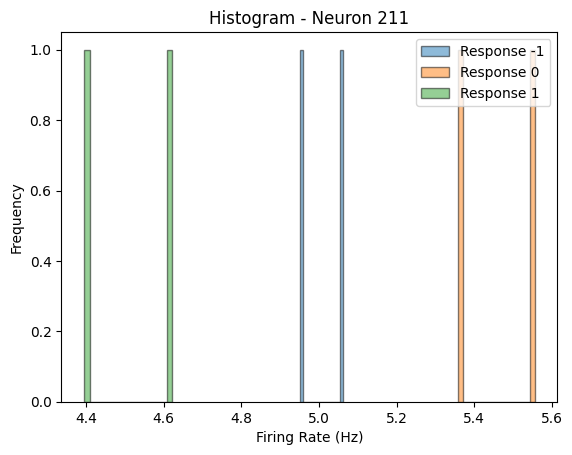

Neuron 212 Firing Rate Comparison:
Response Category -1: 4.71 Hz
Response Category 0: 5.00 Hz
Response Category 1: 4.34 Hz



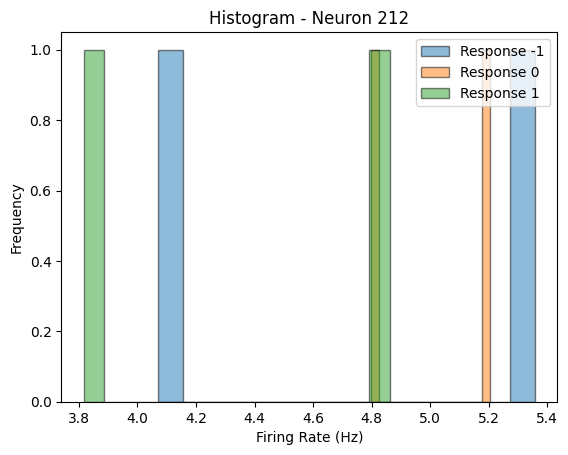

Neuron 213 Firing Rate Comparison:
Response Category -1: 4.62 Hz
Response Category 0: 5.45 Hz
Response Category 1: 4.73 Hz



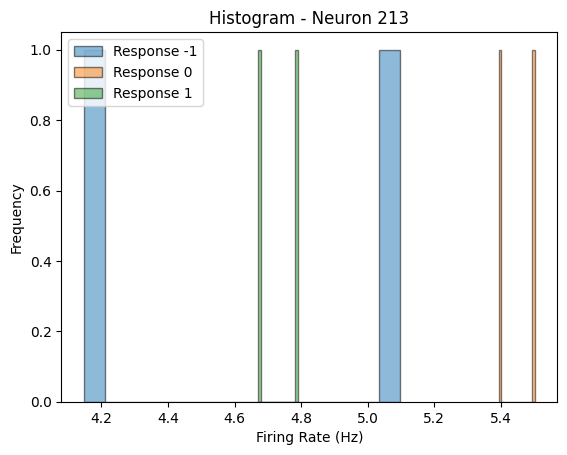

Neuron 214 Firing Rate Comparison:
Response Category -1: 4.61 Hz
Response Category 0: 4.57 Hz
Response Category 1: 4.79 Hz



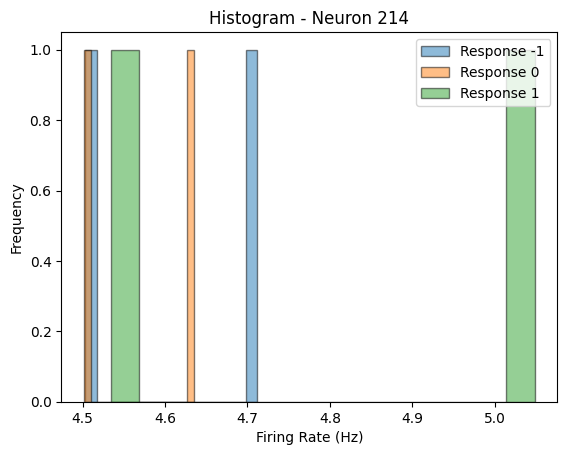

Neuron 215 Firing Rate Comparison:
Response Category -1: 4.81 Hz
Response Category 0: 5.57 Hz
Response Category 1: 4.91 Hz



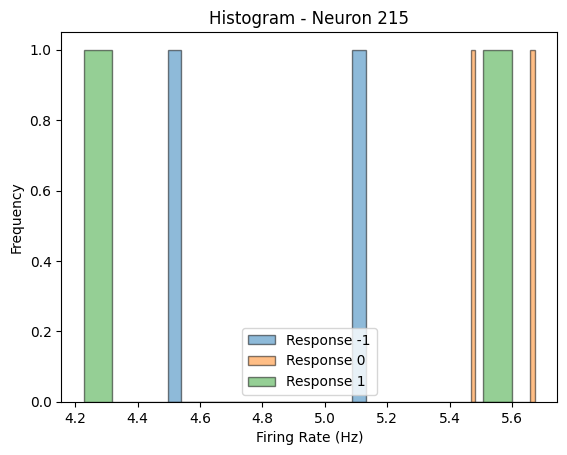

Neuron 216 Firing Rate Comparison:
Response Category -1: 4.61 Hz
Response Category 0: 5.02 Hz
Response Category 1: 4.61 Hz



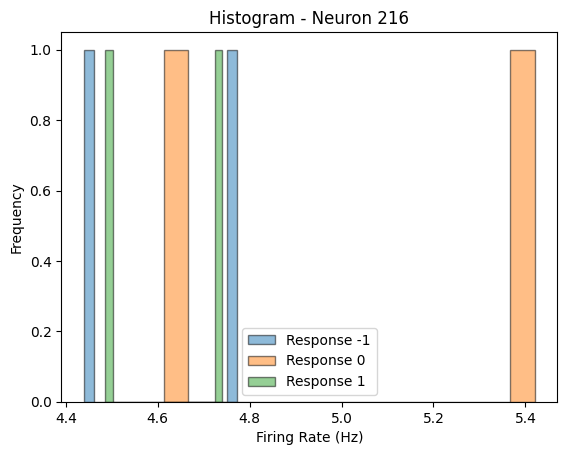

Neuron 217 Firing Rate Comparison:
Response Category -1: 4.94 Hz
Response Category 0: 5.60 Hz
Response Category 1: 4.73 Hz



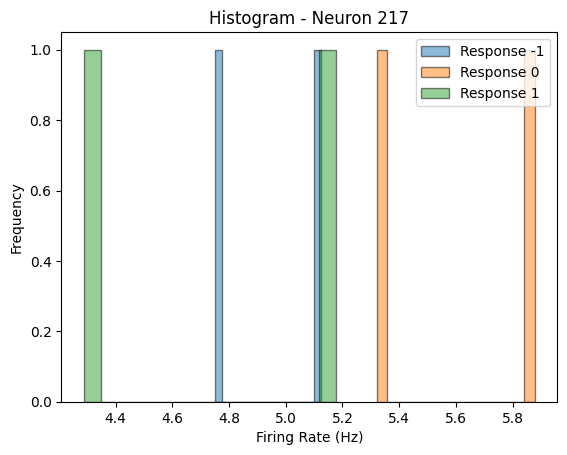

Neuron 218 Firing Rate Comparison:
Response Category -1: 4.41 Hz
Response Category 0: 4.95 Hz
Response Category 1: 4.26 Hz



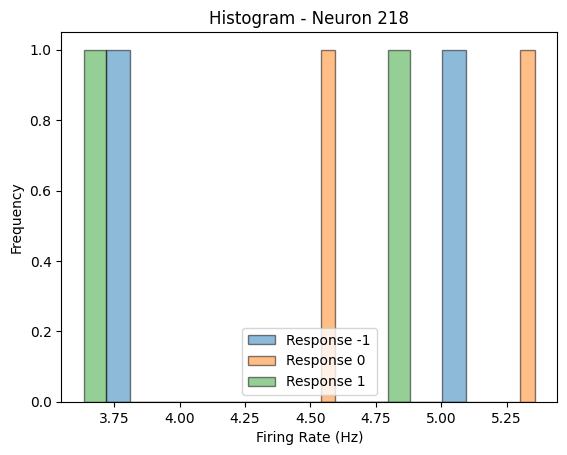

Neuron 219 Firing Rate Comparison:
Response Category -1: 4.47 Hz
Response Category 0: 4.43 Hz
Response Category 1: 4.07 Hz



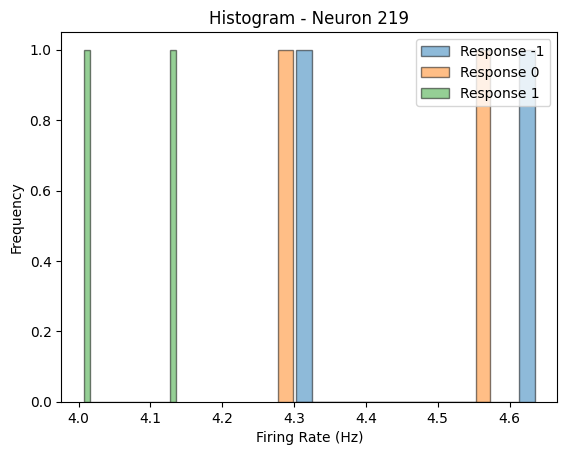

Neuron 220 Firing Rate Comparison:
Response Category -1: 4.55 Hz
Response Category 0: 4.64 Hz
Response Category 1: 4.76 Hz



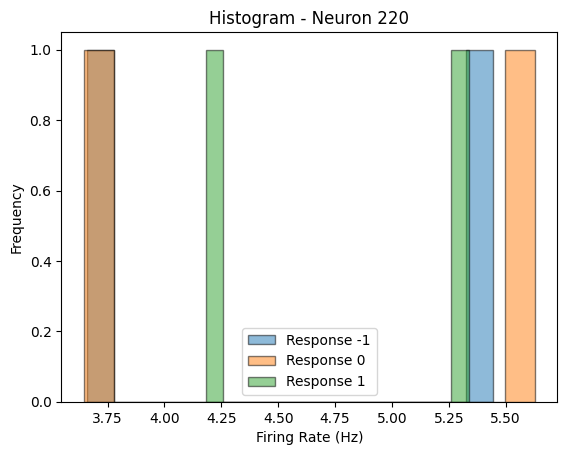

Neuron 221 Firing Rate Comparison:
Response Category -1: 4.04 Hz
Response Category 0: 4.53 Hz
Response Category 1: 4.32 Hz



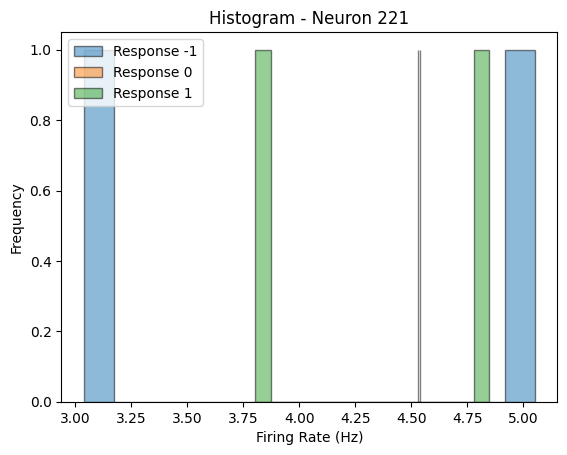

Neuron 222 Firing Rate Comparison:
Response Category -1: 4.64 Hz
Response Category 0: 4.66 Hz
Response Category 1: 4.67 Hz



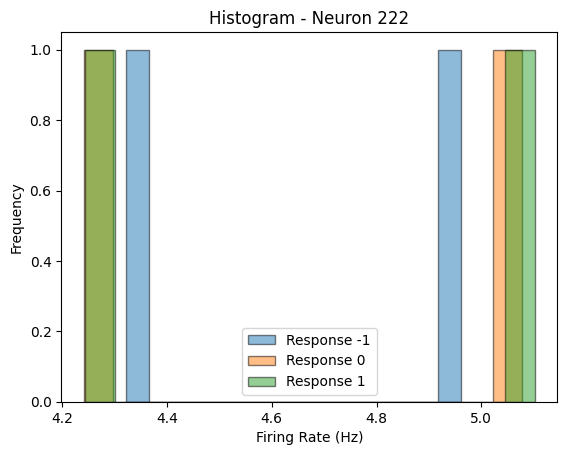

Neuron 223 Firing Rate Comparison:
Response Category -1: 4.75 Hz
Response Category 0: 4.72 Hz
Response Category 1: 4.78 Hz



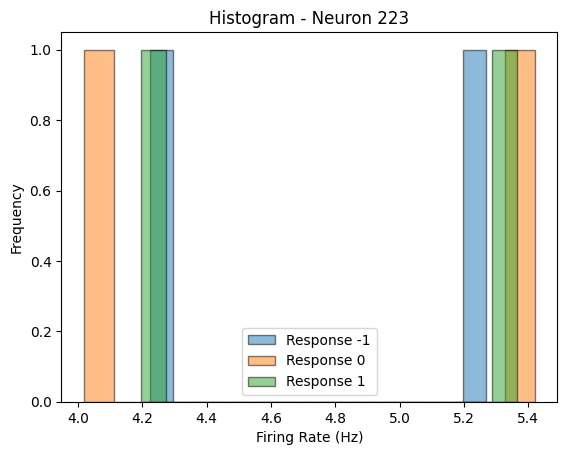

Neuron 224 Firing Rate Comparison:
Response Category -1: 4.58 Hz
Response Category 0: 5.03 Hz
Response Category 1: 4.04 Hz



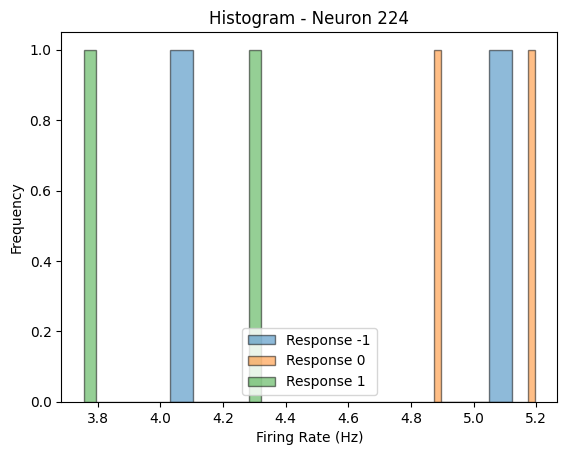

Neuron 225 Firing Rate Comparison:
Response Category -1: 4.76 Hz
Response Category 0: 3.49 Hz
Response Category 1: 3.76 Hz



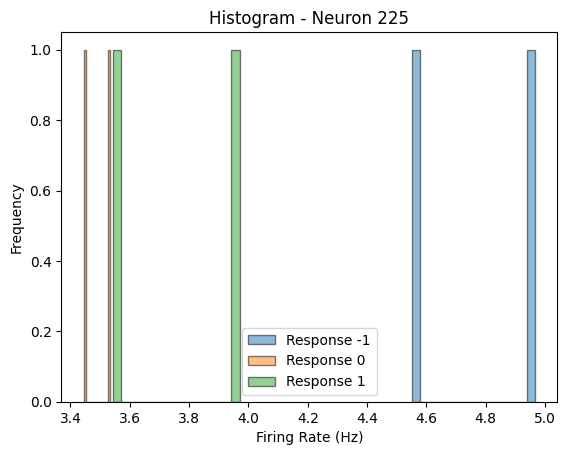

Neuron 226 Firing Rate Comparison:
Response Category -1: 4.09 Hz
Response Category 0: 5.24 Hz
Response Category 1: 4.17 Hz



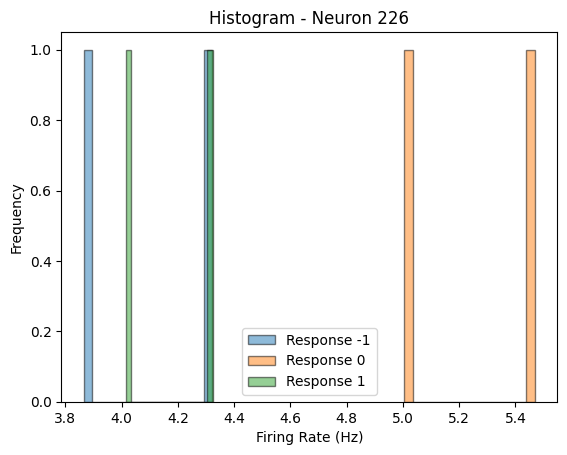

Neuron 227 Firing Rate Comparison:
Response Category -1: 4.92 Hz
Response Category 0: 5.38 Hz
Response Category 1: 4.35 Hz



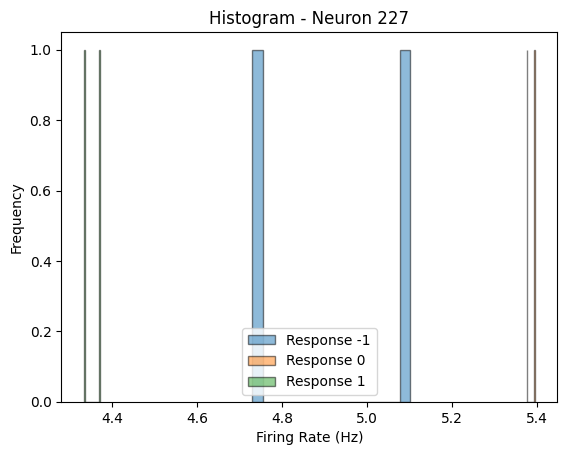

Neuron 228 Firing Rate Comparison:
Response Category -1: 4.49 Hz
Response Category 0: 4.97 Hz
Response Category 1: 4.60 Hz



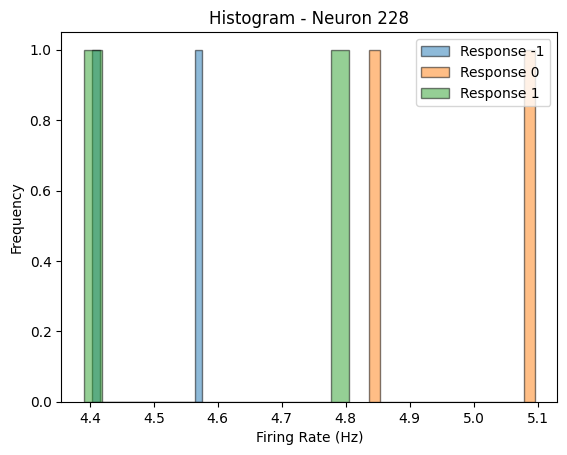

Neuron 229 Firing Rate Comparison:
Response Category -1: 5.06 Hz
Response Category 0: 5.79 Hz
Response Category 1: 4.96 Hz



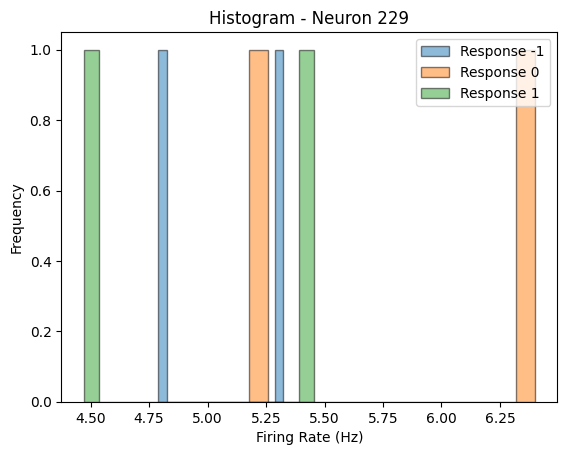

Neuron 230 Firing Rate Comparison:
Response Category -1: 5.23 Hz
Response Category 0: 5.84 Hz
Response Category 1: 5.05 Hz



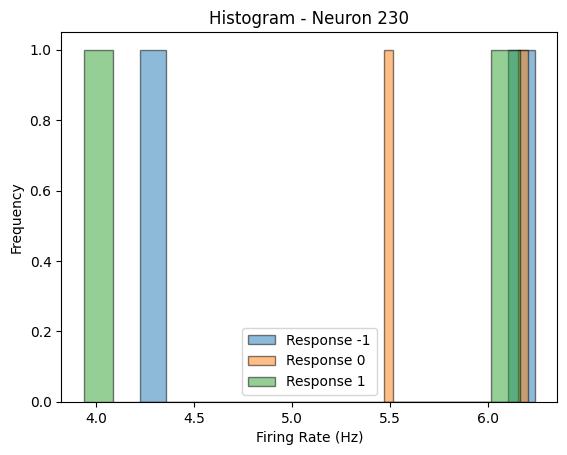

Neuron 231 Firing Rate Comparison:
Response Category -1: 5.54 Hz
Response Category 0: 5.89 Hz
Response Category 1: 4.72 Hz



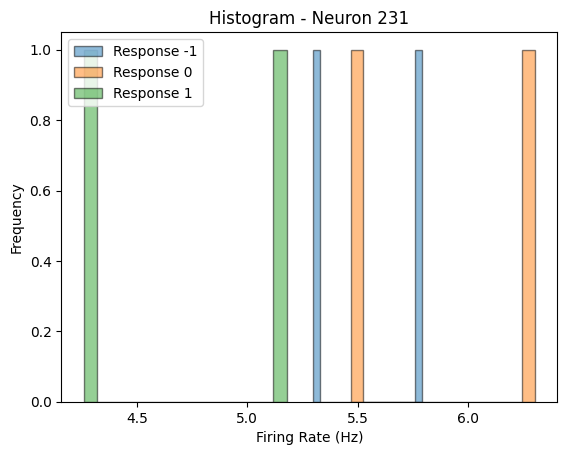

Neuron 232 Firing Rate Comparison:
Response Category -1: 4.88 Hz
Response Category 0: 5.63 Hz
Response Category 1: 5.38 Hz



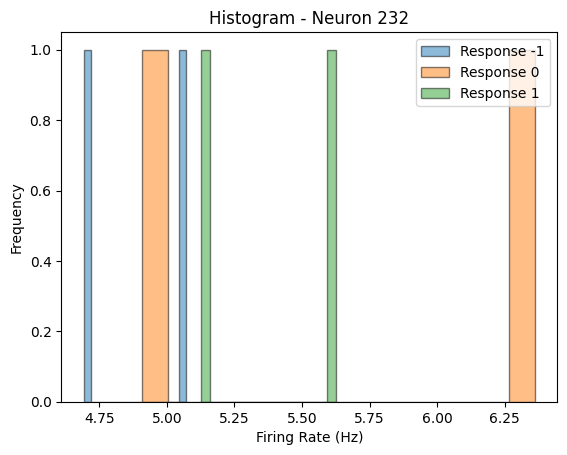

Neuron 233 Firing Rate Comparison:
Response Category -1: 4.79 Hz
Response Category 0: 5.49 Hz
Response Category 1: 4.63 Hz



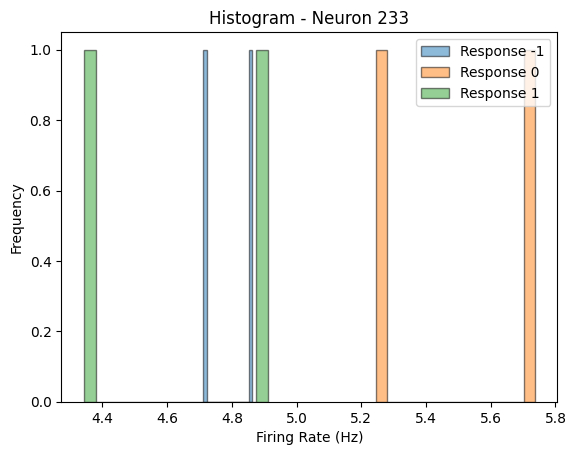

Neuron 234 Firing Rate Comparison:
Response Category -1: 5.61 Hz
Response Category 0: 6.11 Hz
Response Category 1: 4.61 Hz



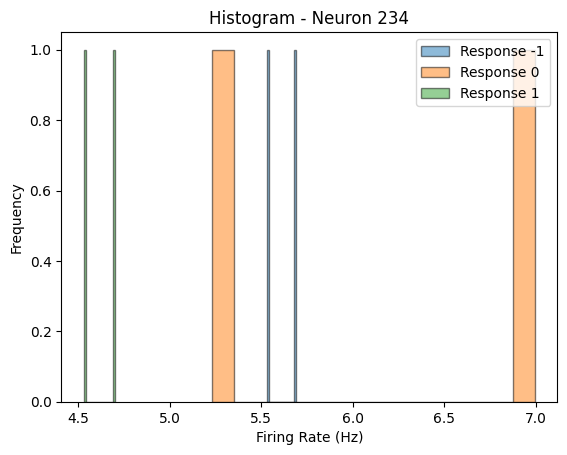

Neuron 235 Firing Rate Comparison:
Response Category -1: 6.24 Hz
Response Category 0: 5.49 Hz
Response Category 1: 4.72 Hz



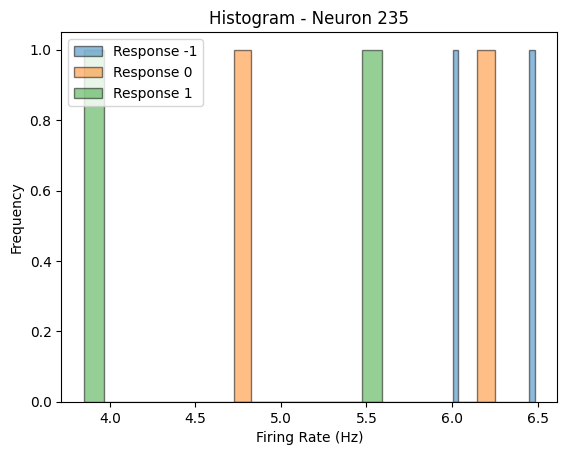

Neuron 236 Firing Rate Comparison:
Response Category -1: 5.66 Hz
Response Category 0: 7.00 Hz
Response Category 1: 4.96 Hz



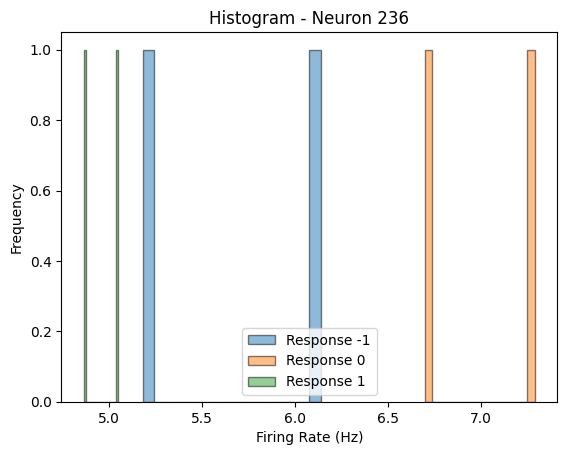

Neuron 237 Firing Rate Comparison:
Response Category -1: 5.93 Hz
Response Category 0: 6.56 Hz
Response Category 1: 4.68 Hz



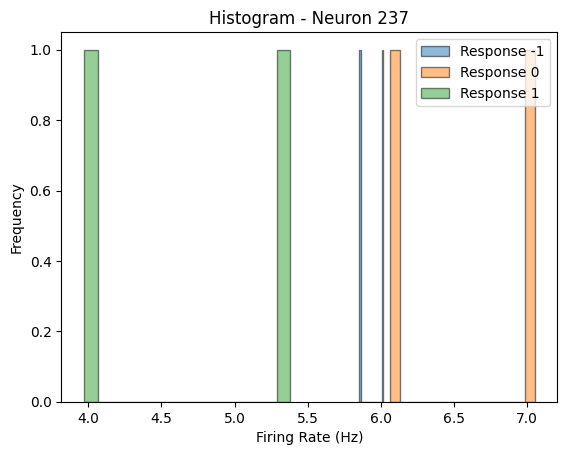

Neuron 238 Firing Rate Comparison:
Response Category -1: 5.42 Hz
Response Category 0: 6.23 Hz
Response Category 1: 4.68 Hz



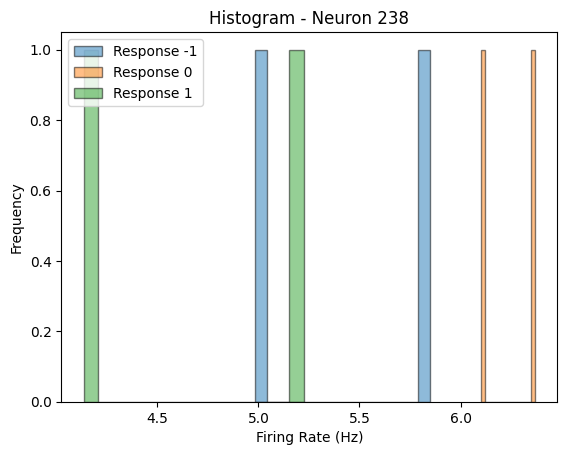

Neuron 239 Firing Rate Comparison:
Response Category -1: 4.79 Hz
Response Category 0: 5.16 Hz
Response Category 1: 3.89 Hz



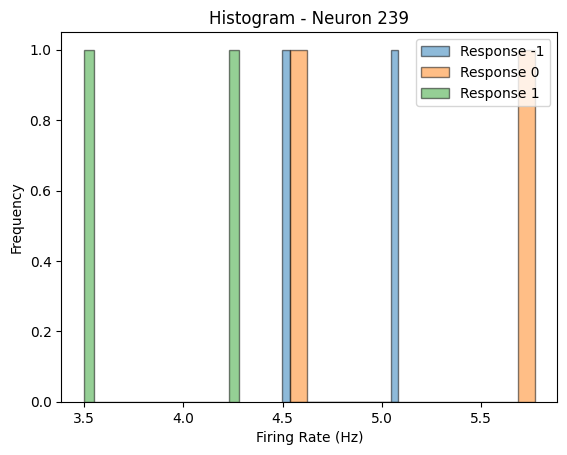

Neuron 240 Firing Rate Comparison:
Response Category -1: 5.18 Hz
Response Category 0: 5.27 Hz
Response Category 1: 4.44 Hz



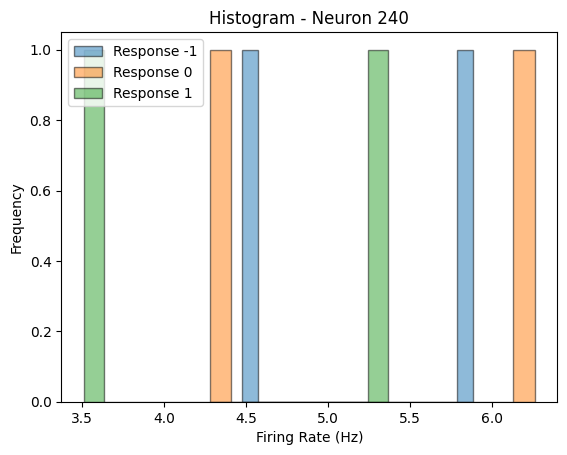

Neuron 241 Firing Rate Comparison:
Response Category -1: 5.76 Hz
Response Category 0: 5.47 Hz
Response Category 1: 4.06 Hz



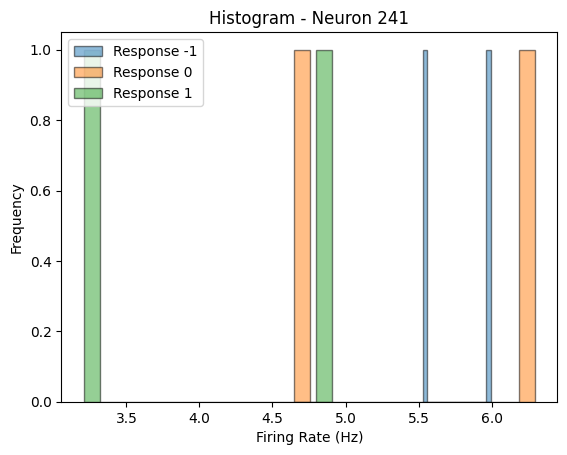

Neuron 242 Firing Rate Comparison:
Response Category -1: 5.15 Hz
Response Category 0: 6.16 Hz
Response Category 1: 4.63 Hz



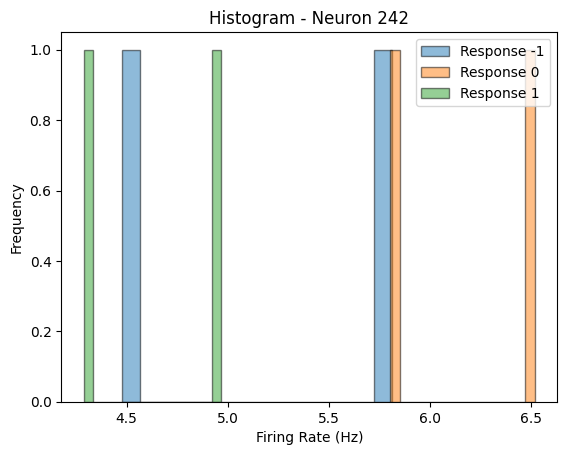

Neuron 243 Firing Rate Comparison:
Response Category -1: 4.96 Hz
Response Category 0: 5.94 Hz
Response Category 1: 4.54 Hz



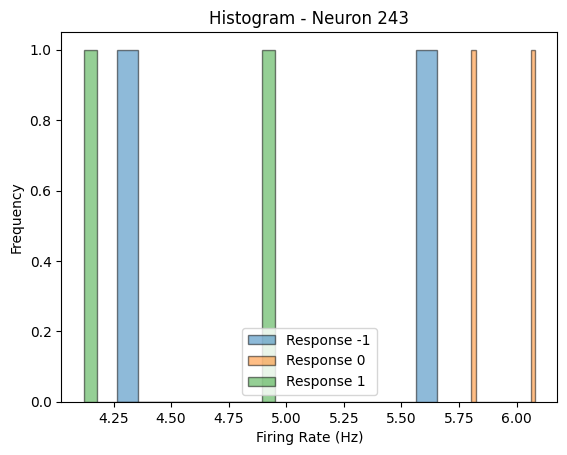

Neuron 244 Firing Rate Comparison:
Response Category -1: 5.13 Hz
Response Category 0: 6.63 Hz
Response Category 1: 4.93 Hz



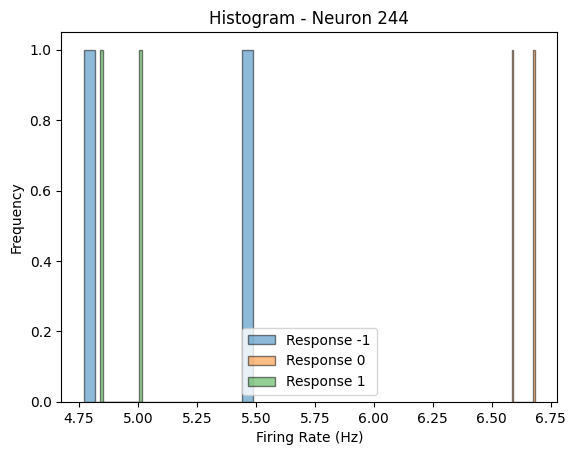

Neuron 245 Firing Rate Comparison:
Response Category -1: 5.32 Hz
Response Category 0: 6.10 Hz
Response Category 1: 4.50 Hz



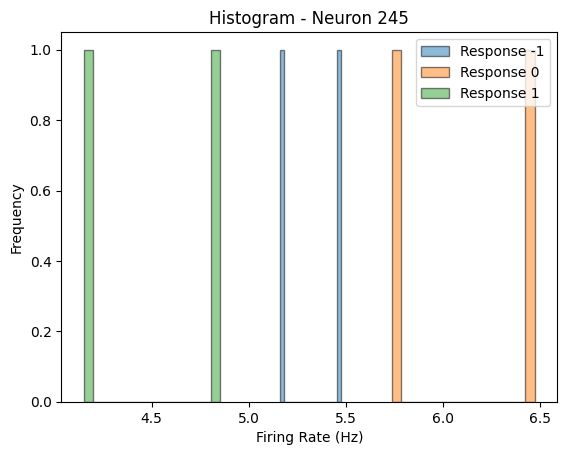

Neuron 246 Firing Rate Comparison:
Response Category -1: 5.53 Hz
Response Category 0: 6.05 Hz
Response Category 1: 5.20 Hz



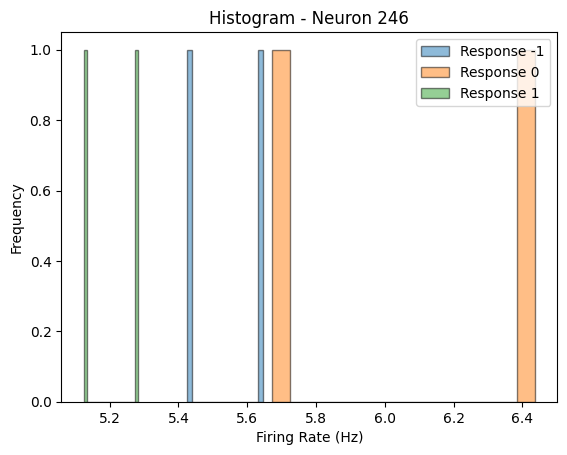

Neuron 247 Firing Rate Comparison:
Response Category -1: 4.98 Hz
Response Category 0: 4.67 Hz
Response Category 1: 4.22 Hz



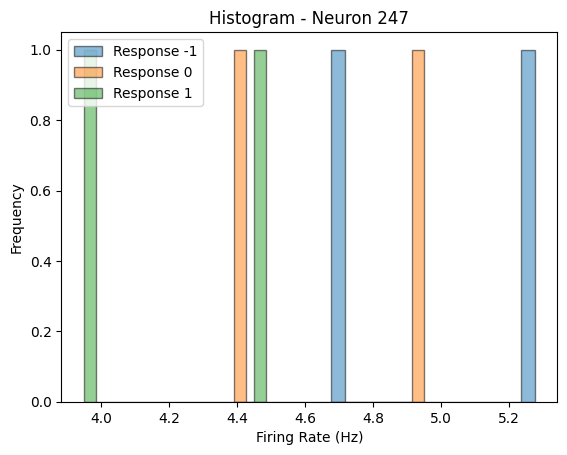

Neuron 248 Firing Rate Comparison:
Response Category -1: 4.79 Hz
Response Category 0: 4.09 Hz
Response Category 1: 4.00 Hz



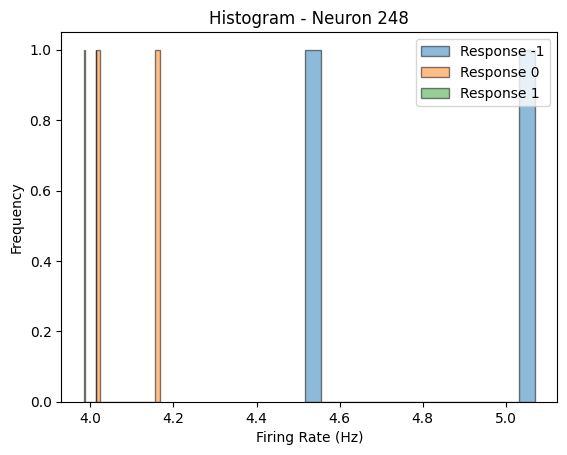

Neuron 249 Firing Rate Comparison:
Response Category -1: 5.28 Hz
Response Category 0: 4.10 Hz
Response Category 1: 4.11 Hz



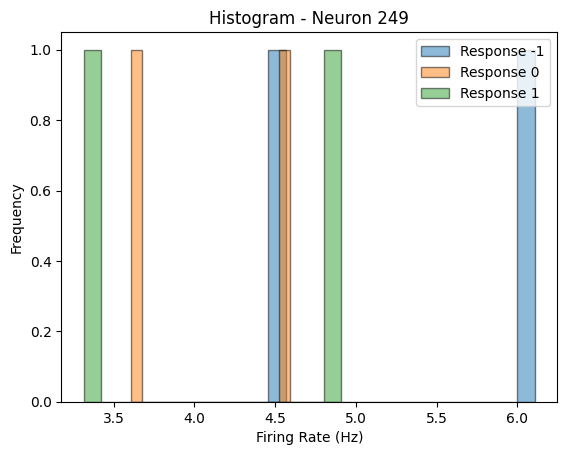

Neuron 250 Firing Rate Comparison:
Response Category -1: 5.48 Hz
Response Category 0: 4.11 Hz
Response Category 1: 4.37 Hz



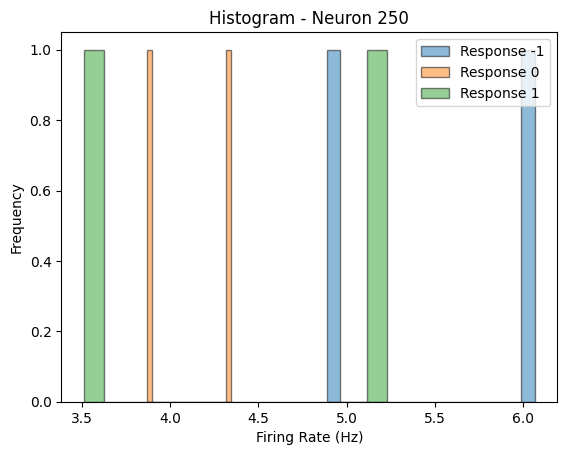

Neuron 251 Firing Rate Comparison:
Response Category -1: 5.65 Hz
Response Category 0: 4.77 Hz
Response Category 1: 5.18 Hz



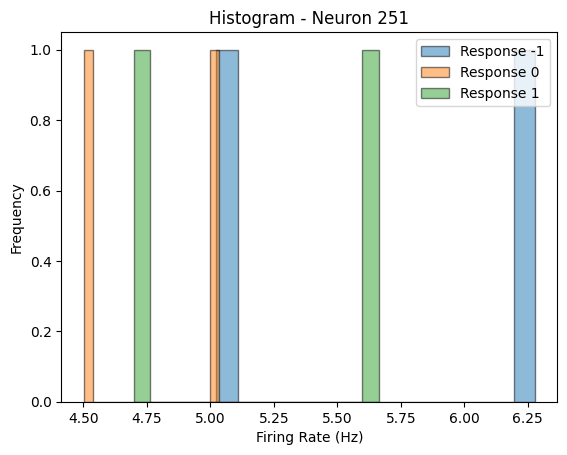

Neuron 252 Firing Rate Comparison:
Response Category -1: 5.64 Hz
Response Category 0: 4.27 Hz
Response Category 1: 5.02 Hz



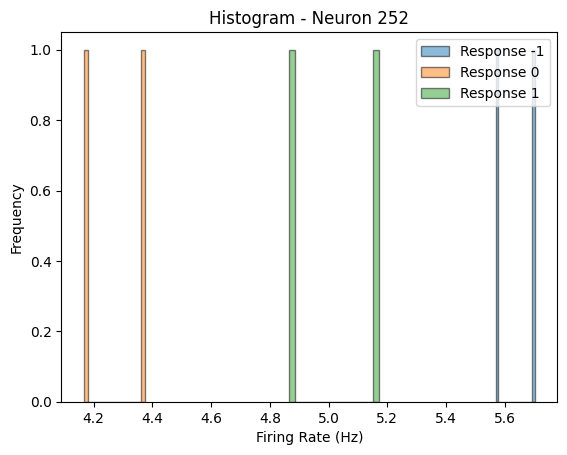

Neuron 253 Firing Rate Comparison:
Response Category -1: 4.82 Hz
Response Category 0: 4.72 Hz
Response Category 1: 4.39 Hz



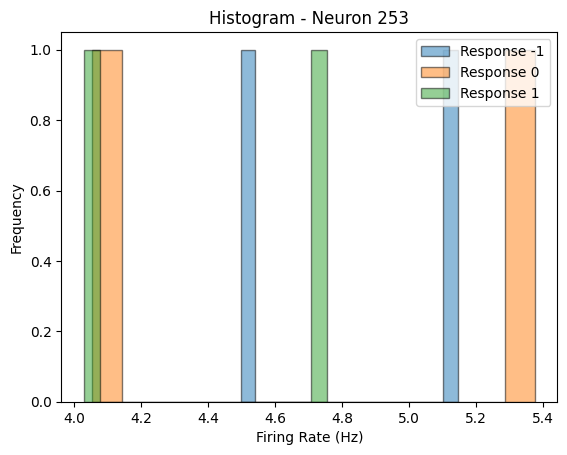

Neuron 254 Firing Rate Comparison:
Response Category -1: 4.92 Hz
Response Category 0: 4.99 Hz
Response Category 1: 4.64 Hz



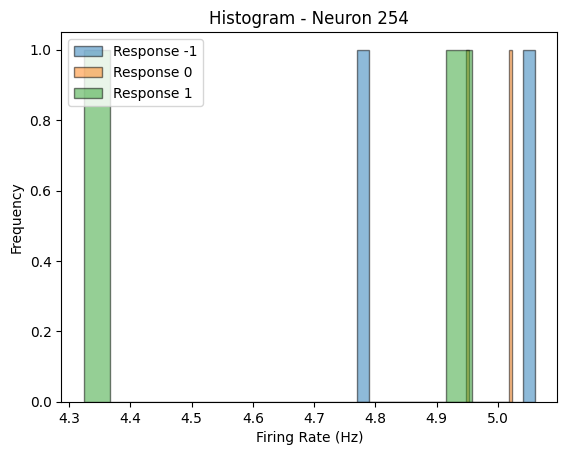

Neuron 255 Firing Rate Comparison:
Response Category -1: 4.88 Hz
Response Category 0: 4.85 Hz
Response Category 1: 4.37 Hz



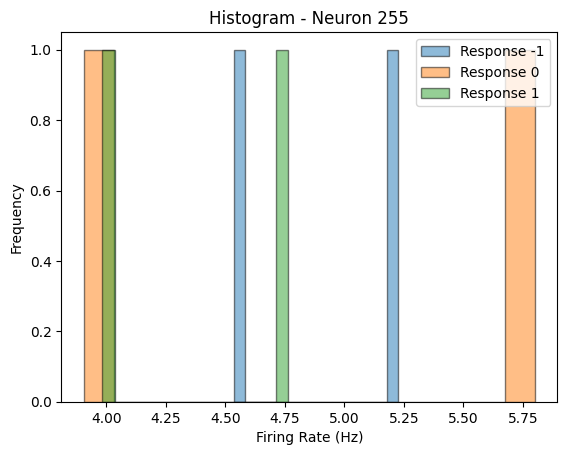

Neuron 256 Firing Rate Comparison:
Response Category -1: 4.06 Hz
Response Category 0: 5.45 Hz
Response Category 1: 4.09 Hz



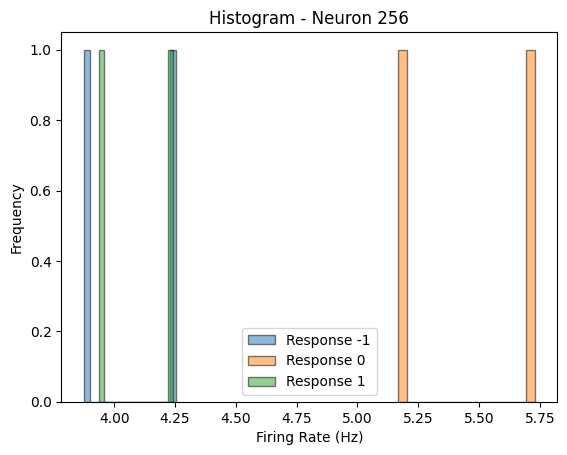

Neuron 257 Firing Rate Comparison:
Response Category -1: 5.11 Hz
Response Category 0: 5.07 Hz
Response Category 1: 4.51 Hz



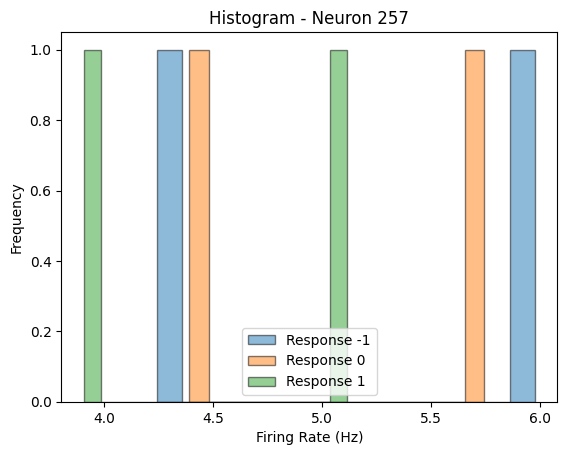

Neuron 258 Firing Rate Comparison:
Response Category -1: 5.29 Hz
Response Category 0: 4.50 Hz
Response Category 1: 4.85 Hz



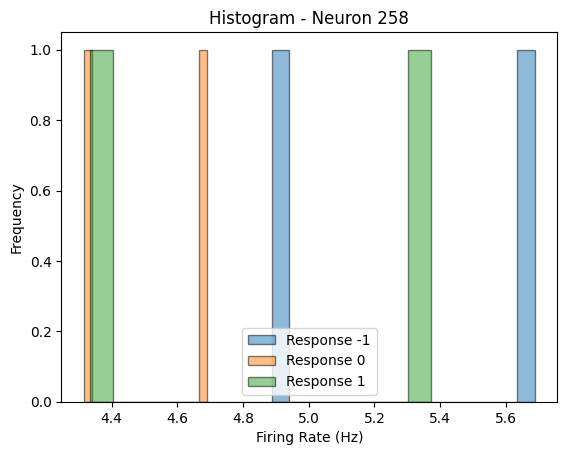

Neuron 259 Firing Rate Comparison:
Response Category -1: 5.03 Hz
Response Category 0: 5.22 Hz
Response Category 1: 4.62 Hz



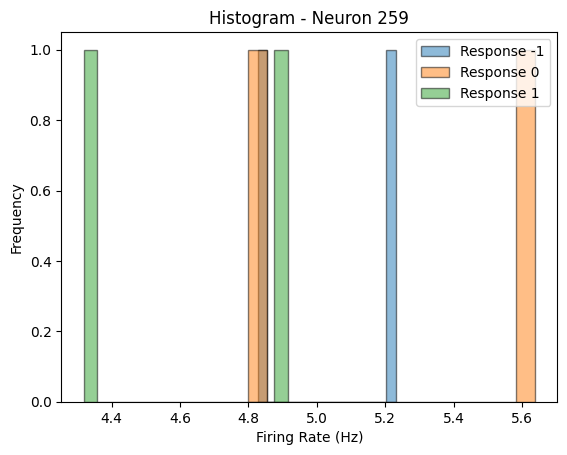

Neuron 260 Firing Rate Comparison:
Response Category -1: 5.62 Hz
Response Category 0: 4.91 Hz
Response Category 1: 4.78 Hz



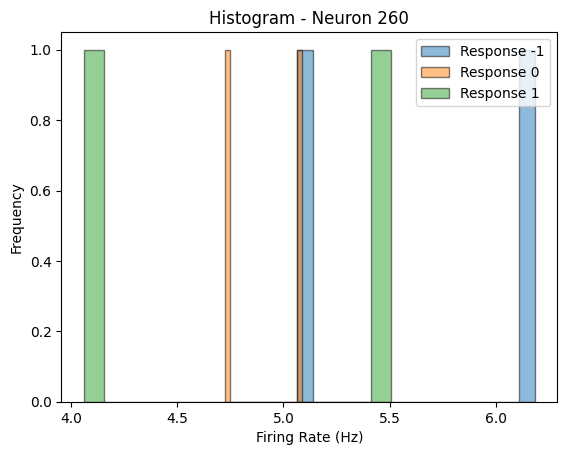

Neuron 261 Firing Rate Comparison:
Response Category -1: 4.74 Hz
Response Category 0: 3.75 Hz
Response Category 1: 4.36 Hz



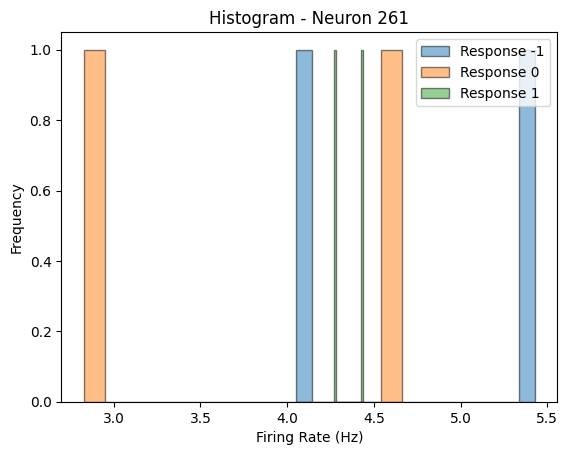

Neuron 262 Firing Rate Comparison:
Response Category -1: 4.21 Hz
Response Category 0: 3.20 Hz
Response Category 1: 4.09 Hz



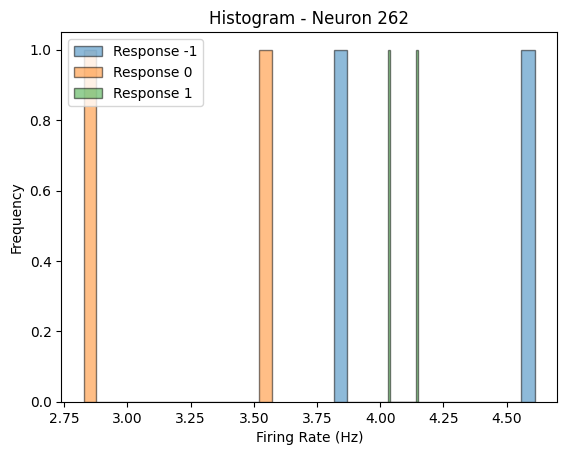

Neuron 263 Firing Rate Comparison:
Response Category -1: 4.33 Hz
Response Category 0: 3.54 Hz
Response Category 1: 3.70 Hz



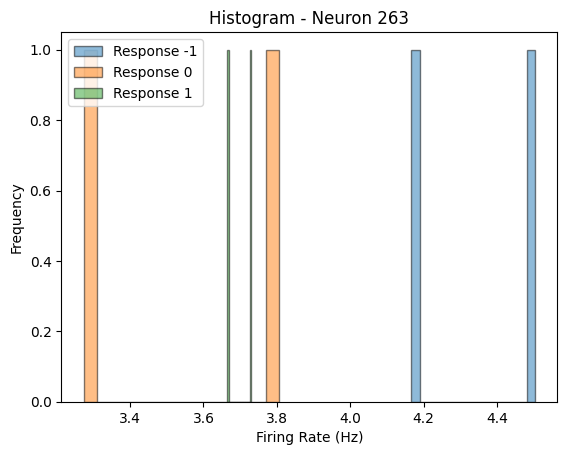

Neuron 264 Firing Rate Comparison:
Response Category -1: 5.64 Hz
Response Category 0: 4.28 Hz
Response Category 1: 4.76 Hz



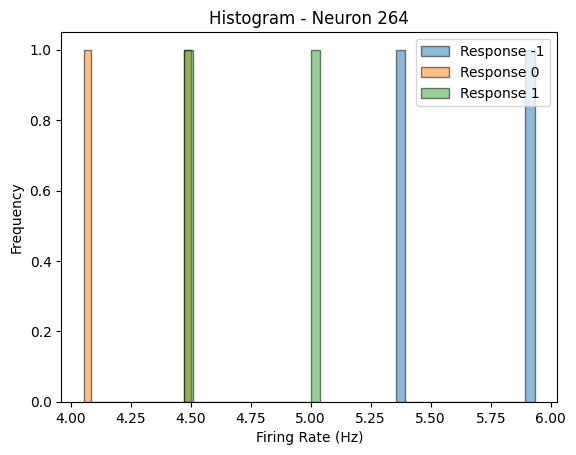

Neuron 265 Firing Rate Comparison:
Response Category -1: 5.03 Hz
Response Category 0: 4.01 Hz
Response Category 1: 4.47 Hz



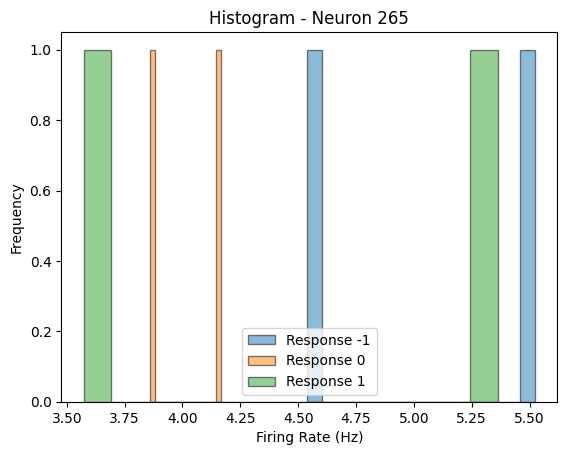

Neuron 266 Firing Rate Comparison:
Response Category -1: 5.90 Hz
Response Category 0: 4.30 Hz
Response Category 1: 4.90 Hz



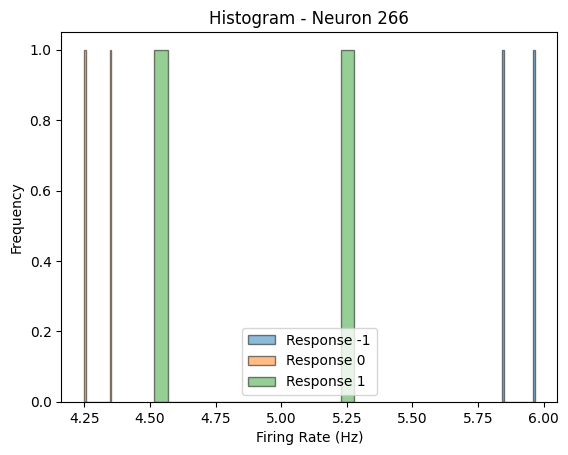

Neuron 267 Firing Rate Comparison:
Response Category -1: 5.46 Hz
Response Category 0: 4.67 Hz
Response Category 1: 4.97 Hz



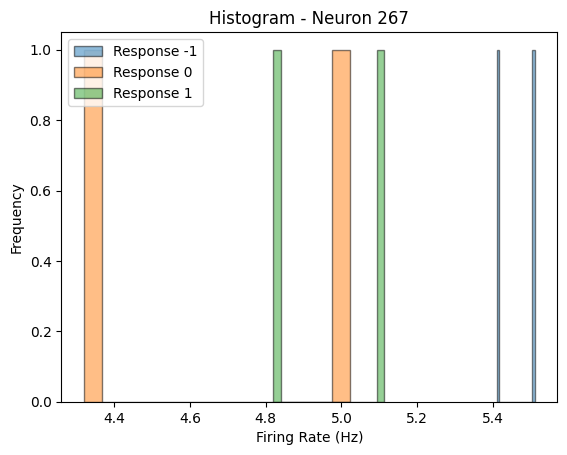

Neuron 268 Firing Rate Comparison:
Response Category -1: 4.99 Hz
Response Category 0: 4.02 Hz
Response Category 1: 5.03 Hz



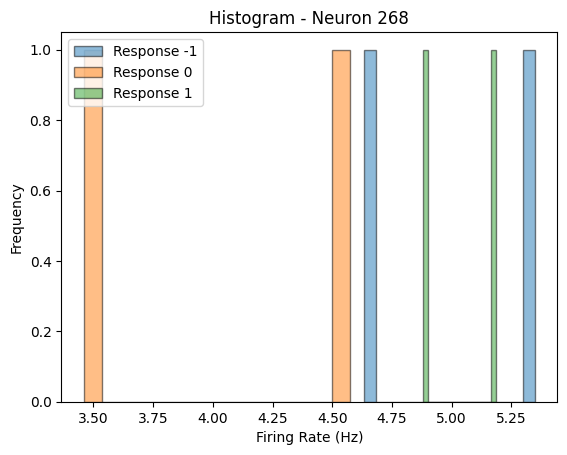

Neuron 269 Firing Rate Comparison:
Response Category -1: 5.57 Hz
Response Category 0: 4.75 Hz
Response Category 1: 4.82 Hz



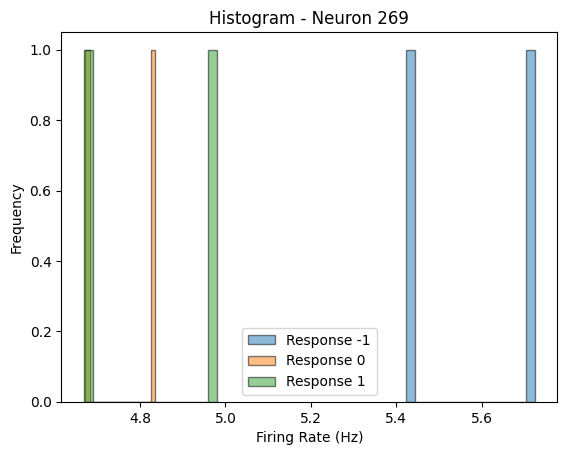

Neuron 270 Firing Rate Comparison:
Response Category -1: 5.40 Hz
Response Category 0: 4.29 Hz
Response Category 1: 4.32 Hz



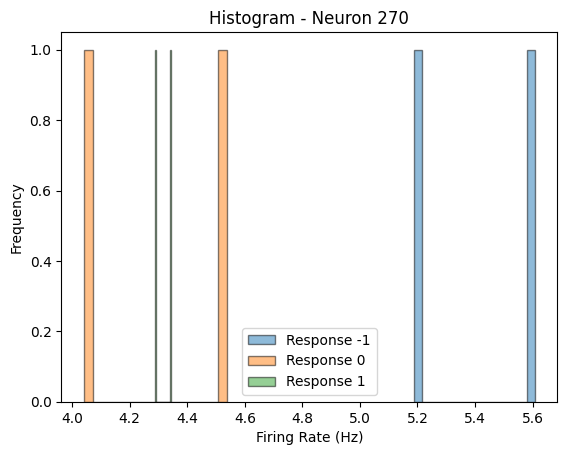

Neuron 271 Firing Rate Comparison:
Response Category -1: 5.02 Hz
Response Category 0: 3.41 Hz
Response Category 1: 3.77 Hz



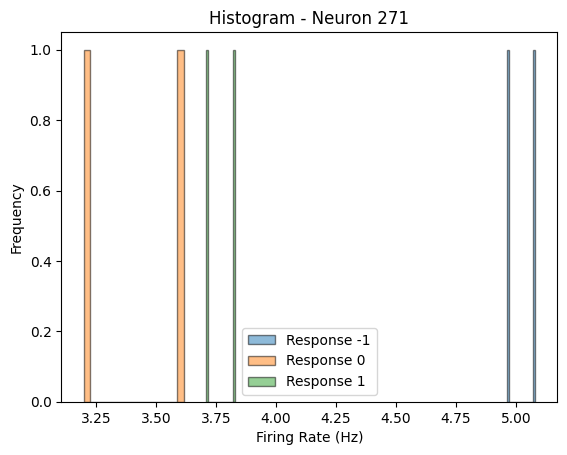

Neuron 272 Firing Rate Comparison:
Response Category -1: 5.57 Hz
Response Category 0: 4.38 Hz
Response Category 1: 4.09 Hz



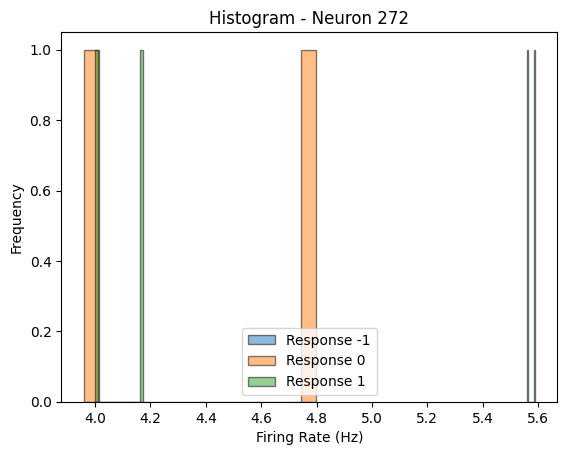

Neuron 273 Firing Rate Comparison:
Response Category -1: 4.53 Hz
Response Category 0: 3.37 Hz
Response Category 1: 3.55 Hz



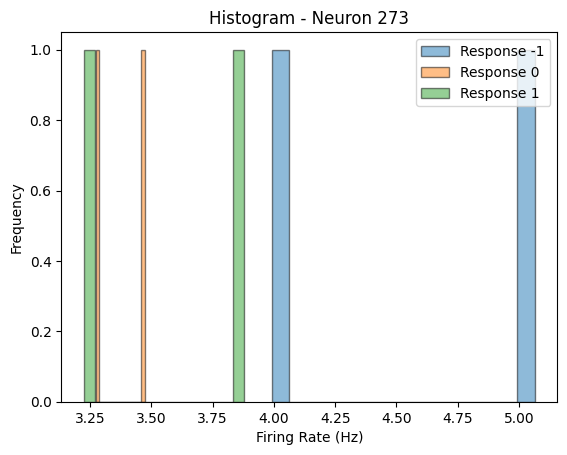

Neuron 274 Firing Rate Comparison:
Response Category -1: 4.87 Hz
Response Category 0: 3.71 Hz
Response Category 1: 3.63 Hz



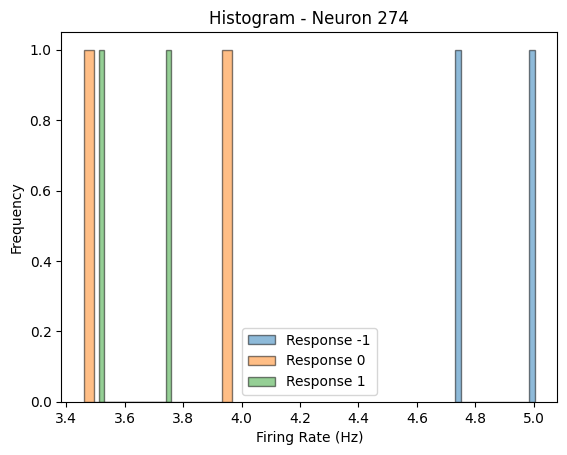

Neuron 275 Firing Rate Comparison:
Response Category -1: 6.21 Hz
Response Category 0: 4.44 Hz
Response Category 1: 4.36 Hz



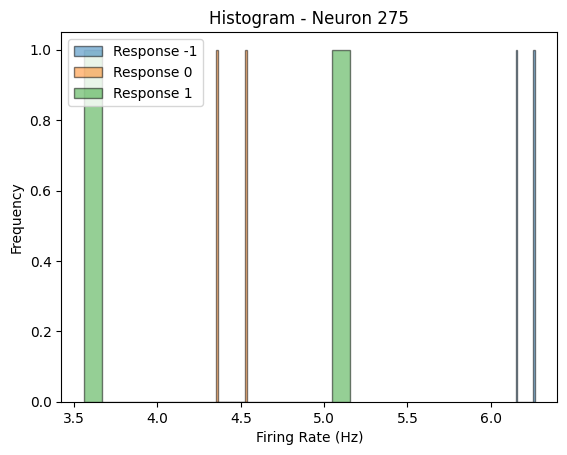

Neuron 276 Firing Rate Comparison:
Response Category -1: 5.58 Hz
Response Category 0: 5.02 Hz
Response Category 1: 4.52 Hz



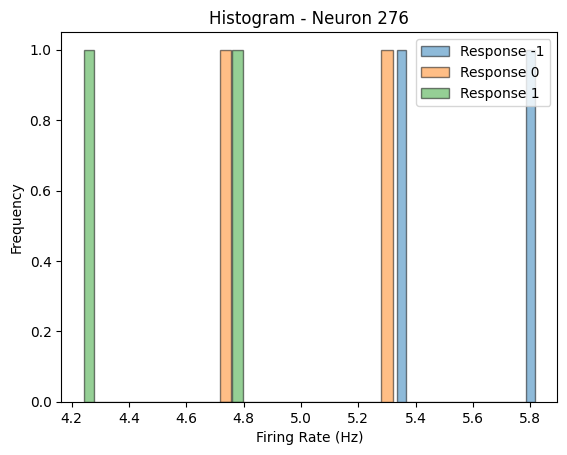

Neuron 277 Firing Rate Comparison:
Response Category -1: 5.51 Hz
Response Category 0: 4.38 Hz
Response Category 1: 5.20 Hz



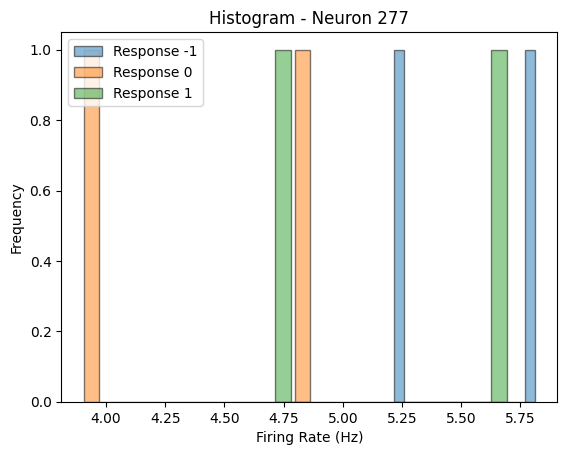

Neuron 278 Firing Rate Comparison:
Response Category -1: 5.72 Hz
Response Category 0: 4.06 Hz
Response Category 1: 4.64 Hz



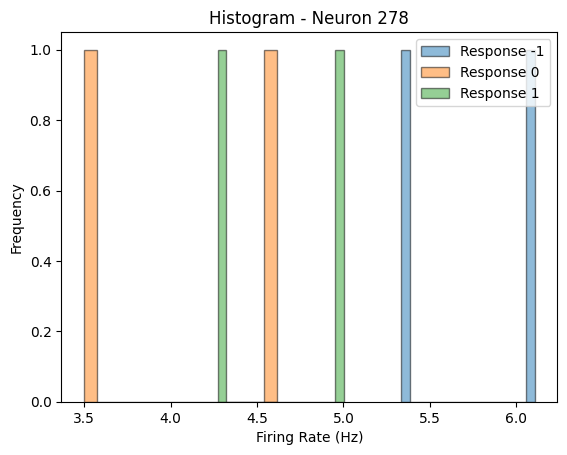

Neuron 279 Firing Rate Comparison:
Response Category -1: 5.47 Hz
Response Category 0: 4.11 Hz
Response Category 1: 4.38 Hz



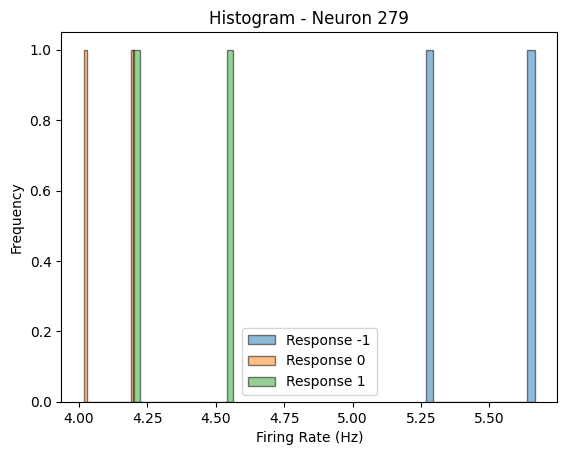

Neuron 280 Firing Rate Comparison:
Response Category -1: 3.91 Hz
Response Category 0: 3.96 Hz
Response Category 1: 4.52 Hz



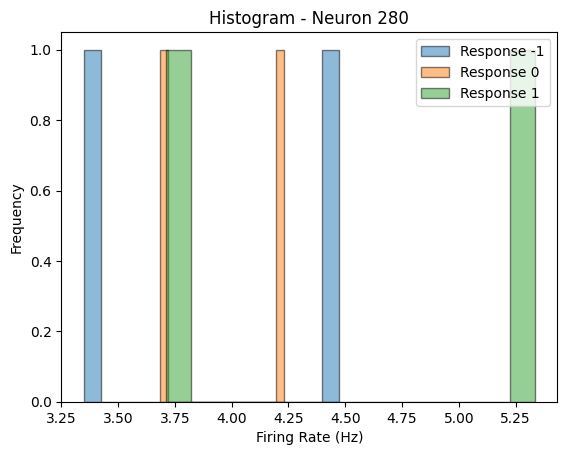

Neuron 281 Firing Rate Comparison:
Response Category -1: 4.80 Hz
Response Category 0: 4.65 Hz
Response Category 1: 4.56 Hz



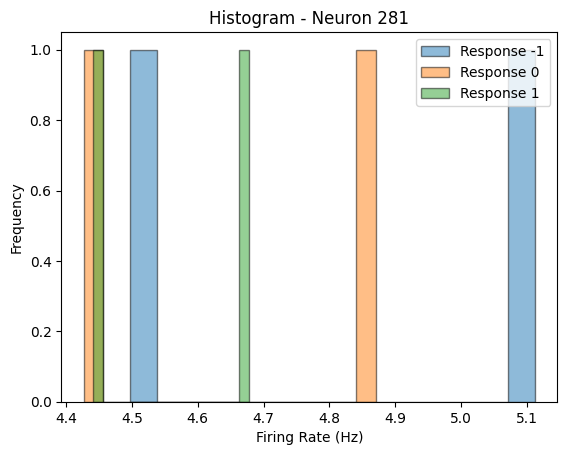

Neuron 282 Firing Rate Comparison:
Response Category -1: 4.58 Hz
Response Category 0: 4.09 Hz
Response Category 1: 4.60 Hz



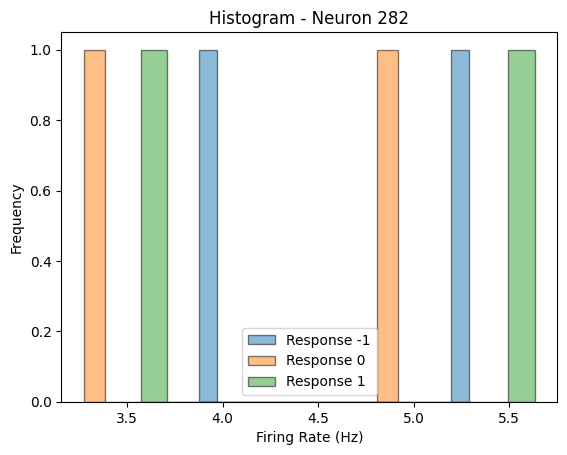

Neuron 283 Firing Rate Comparison:
Response Category -1: 4.92 Hz
Response Category 0: 4.17 Hz
Response Category 1: 4.39 Hz



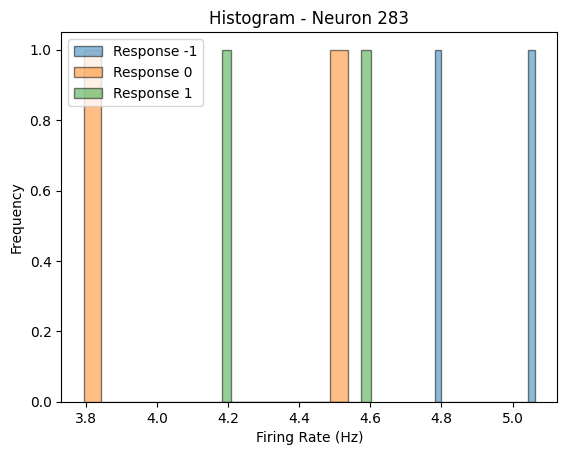

Neuron 284 Firing Rate Comparison:
Response Category -1: 4.63 Hz
Response Category 0: 4.70 Hz
Response Category 1: 4.74 Hz



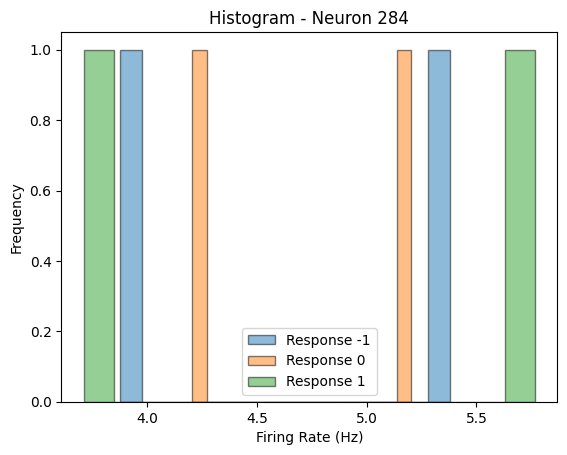

Neuron 285 Firing Rate Comparison:
Response Category -1: 4.51 Hz
Response Category 0: 4.83 Hz
Response Category 1: 4.15 Hz



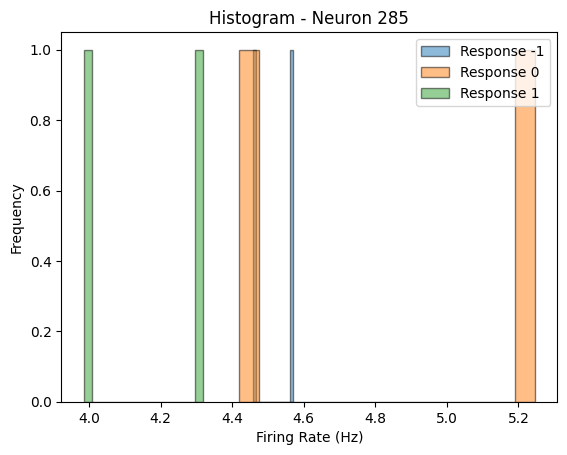

Neuron 286 Firing Rate Comparison:
Response Category -1: 5.75 Hz
Response Category 0: 5.06 Hz
Response Category 1: 5.34 Hz



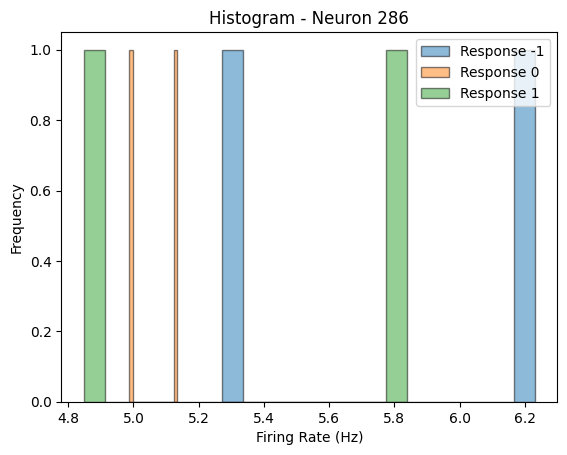

Neuron 287 Firing Rate Comparison:
Response Category -1: 5.06 Hz
Response Category 0: 4.75 Hz
Response Category 1: 4.38 Hz



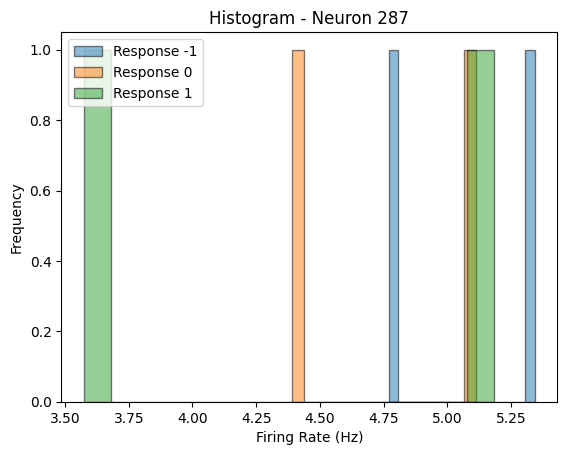

Neuron 288 Firing Rate Comparison:
Response Category -1: 4.59 Hz
Response Category 0: 5.25 Hz
Response Category 1: 4.69 Hz



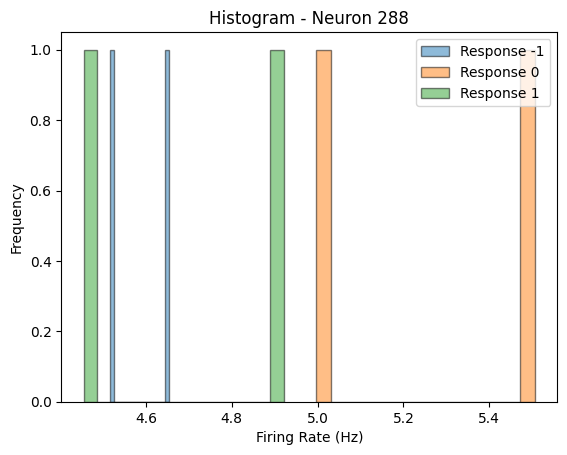

Neuron 289 Firing Rate Comparison:
Response Category -1: 4.60 Hz
Response Category 0: 5.78 Hz
Response Category 1: 4.92 Hz



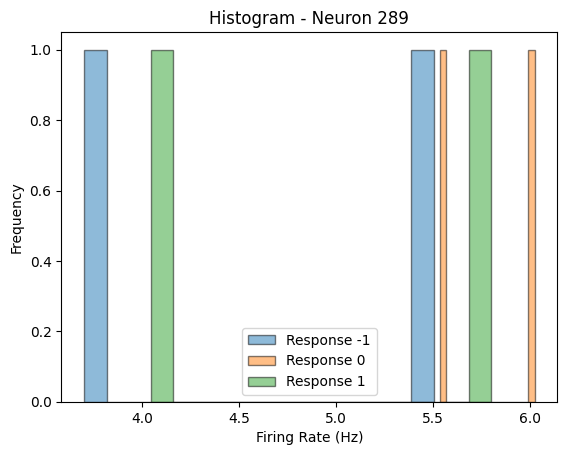

Neuron 290 Firing Rate Comparison:
Response Category -1: 5.63 Hz
Response Category 0: 4.09 Hz
Response Category 1: 4.60 Hz



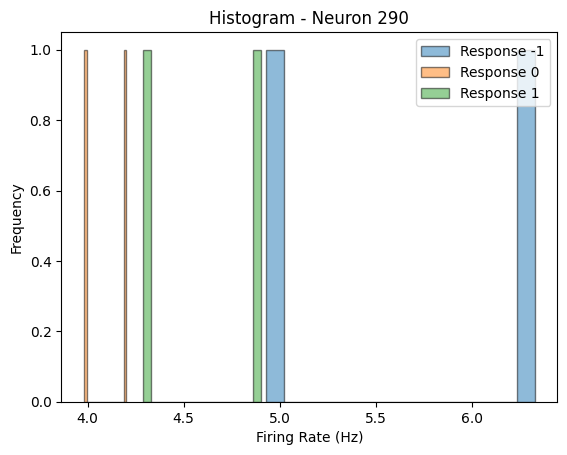

Neuron 291 Firing Rate Comparison:
Response Category -1: 4.97 Hz
Response Category 0: 4.12 Hz
Response Category 1: 4.88 Hz



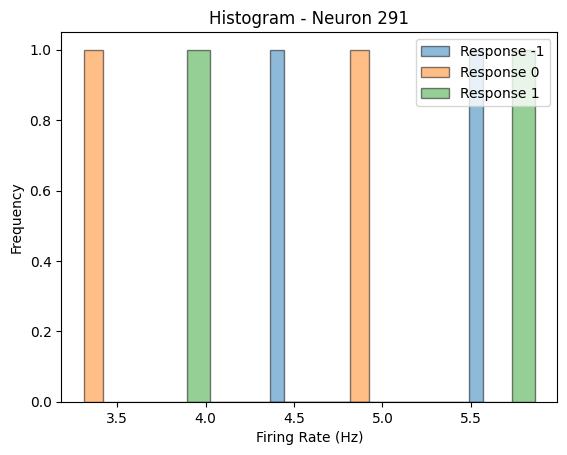

Neuron 292 Firing Rate Comparison:
Response Category -1: 4.26 Hz
Response Category 0: 3.72 Hz
Response Category 1: 4.07 Hz



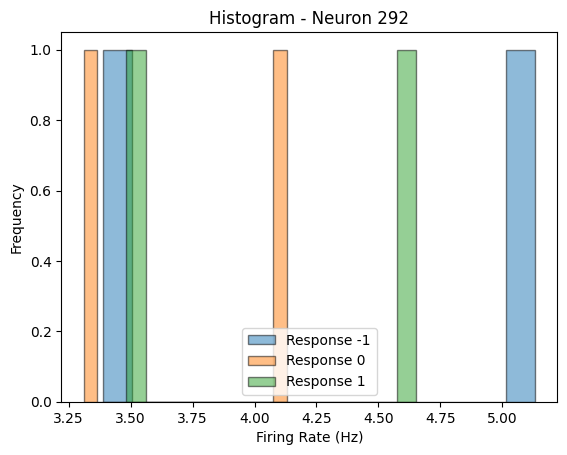

Neuron 293 Firing Rate Comparison:
Response Category -1: 5.20 Hz
Response Category 0: 4.94 Hz
Response Category 1: 4.69 Hz



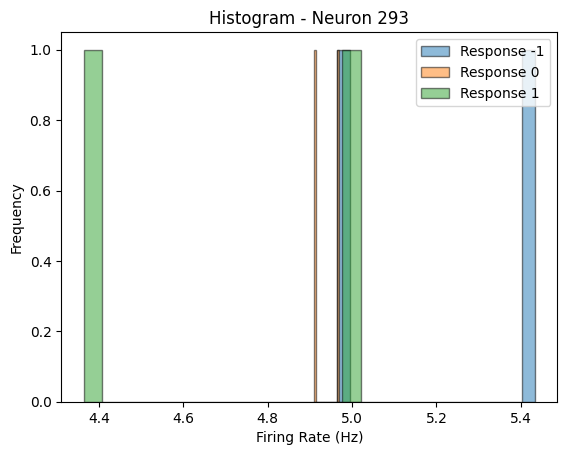

Neuron 294 Firing Rate Comparison:
Response Category -1: 5.80 Hz
Response Category 0: 4.90 Hz
Response Category 1: 5.42 Hz



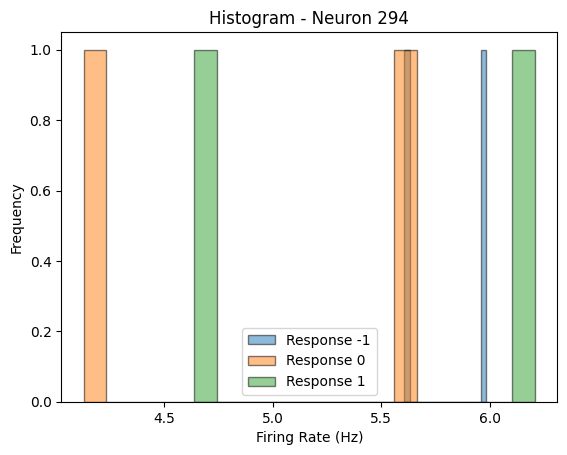

Neuron 295 Firing Rate Comparison:
Response Category -1: 4.57 Hz
Response Category 0: 3.77 Hz
Response Category 1: 4.62 Hz



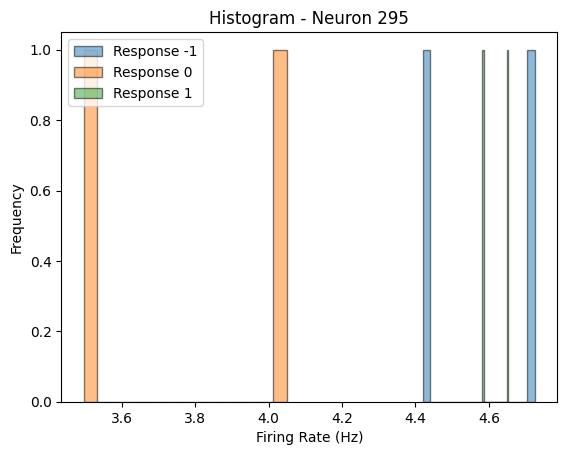

Neuron 296 Firing Rate Comparison:
Response Category -1: 5.89 Hz
Response Category 0: 5.20 Hz
Response Category 1: 4.86 Hz



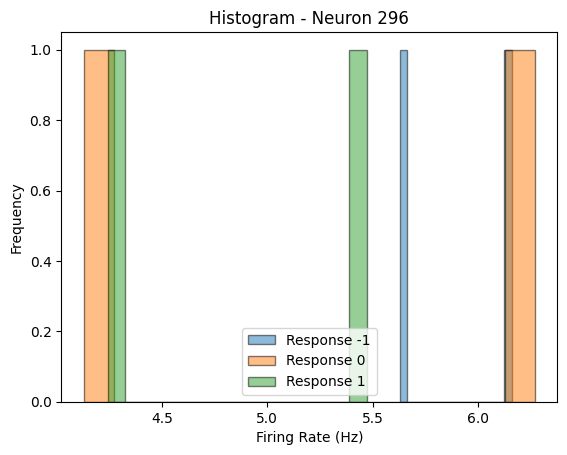

Neuron 297 Firing Rate Comparison:
Response Category -1: 4.69 Hz
Response Category 0: 3.95 Hz
Response Category 1: 4.84 Hz



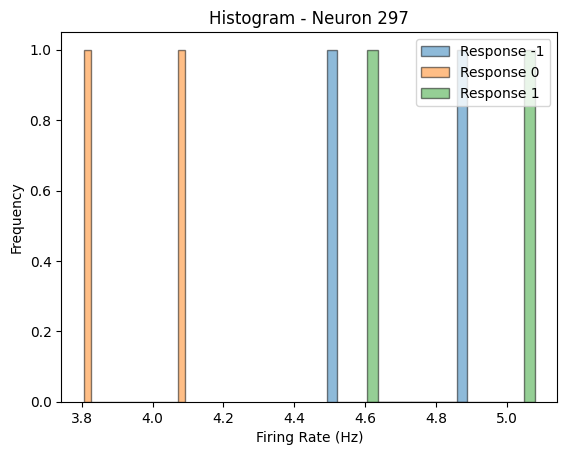

Neuron 298 Firing Rate Comparison:
Response Category -1: 4.47 Hz
Response Category 0: 4.01 Hz
Response Category 1: 3.97 Hz



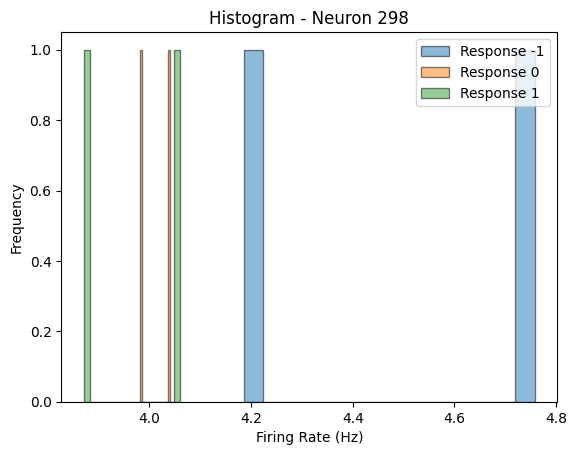

Neuron 299 Firing Rate Comparison:
Response Category -1: 5.81 Hz
Response Category 0: 4.64 Hz
Response Category 1: 4.54 Hz



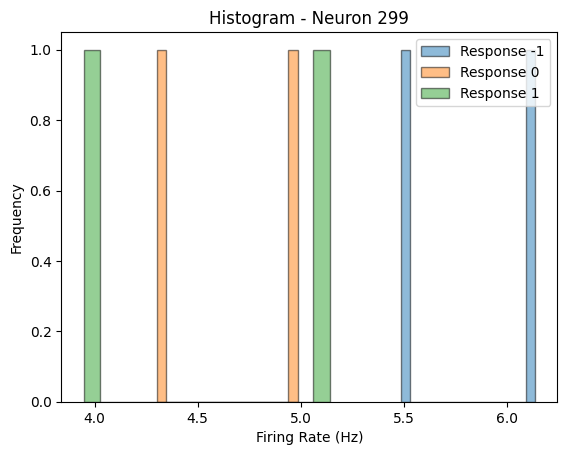

Neuron 300 Firing Rate Comparison:
Response Category -1: 4.44 Hz
Response Category 0: 4.21 Hz
Response Category 1: 4.05 Hz



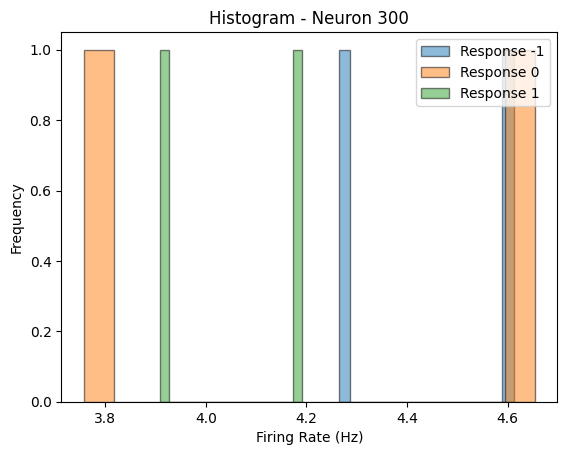

In [9]:
def divide_trials_by_response(dat, response_category):
    trials_indices = np.where(dat['response'] == response_category)[0]
    spikes_filtered = dat['spks'][trials_indices]
    return spikes_filtered

def calculate_firing_rate_per_neuron(spikes, time_bin_duration, dat):
    num_neurons = spikes.shape[1]
    num_time_bins = spikes.shape[2]

    time_windows = [(0.02, 0.5), (0.5, 2.48)]

    time_windows_bins = [(int(window[0] / time_bin_duration), int(window[1] / time_bin_duration)) for window in time_windows]

    firing_rate_per_neuron_by_response = {}

    for response_category in [-1, 0, 1]:  # Response categories: correct left, no-go, correct right
        spikes_filtered = divide_trials_by_response(dat, response_category)

        firing_rate_per_neuron = np.zeros((len(time_windows), num_neurons))
        for window_idx, (start_bin, end_bin) in enumerate(time_windows_bins):
            total_spikes_per_neuron_trial = np.sum(spikes_filtered[:, :, start_bin:end_bin], axis=2)
            total_time_window = (end_bin - start_bin) * time_bin_duration
            firing_rate_per_neuron[window_idx, :] = np.mean(total_spikes_per_neuron_trial, axis=0) / total_time_window

        firing_rate_per_neuron_by_response[response_category] = firing_rate_per_neuron

    return firing_rate_per_neuron_by_response

def calculate_average_firing_rate(firing_rate_per_neuron_by_response):
    average_firing_rate_by_response = {}
    for response_category, firing_rate_per_neuron in firing_rate_per_neuron_by_response.items():
        average_firing_rate_by_response[response_category] = np.mean(firing_rate_per_neuron, axis=0)
    return average_firing_rate_by_response

def compare_firing_rates(average_firing_rate_by_response):
    response_categories = [-1, 0, 1]
    num_neurons = average_firing_rate_by_response[-1].shape[0]

    for neuron_idx in range(num_neurons):
        print(f"Neuron {neuron_idx + 1} Firing Rate Comparison:")
        for response_category in response_categories:
            firing_rate = average_firing_rate_by_response[response_category][neuron_idx]
            print(f"Response Category {response_category}: {firing_rate:.2f} Hz")
        print()

        # Plot histogram for each neuron and each response category
        plt.figure()
        for response_category in response_categories:
            firing_rates = firing_rate_per_neuron_by_response[response_category][:, neuron_idx]
            plt.hist(firing_rates, bins=15, alpha=0.5, edgecolor='black', label=f'Response {response_category}')
        plt.xlabel('Firing Rate (Hz)')
        plt.ylabel('Frequency')
        plt.title(f'Histogram - Neuron {neuron_idx + 1}')
        plt.legend()
        plt.show()

firing_rate_per_neuron_by_response = calculate_firing_rate_per_neuron(dat['spks'], 0.01, dat)

# Calculate average firing rate for each neuron and response category
average_firing_rate_by_response = calculate_average_firing_rate(firing_rate_per_neuron_by_response)

# Compare firing rates between different response types and plot histograms
compare_firing_rates(average_firing_rate_by_response)

Now, we're going to analyse whether short-term neuronal plasticity happens in session 12 of our dataset. To analyse, we resort to a method to calculate the (STP) via **"Measuring synaptic transmission and plasticity with fEPSP recordings in behaving mice"** described in this paper.

**Method:** Quantification of short-term synaptic plasticity (STP) is typically done by measuring the slope of each response and normalizing it to the slope of the first response. Synaptic facilitation is defined as a ratio greater than one and synaptic depression is defined as a ratio smaller than one.

Response Category: -1
First Response Slope: 159.067309
Average Normalized Slope for Neurons: 0.429314

Response Category: 0
First Response Slope: -2.029221
Average Normalized Slope for Neurons: -24.984074

Response Category: 1
First Response Slope: 29.215513
Average Normalized Slope for Neurons: 2.519253



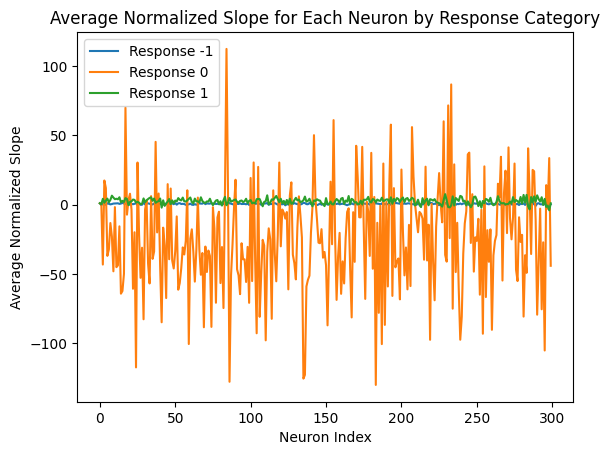

In [17]:
def divide_trials_by_response(dat, response_category):
    trials_indices = np.where(dat['response'] == response_category)[0]
    spikes_filtered = dat['spks'][trials_indices]
    return spikes_filtered

def calculate_firing_rate_per_neuron(spikes, time_bin_duration, dat):
    num_neurons = spikes.shape[1]
    num_time_bins = spikes.shape[2]

    time_windows = [(0.02, 0.5), (0.5, 2.48)]

    time_windows_bins = [(int(window[0] / time_bin_duration), int(window[1] / time_bin_duration)) for window in time_windows]

    firing_rate_per_neuron_by_response = {}

    for response_category in [-1, 0, 1]:  # Response categories: correct left, no-go, correct right
        spikes_filtered = divide_trials_by_response(dat, response_category)

        firing_rate_per_neuron = np.zeros((len(time_windows), num_neurons))
        for window_idx, (start_bin, end_bin) in enumerate(time_windows_bins):
            total_spikes_per_neuron_trial = np.sum(spikes_filtered[:, :, start_bin:end_bin], axis=2)
            total_time_window = (end_bin - start_bin) * time_bin_duration
            firing_rate_per_neuron[window_idx, :] = np.mean(total_spikes_per_neuron_trial, axis=0) / total_time_window

        firing_rate_per_neuron_by_response[response_category] = firing_rate_per_neuron

    return firing_rate_per_neuron_by_response

def calculate_average_firing_rate(firing_rate_per_neuron_by_response):
    average_firing_rate_by_response = {}
    for response_category, firing_rate_per_neuron in firing_rate_per_neuron_by_response.items():
        average_firing_rate_by_response[response_category] = np.mean(firing_rate_per_neuron, axis=0)
    return average_firing_rate_by_response

def calculate_slope(firing_rate_per_neuron_by_response):
    first_response_slope = {}
    normalized_slopes = {}

    response_categories = [-1, 0, 1]
    for response_category in response_categories:
        firing_rate_per_neuron = firing_rate_per_neuron_by_response[response_category]
        num_neurons = firing_rate_per_neuron.shape[1]

        slopes = np.zeros(num_neurons)
        for neuron_idx in range(num_neurons):
            firing_rate = firing_rate_per_neuron[:, neuron_idx]
            time_bins = np.arange(1, len(firing_rate) + 1) * 0.01  # Assuming time_bin_duration is 0.01s

            # Perform linear regression to find the slope of firing rate change over time
            model = LinearRegression()
            model.fit(time_bins.reshape(-1, 1), firing_rate)
            slope = model.coef_[0]

            slopes[neuron_idx] = slope

        first_response_slope[response_category] = slopes[0]
        normalized_slopes[response_category] = slopes / slopes[0]

    return first_response_slope, normalized_slopes

def analyze_synaptic_plasticity(dat):
    time_bin_duration = 0.01  # Assuming time_bin_duration is 0.01s

    firing_rate_per_neuron_by_response = calculate_firing_rate_per_neuron(dat['spks'], time_bin_duration, dat)

    average_firing_rate_by_response = calculate_average_firing_rate(firing_rate_per_neuron_by_response)

    first_response_slope, normalized_slopes = calculate_slope(firing_rate_per_neuron_by_response)

    response_categories = [-1, 0, 1]
    for response_category in response_categories:
        print(f"Response Category: {response_category}")
        print(f"First Response Slope: {first_response_slope[response_category]:.6f}")
        print(f"Average Normalized Slope for Neurons: {np.mean(normalized_slopes[response_category]):.6f}")
        print()
        plt.plot(normalized_slopes[response_category], label=f'Response {response_category}')
    plt.xlabel('Neuron Index')
    plt.ylabel('Average Normalized Slope')
    plt.title('Average Normalized Slope for Each Neuron by Response Category')
    plt.legend()
    plt.show()



analyze_synaptic_plasticity(dat)



From our analysis of the graph, short-term synaptic plasticity is indeed happening for all the three trials (facilitation or depression).

In respose -1, the slope is less than 1, indicating a decrease in firing rate over time. suggesting synaptic depression.

In response 0, value of the slope is -1, suggesting a significant decrease in firing rate, suggesting synaptic depression

In response 1, the normalisation slope value is more than 1, suggesting a short-term synaptic facilitation.